In [3]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

## Experiment parameters

In [6]:
def get_summary(data_name, results_file):
    # results_file = f'results/{data_name}_with_assisted_semi_ind.pkl'

    T_dict = {
        "School": 18,
        "SBM": 8,
        "time_coverage": 8,
        "Flight": 36,
        "Trade": 30
    }

    T = T_dict[data_name]


    with open(results_file, 'rb') as file:
        results = pickle.load(file)

    methods = list(results.keys())
    GNN_models = list(results[methods[0]].keys())
    regimes = list(results[methods[0]][GNN_models[0]].keys())
    outputs = list(results[methods[0]][GNN_models[0]][regimes[0]].keys())
    
    methods_list = []
    GNN_models_list = []
    regimes_list = []
    outputs_list = []
    stat_types_list = []
    stats_list = []

    for (method, GNN_model, regime, output) in product(methods, GNN_models, regimes, outputs):

        methods_list.append(method)
        GNN_models_list.append(GNN_model)
        regimes_list.append(regime)
        outputs_list.append(output)
        stat_types_list.append('Mean')
        stats_list.append(np.round(np.mean(results[method][GNN_model][regime][output]['All']), 3))
        
        methods_list.append(method)
        GNN_models_list.append(GNN_model)
        regimes_list.append(regime)
        outputs_list.append(output)
        stat_types_list.append('St Dev')
        stats_list.append(np.round(np.std(results[method][GNN_model][regime][output]['All']), 3))
        
    output = "TSC"
    for (method, GNN_model, regime) in product(methods, GNN_models, regimes):
        
        num_vals = len(results[method][GNN_model][regime]['Coverage']['All'])

        T_output = np.where(np.array([len(results[method][GNN_model][regime]["Coverage"][t]) for t in range(T)]) > 0)[0]


        covs = np.zeros((T, num_vals))
        for t in T_output:
            covs[t] = results[method][GNN_model][regime]["Coverage"][t]

        # min_covs = []
        # for cov_run in range(num_vals):
        #     covs_for_run = covs[:, cov_run]
        #     covs_for_run = covs_for_run[covs_for_run > 0]
        #     min_covs.append(np.min(covs_for_run))

        TSC = []
        for t in T_output:
            TSC.append(np.mean(covs[t, :]))

        min_TSC_idx = np.argmin(TSC)
        min_TSC = TSC[min_TSC_idx]
        std_min_TSC = np.std(covs[T_output[min_TSC_idx], :])


        methods_list.append(method)
        GNN_models_list.append(GNN_model)
        regimes_list.append(regime)
        outputs_list.append(output)
        stat_types_list.append('Mean')
        stats_list.append(np.round(min_TSC, 3))

        methods_list.append(method)
        GNN_models_list.append(GNN_model)
        regimes_list.append(regime)
        outputs_list.append(output)
        stat_types_list.append('St Dev')
        stats_list.append(np.round(std_min_TSC, 3)) 


    df_summary = pd.DataFrame({
        'method'   : methods_list,
        'GNN model': GNN_models_list,
        'regime'   : regimes_list,
        'output'   : outputs_list,
        'statistic': stat_types_list,
        'value'    : stats_list
    })

    # Add the actual name of the embedding by merging the method and GNN model columns
    df_summary['name'] = df_summary['method'] + ' ' + df_summary['GNN model']

    replace_dict = {
        "BD GCN": "Block GCN",
        "BD GAT": "Block GAT",
        "UA GCN": "UGCN",
        "UA GAT": "UGAT",
    }
    df_summary['name'] = df_summary['name'].replace(replace_dict)

    

    return df_summary

Display full table of statistics.

In [7]:
df_summary = get_summary("School", "results/School_with_less_test.pkl")
df_summary

,method,GNN model,regime,output,statistic,value,name
0,BD,GCN,Trans,Accuracy,Mean,0.871,Block GCN
1,BD,GCN,Trans,Accuracy,St Dev,0.010,Block GCN
2,BD,GCN,Trans,Avg Size,Mean,5.195,Block GCN
3,BD,GCN,Trans,Avg Size,St Dev,0.156,Block GCN
4,BD,GCN,Trans,Coverage,Mean,0.901,Block GCN
...,...,...,...,...,...,...,...
59,UA,GCN,Semi-Ind,TSC,St Dev,0.062,UGCN
60,UA,GAT,Trans,TSC,Mean,0.798,UGAT
61,UA,GAT,Trans,TSC,St Dev,0.070,UGAT
62,UA,GAT,Semi-Ind,TSC,Mean,0.853,UGAT


In [8]:
df_summary[df_summary['output'] == 'Accuracy']

,method,GNN model,regime,output,statistic,value,name
0,BD,GCN,Trans,Accuracy,Mean,0.871,Block GCN
1,BD,GCN,Trans,Accuracy,St Dev,0.010,Block GCN
6,BD,GCN,Semi-Ind,Accuracy,Mean,0.105,Block GCN
7,BD,GCN,Semi-Ind,Accuracy,St Dev,0.024,Block GCN
12,BD,GAT,Trans,Accuracy,Mean,0.808,Block GAT
13,BD,GAT,Trans,Accuracy,St Dev,0.018,Block GAT
18,BD,GAT,Semi-Ind,Accuracy,Mean,0.107,Block GAT
19,BD,GAT,Semi-Ind,Accuracy,St Dev,0.023,Block GAT
24,UA,GCN,Trans,Accuracy,Mean,0.933,UGCN
25,UA,GCN,Trans,Accuracy,St Dev,0.006,UGCN


In [9]:
df_summary[df_summary['output'] == 'Coverage']

,method,GNN model,regime,output,statistic,value,name
4,BD,GCN,Trans,Coverage,Mean,0.901,Block GCN
5,BD,GCN,Trans,Coverage,St Dev,0.012,Block GCN
10,BD,GCN,Semi-Ind,Coverage,Mean,0.821,Block GCN
11,BD,GCN,Semi-Ind,Coverage,St Dev,0.049,Block GCN
16,BD,GAT,Trans,Coverage,Mean,0.901,Block GAT
17,BD,GAT,Trans,Coverage,St Dev,0.012,Block GAT
22,BD,GAT,Semi-Ind,Coverage,Mean,0.665,Block GAT
23,BD,GAT,Semi-Ind,Coverage,St Dev,0.097,Block GAT
28,UA,GCN,Trans,Coverage,Mean,0.901,UGCN
29,UA,GCN,Trans,Coverage,St Dev,0.012,UGCN


In [10]:
df_summary[df_summary['output'] == 'Avg Size']

,method,GNN model,regime,output,statistic,value,name
2,BD,GCN,Trans,Avg Size,Mean,5.195,Block GCN
3,BD,GCN,Trans,Avg Size,St Dev,0.156,Block GCN
8,BD,GCN,Semi-Ind,Avg Size,Mean,8.174,Block GCN
9,BD,GCN,Semi-Ind,Avg Size,St Dev,0.386,Block GCN
14,BD,GAT,Trans,Avg Size,Mean,4.367,Block GAT
15,BD,GAT,Trans,Avg Size,St Dev,0.798,Block GAT
20,BD,GAT,Semi-Ind,Avg Size,Mean,6.567,Block GAT
21,BD,GAT,Semi-Ind,Avg Size,St Dev,0.891,Block GAT
26,UA,GCN,Trans,Avg Size,Mean,3.541,UGCN
27,UA,GCN,Trans,Avg Size,St Dev,0.314,UGCN


In [11]:
df_summary[df_summary['output'] == 'TSC']

,method,GNN model,regime,output,statistic,value,name
48,BD,GCN,Trans,TSC,Mean,0.814,Block GCN
49,BD,GCN,Trans,TSC,St Dev,0.063,Block GCN
50,BD,GCN,Semi-Ind,TSC,Mean,0.812,Block GCN
51,BD,GCN,Semi-Ind,TSC,St Dev,0.070,Block GCN
52,BD,GAT,Trans,TSC,Mean,0.821,Block GAT
53,BD,GAT,Trans,TSC,St Dev,0.124,Block GAT
54,BD,GAT,Semi-Ind,TSC,Mean,0.654,Block GAT
55,BD,GAT,Semi-Ind,TSC,St Dev,0.102,Block GAT
56,UA,GCN,Trans,TSC,Mean,0.672,UGCN
57,UA,GCN,Trans,TSC,St Dev,0.057,UGCN


In [12]:
table_start_str = (
    "\\begin{table}[h]\n\\centering\n\\begin{tabular}{|l|l|l|l|l|}\n\\hline\nMethods & SBM & School & Flight & Trade \\\\ \\hline\n"
)

table_data = ""

output = "Accuracy"
regime = "Semi-Ind"


# def check_bold(values, output):



for name in ["Block GCN", "UGCN", "Block GAT", "UGAT"]:
    table_data += f"{name} "
    for dataset in ["SBM", "School", "Flight", "Trade"]:
        table_data += "& "

        df_summary = get_summary(dataset)

        data_val = df_summary[
            (df_summary["name"] == name)
            & (df_summary["regime"] == regime)
            & (df_summary["output"] == output)
            & (df_summary["statistic"] == "Mean")
        ]["value"].values[0]
        data_std = df_summary[
            (df_summary["name"] == name)
            & (df_summary["regime"] == regime)
            & (df_summary["output"] == output)
            & (df_summary["statistic"] == "St Dev")
        ]["value"].values[0]

        table_data += f"{data_val:.3f} $\\pm$ {data_std:.3f}"

    table_data += "\\\\\n"

    if name == "UGCN":
        table_data += "\\hline\n"

table_data += "\\hline\n"
table_end_str = (
    "\\end{tabular}\n\\caption{" + output + " in the temporal transductive regime.}\n\\label{tab:"
    + f"temporal_transductive_{output}"
    + "}\n\\end{table}"
)

full_table = table_start_str + table_data + table_end_str

print(full_table)



TypeError: get_summary() missing 1 required positional argument: 'results_file'

In [20]:
data_name = "School"

table_start_str = (
    "\\begin{table}[h]\n" +
    "\\centering\n" +
    "\\begin{tabular}{|c|c|c|c|}\n" +
    "\\hline\n" +
    # "Methods & \\multicolumn{3}{c|}{SBM (i.i.d.)} \\\\ \\cline{2-4} & Trans. & Temp. Trans. & Semi-Ind.  \\\\ \\hline\n"
    "Methods & \\multicolumn{2}{c|}{"+ data_name + "} \\\\ \\cline{2-3} & Trans. &  Semi-Ind.  \\\\ \\hline\n"
)


output = "Coverage"

# table_data_1 = "ISE & $0.505 \\pm 0.000$ & $0.248 \\pm 0.000$ \\\\ \\hline\n"

table_data = ""
# Loop over each unique method + regime pair
for name in ["Block GCN", "UGCN", "Block GAT", "UGAT"]:
    trans_acc = df_summary[
        (df_summary["name"] == name)
        & (df_summary["regime"] == "Trans")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "Mean")
    ]["value"].values[0]
    trans_std = df_summary[
        (df_summary["name"] == name)
        & (df_summary["regime"] == "Trans")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "St Dev")
    ]["value"].values[0]

    # temp_trans_acc = df_summary[
    #     (df_summary["name"] == name)
    #     & (df_summary["regime"] == "Assisted Semi-Ind")
    #     & (df_summary["output"] == output)
    #     & (df_summary["statistic"] == "Mean")
    # ]["value"].values[0]
    # temp_trans_std = df_summary[
    #     (df_summary["name"] == name)
    #     & (df_summary["regime"] == "Assisted Semi-Ind")
    #     & (df_summary["output"] == output)
    #     & (df_summary["statistic"] == "St Dev")
    # ]["value"].values[0]


    semi_ind_acc = df_summary[
        (df_summary["name"] == name)
        & (df_summary["regime"] == "Semi-Ind")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "Mean")
    ]["value"].values[0]
    semi_ind_std = df_summary[
        (df_summary["name"] == name)
        & (df_summary["regime"] == "Semi-Ind")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "St Dev")
    ]["value"].values[0]

    if trans_acc + trans_std < 0.9:
        table_data += f"{name} & {trans_acc:.3f} $\\pm$ {trans_std:.3f}"
    else:
        table_data += (
            name + " & \\textbf{" + f"{trans_acc:.3f} $\\pm$ {trans_std:.3f}" + "}"
        )

    # if temp_trans_acc + temp_trans_std < 0.9:
    #     table_data += f" & {temp_trans_acc:.3f} $\\pm$ {temp_trans_std:.3f}"
    # else:
    #     table_data += " & \\textbf{" + f"{temp_trans_acc:.3f} $\\pm$ {temp_trans_std:.3f}" + "}"
            

    if semi_ind_acc + semi_ind_std < 0.9:
        table_data += f" & ${semi_ind_acc:.3f} \\pm {semi_ind_std:.3f}$ \\\\ \\hline\n"
    else:
        table_data += (
            " & \\textbf{"
            + f"{semi_ind_acc:.3f} $\\pm$ {semi_ind_std:.3f}"
            + "} \\\\ \\hline\n"
        )

table_end_str = (
    "\\end{tabular}\n\\caption{" + output + "}\n\\label{tab:"
    + data_name
    + "_" + output + "}\n\\end{table}"
)

full_table = table_start_str + table_data + table_end_str

print(full_table)

\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
Methods & \multicolumn{2}{c|}{School} \\ \cline{2-3} & Trans. &  Semi-Ind.  \\ \hline
Block GCN & \textbf{0.901 $\pm$ 0.012} & $0.821 \pm 0.049$ \\ \hline
UGCN & \textbf{0.901 $\pm$ 0.012} & \textbf{0.889 $\pm$ 0.020} \\ \hline
Block GAT & \textbf{0.901 $\pm$ 0.012} & $0.665 \pm 0.097$ \\ \hline
UGAT & \textbf{0.901 $\pm$ 0.012} & \textbf{0.907 $\pm$ 0.024} \\ \hline
\end{tabular}
\caption{Coverage}
\label{tab:School_Coverage}
\end{table}


## Plot results

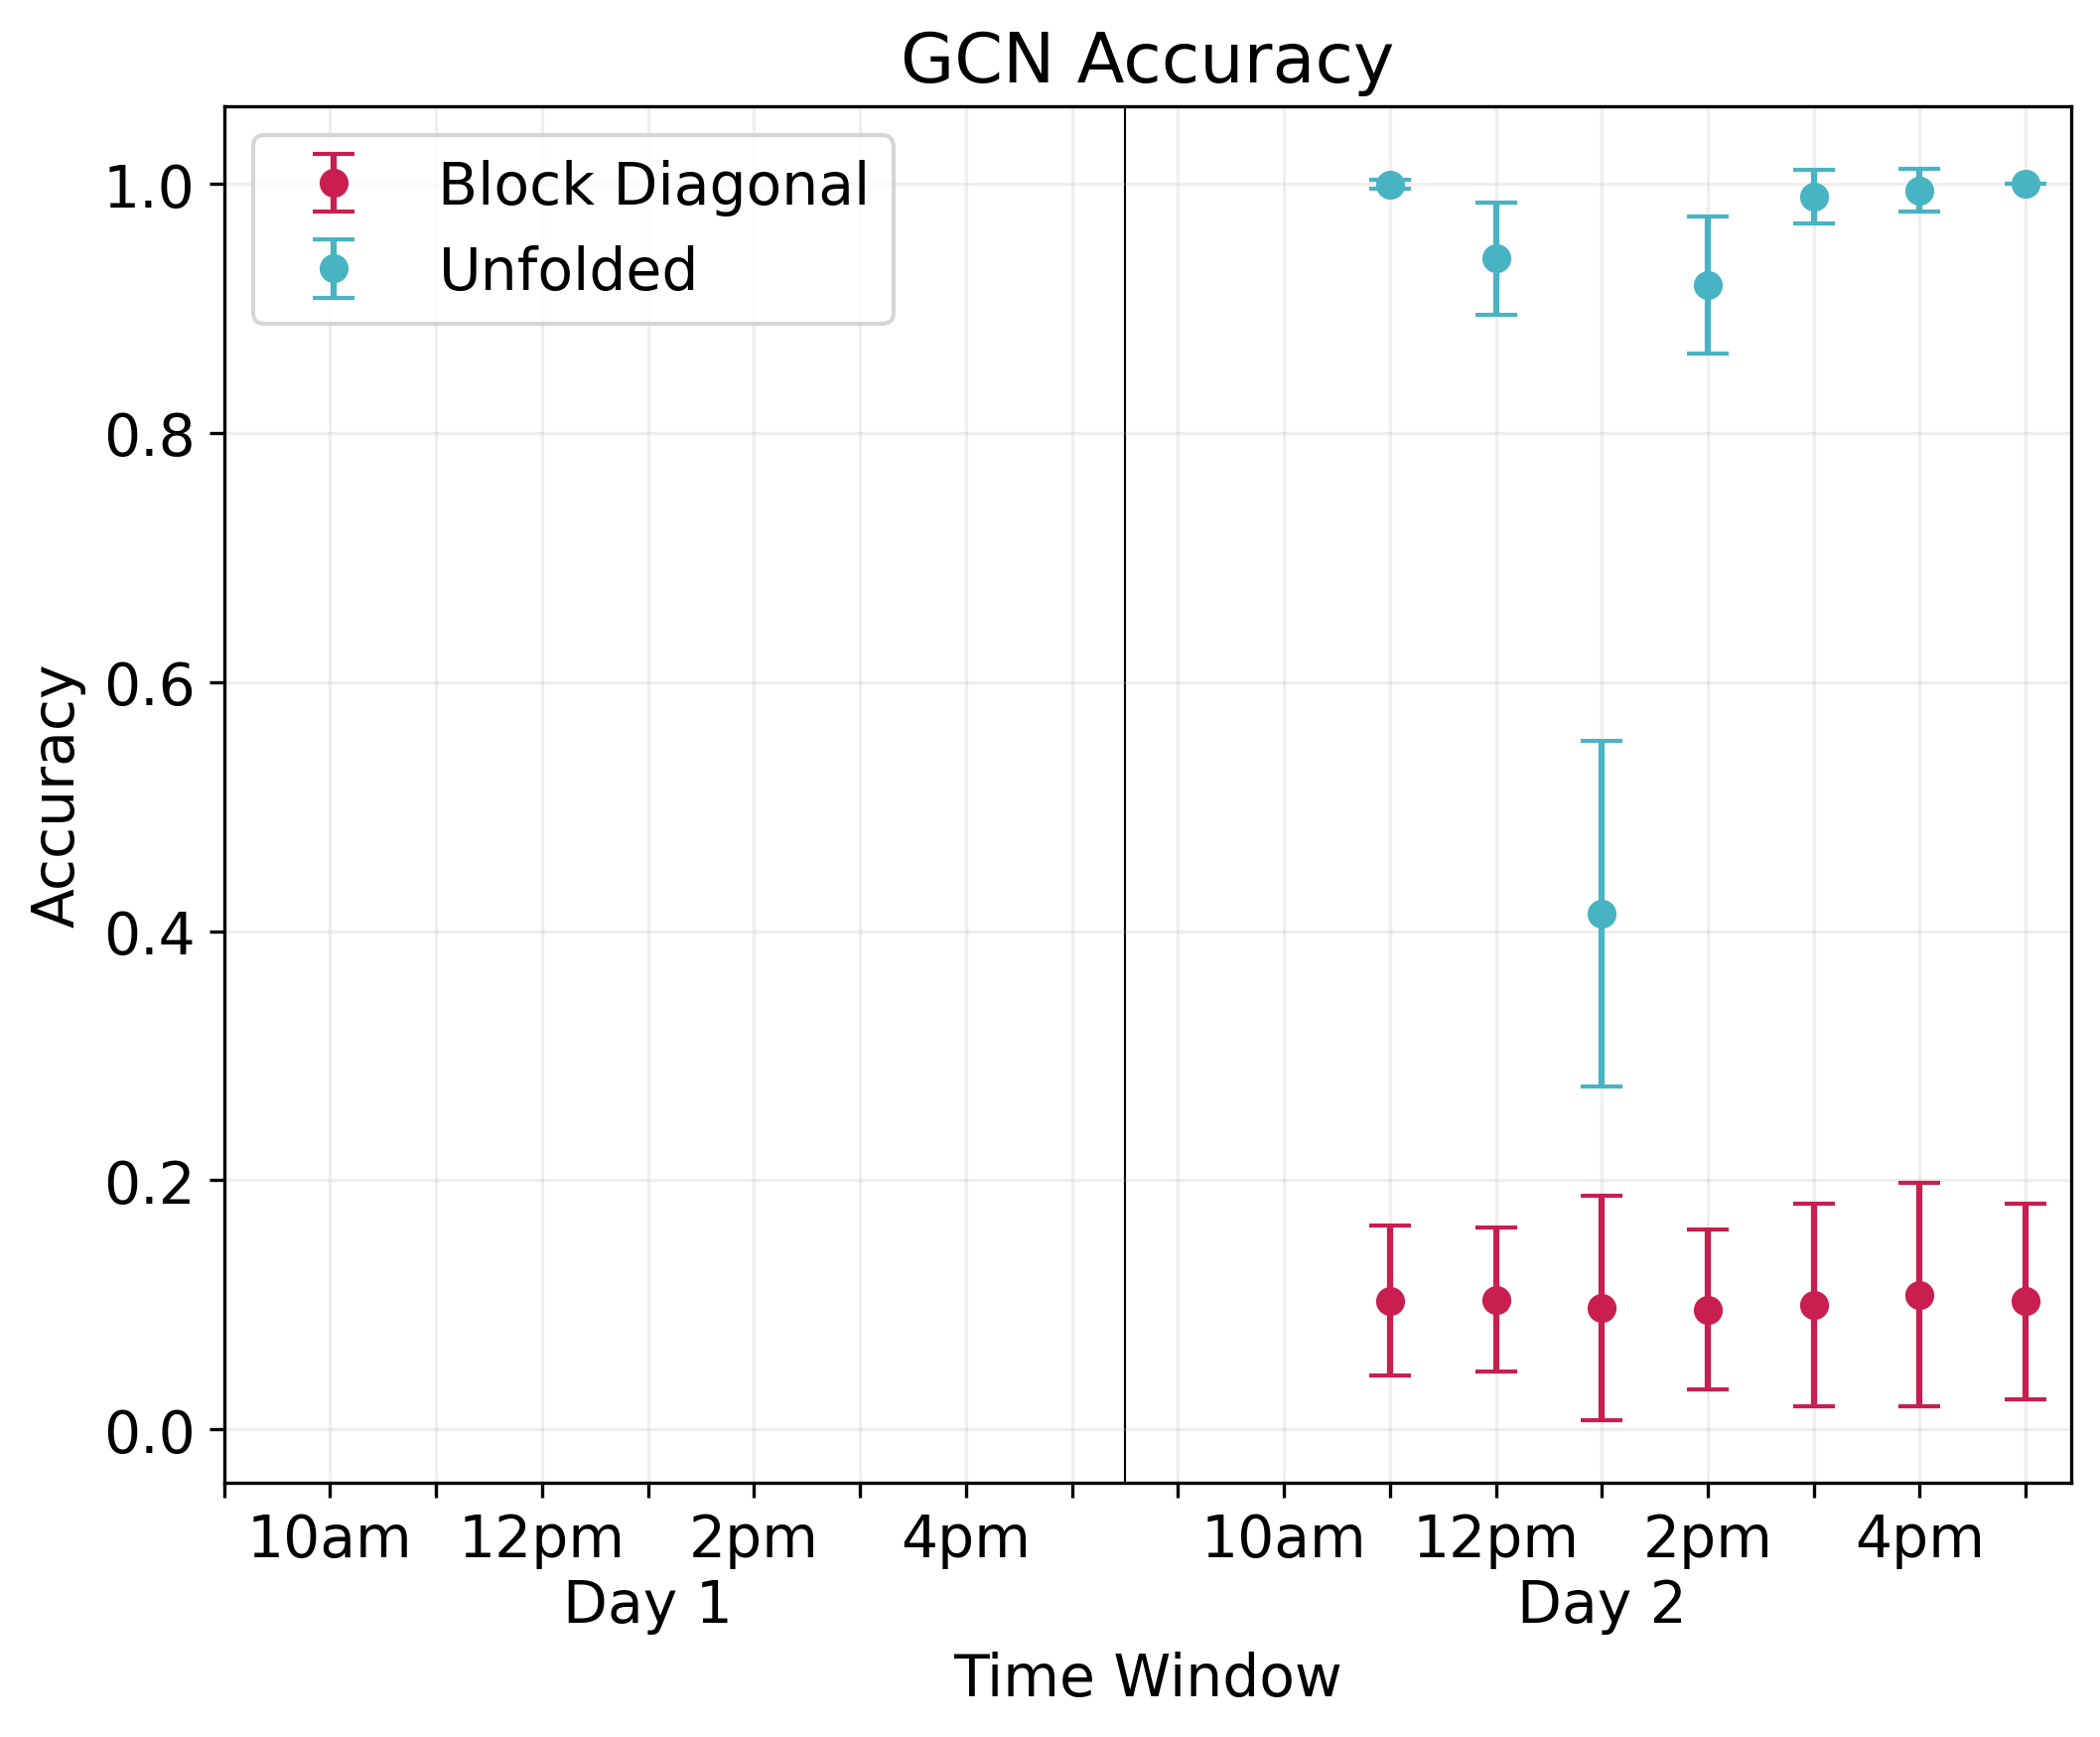

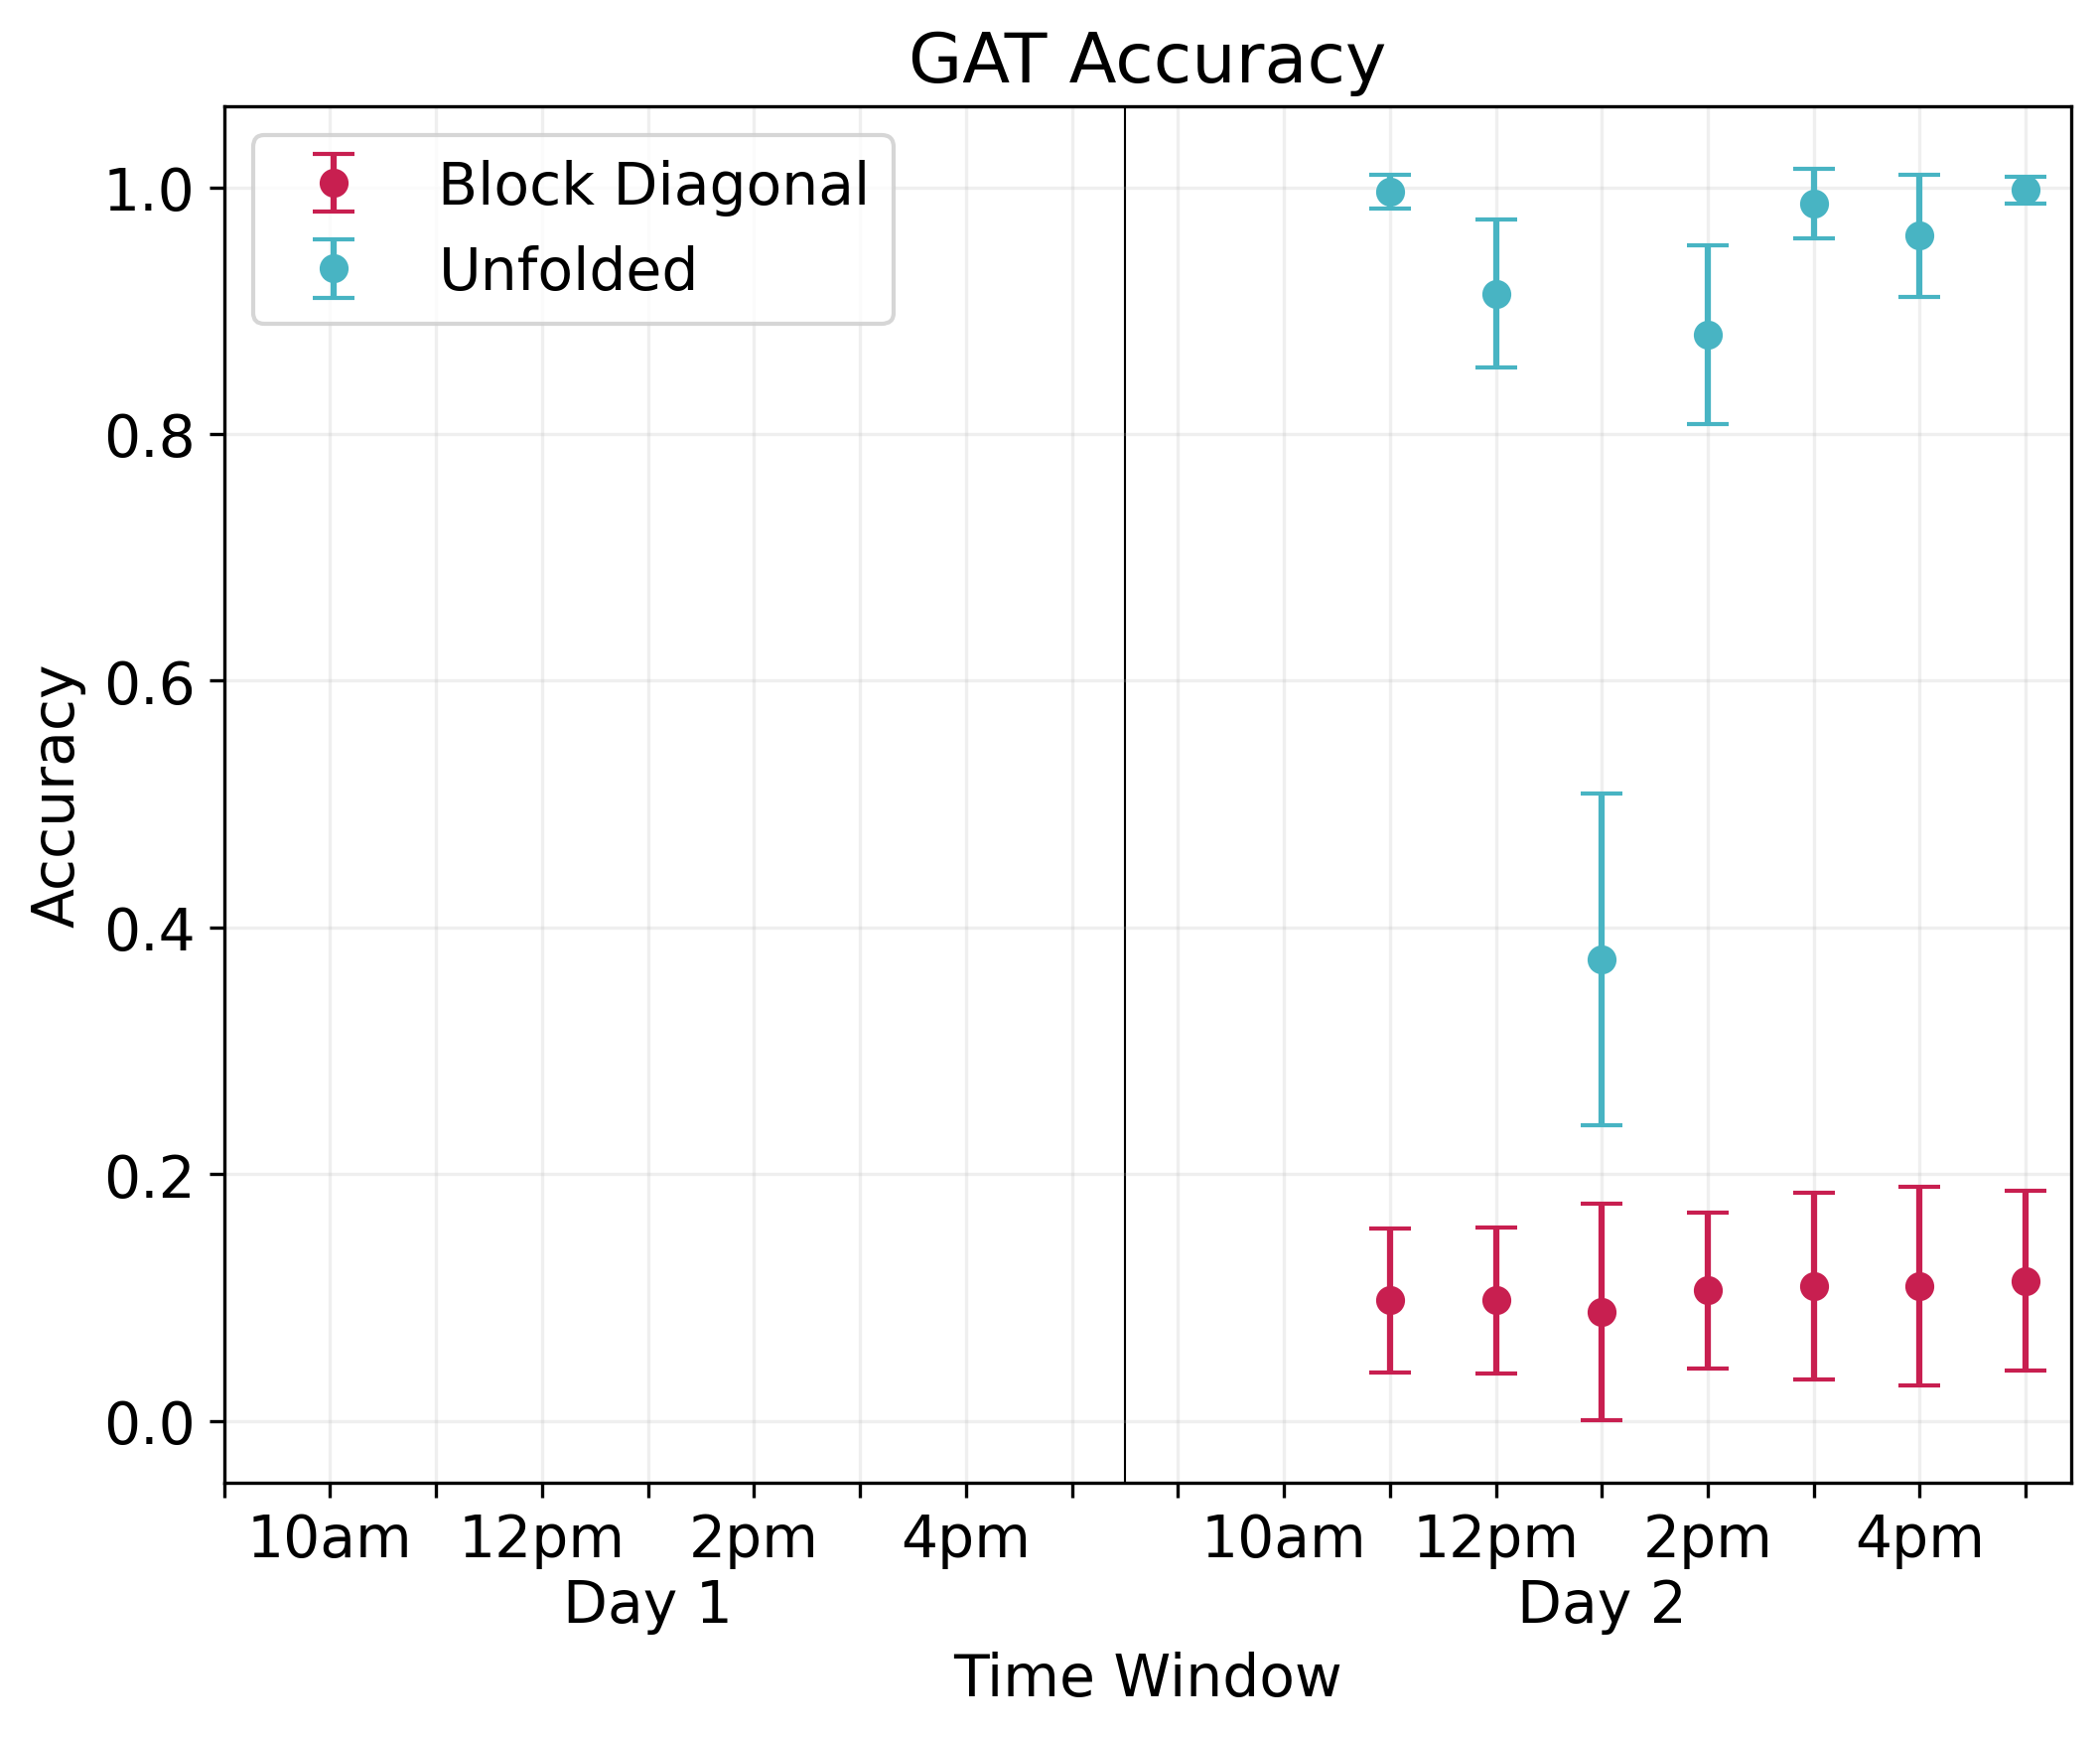

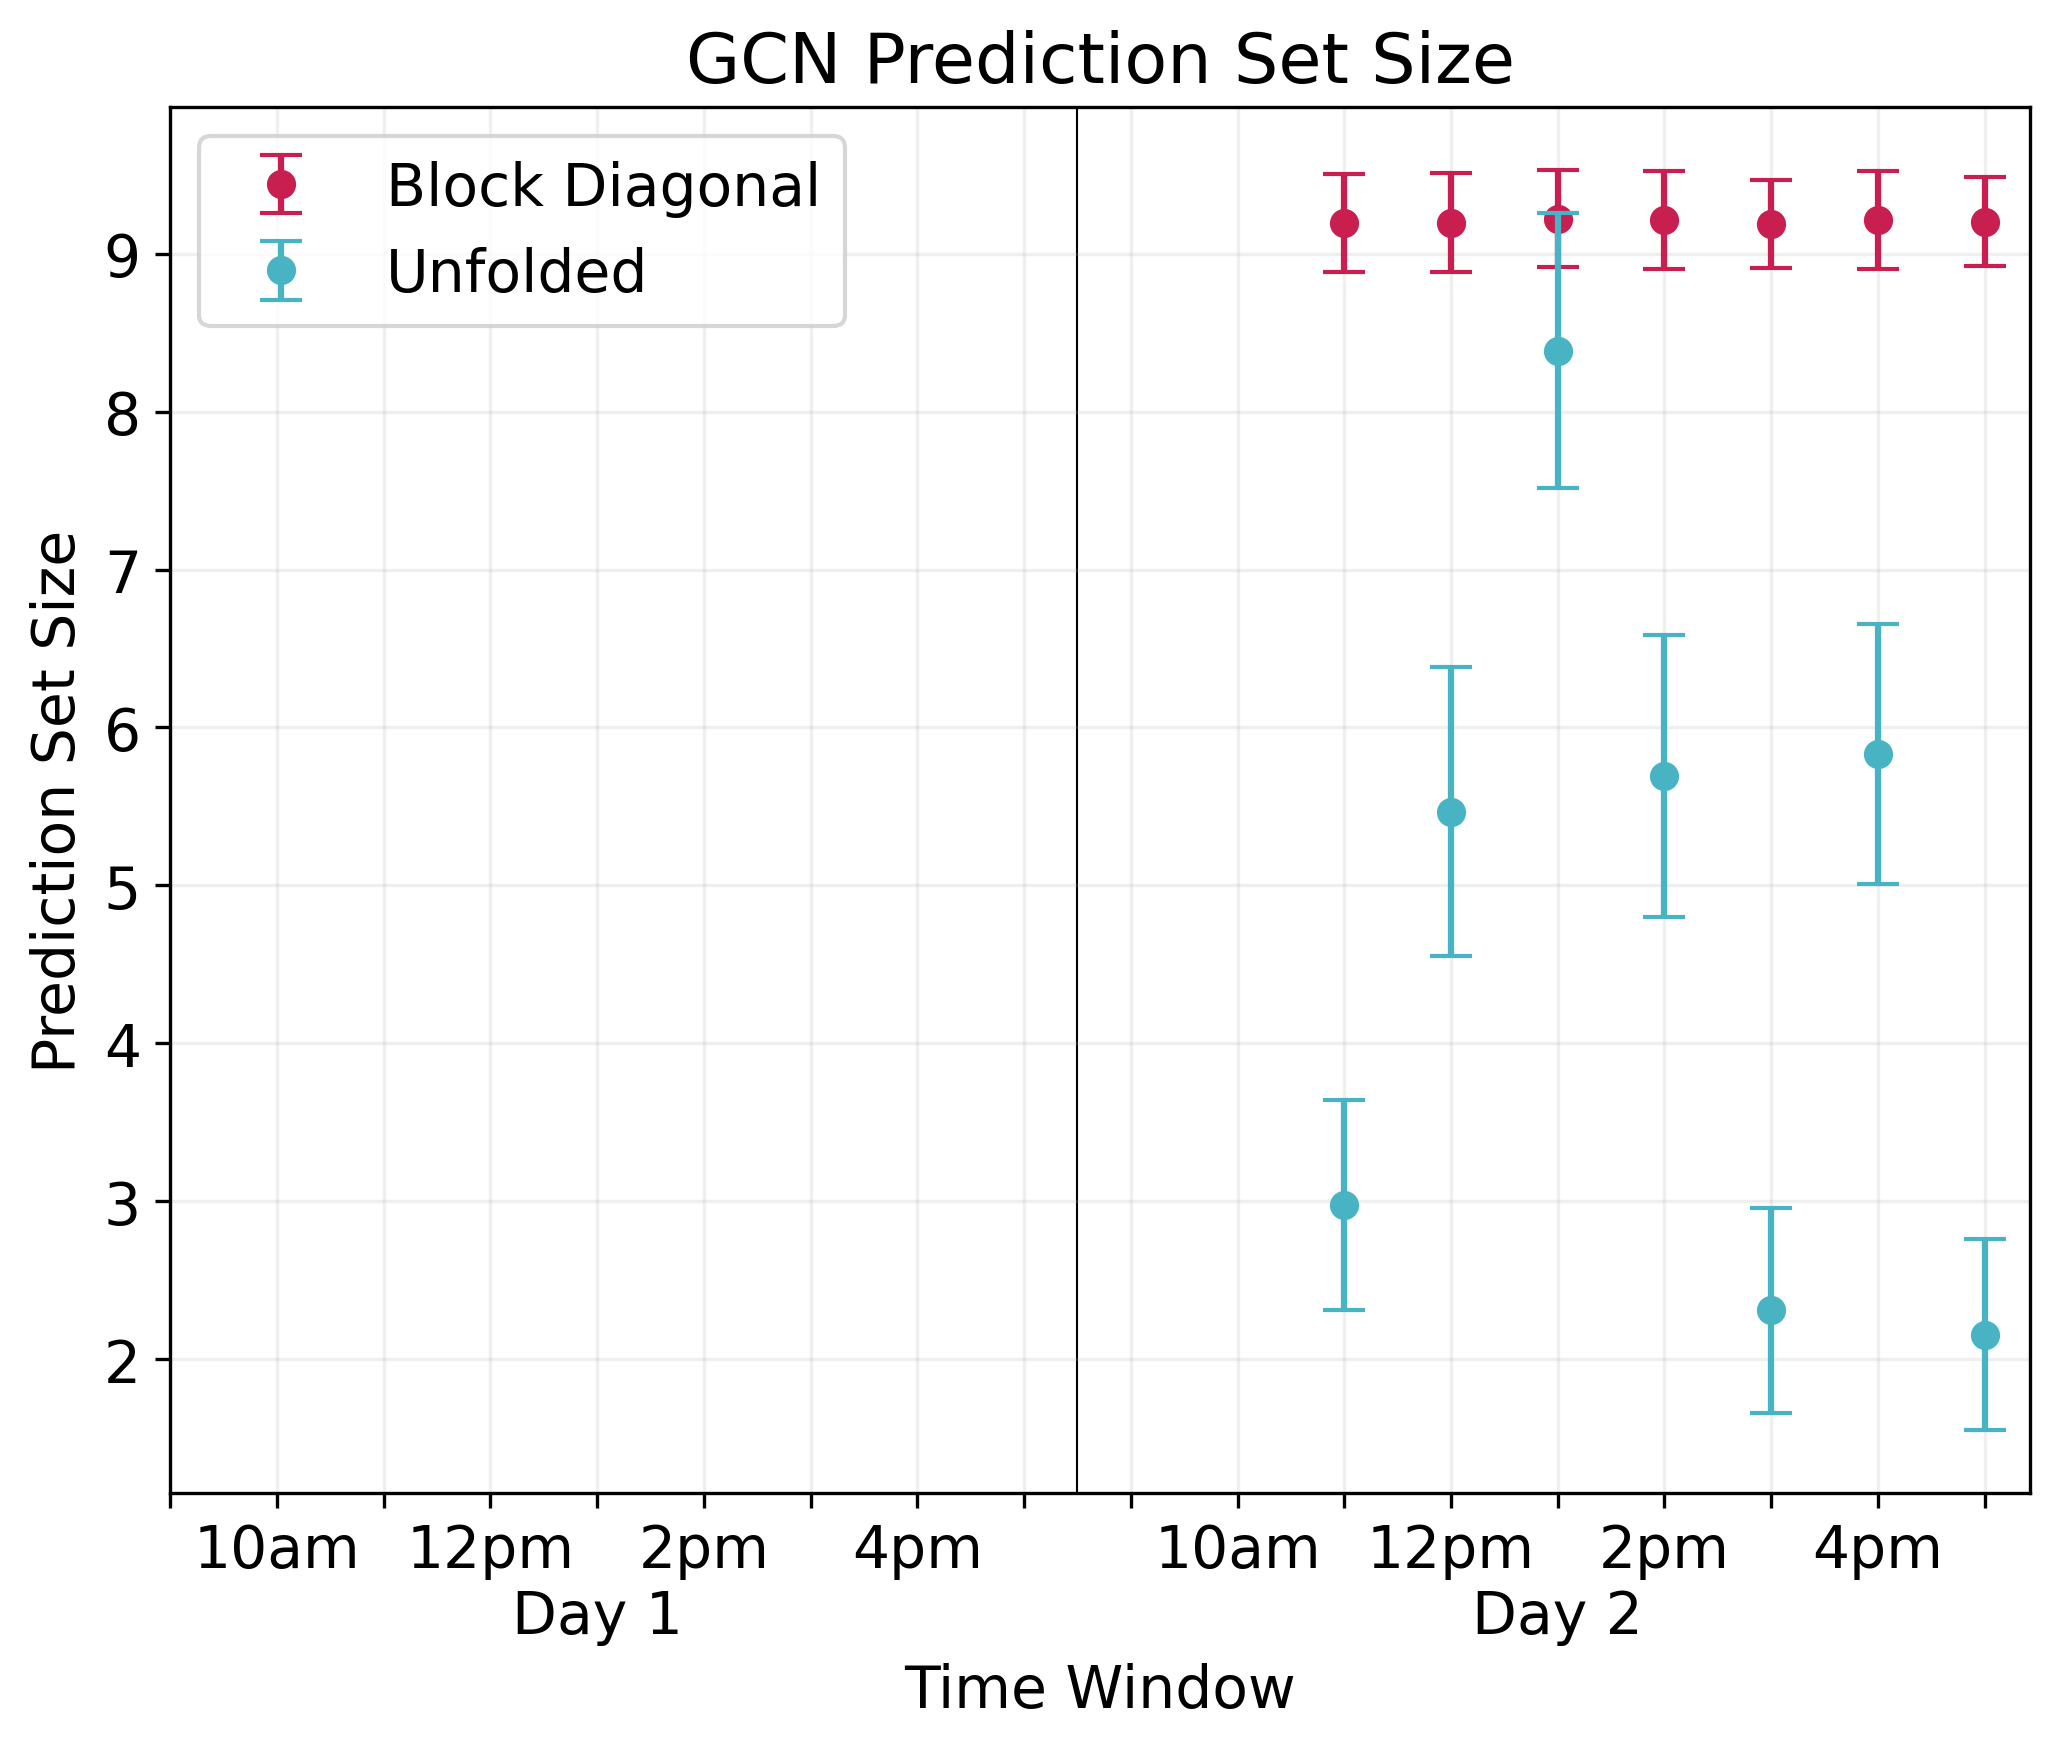

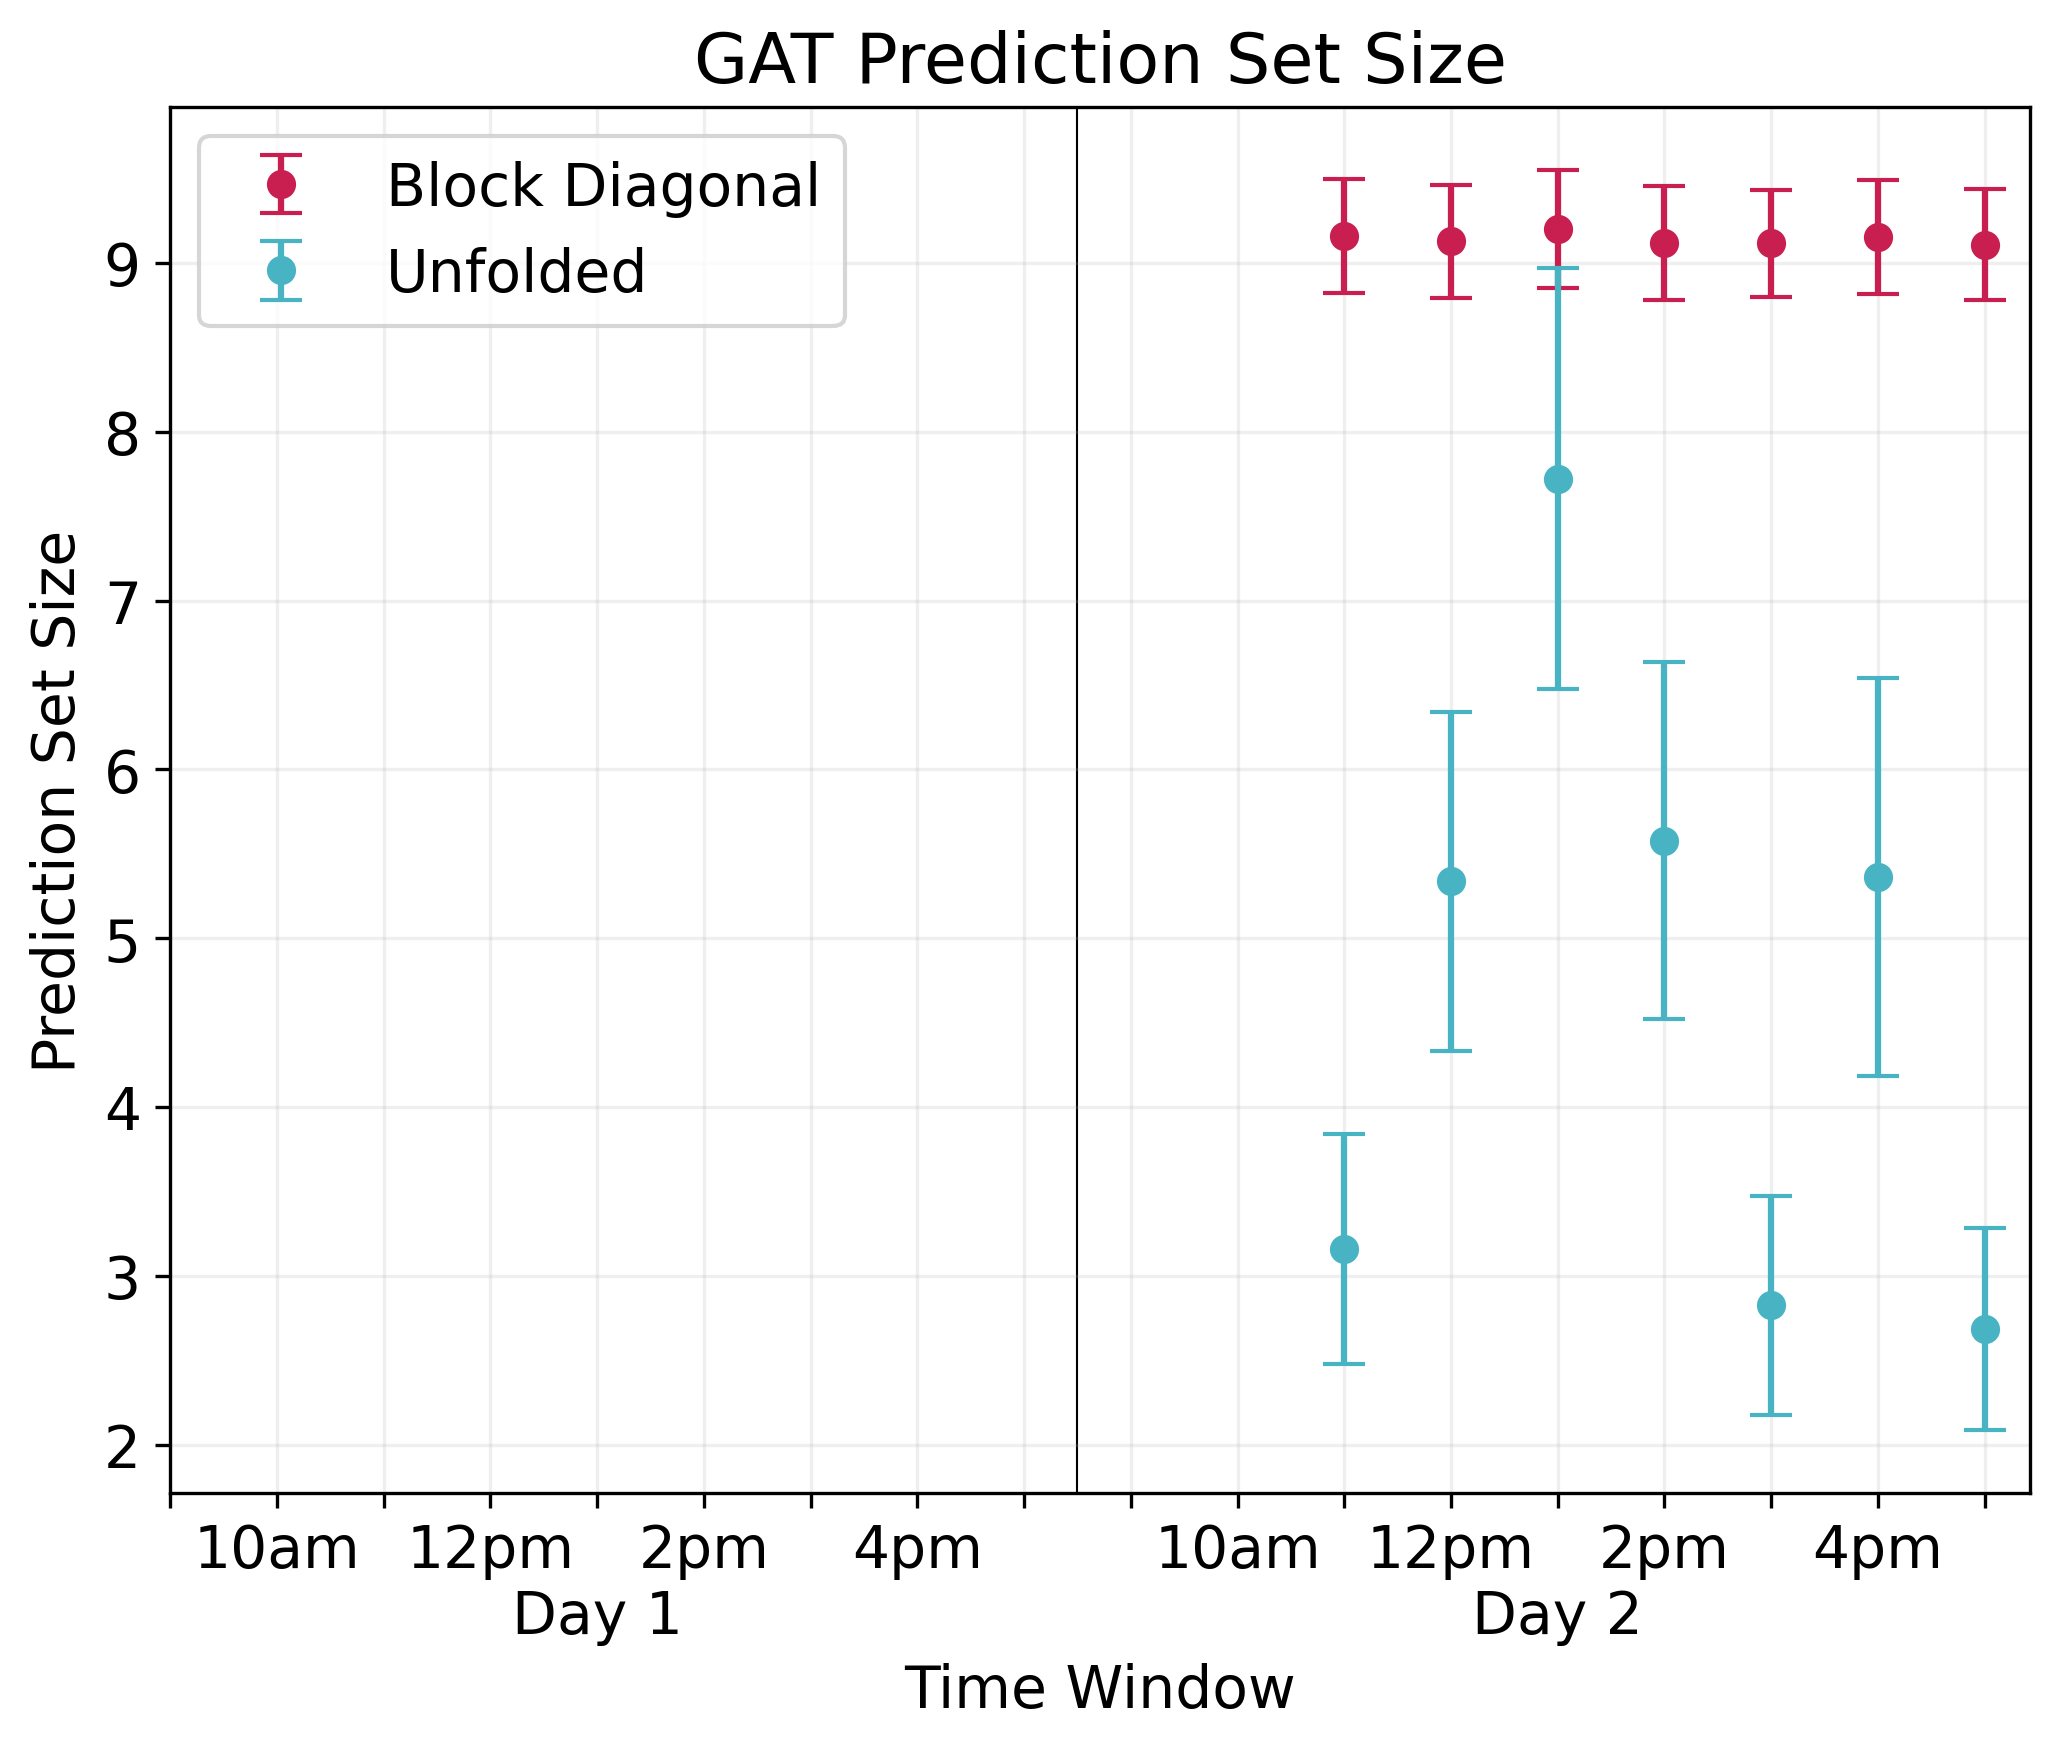

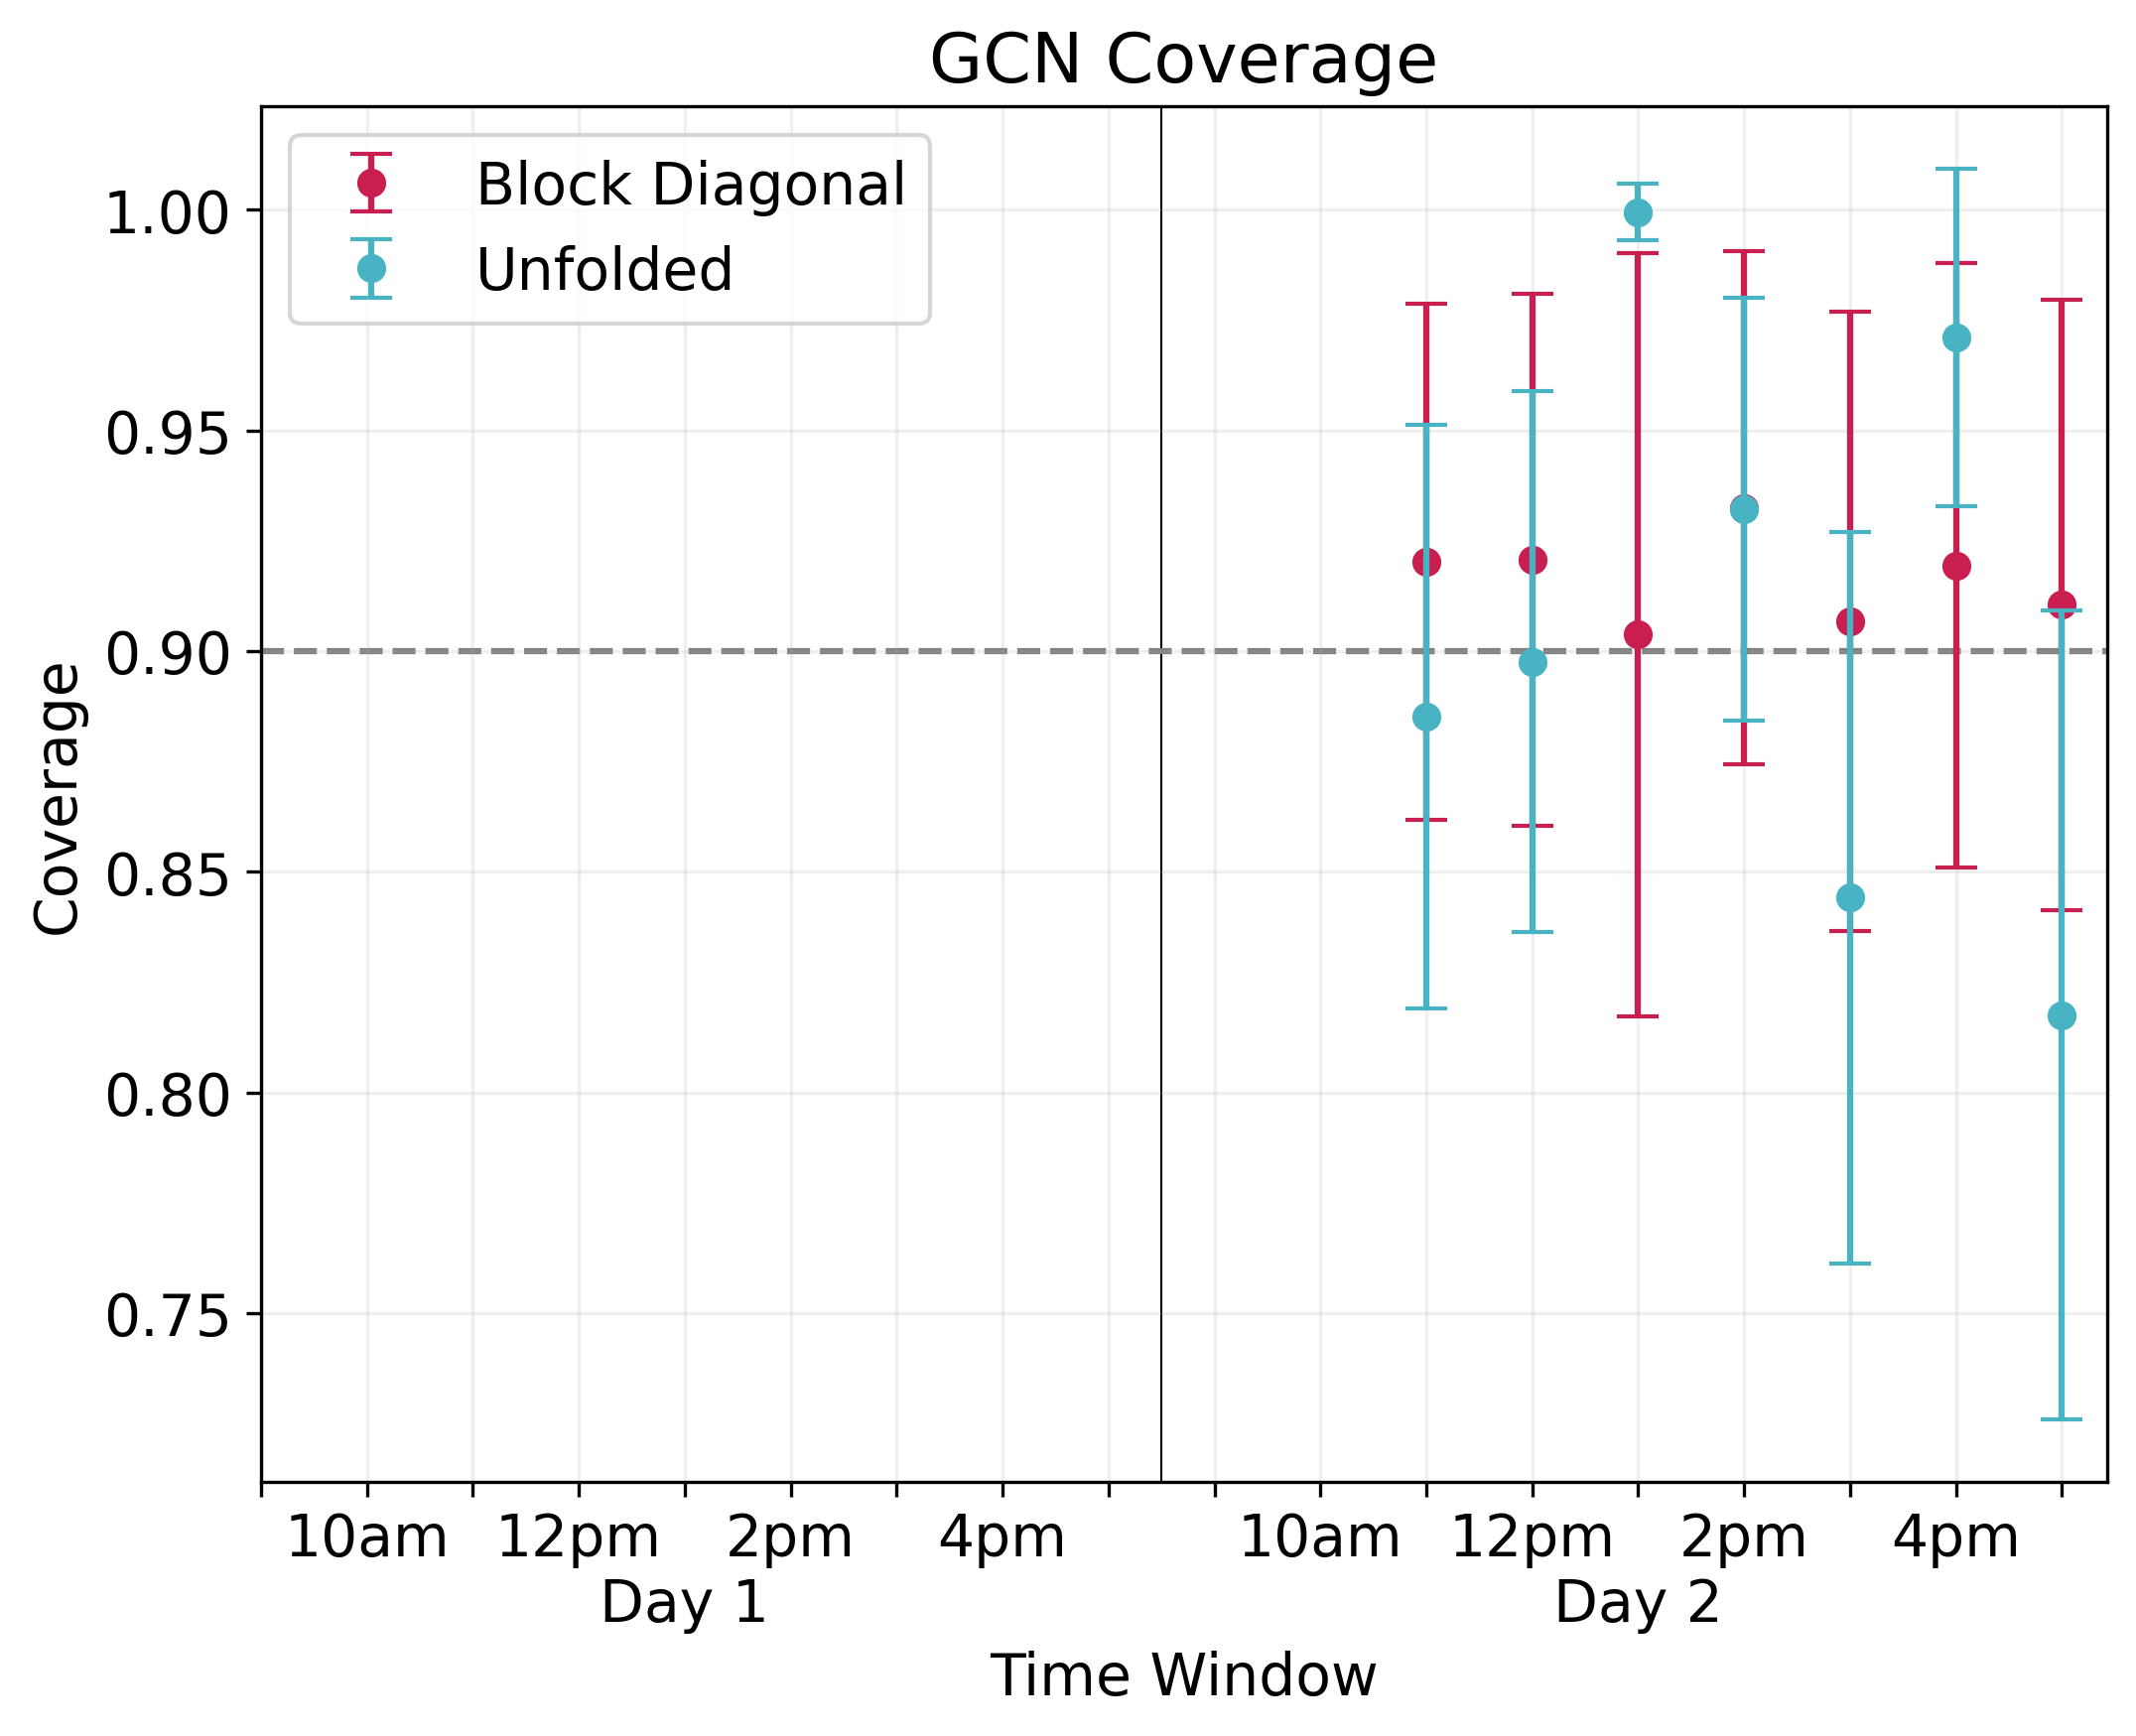

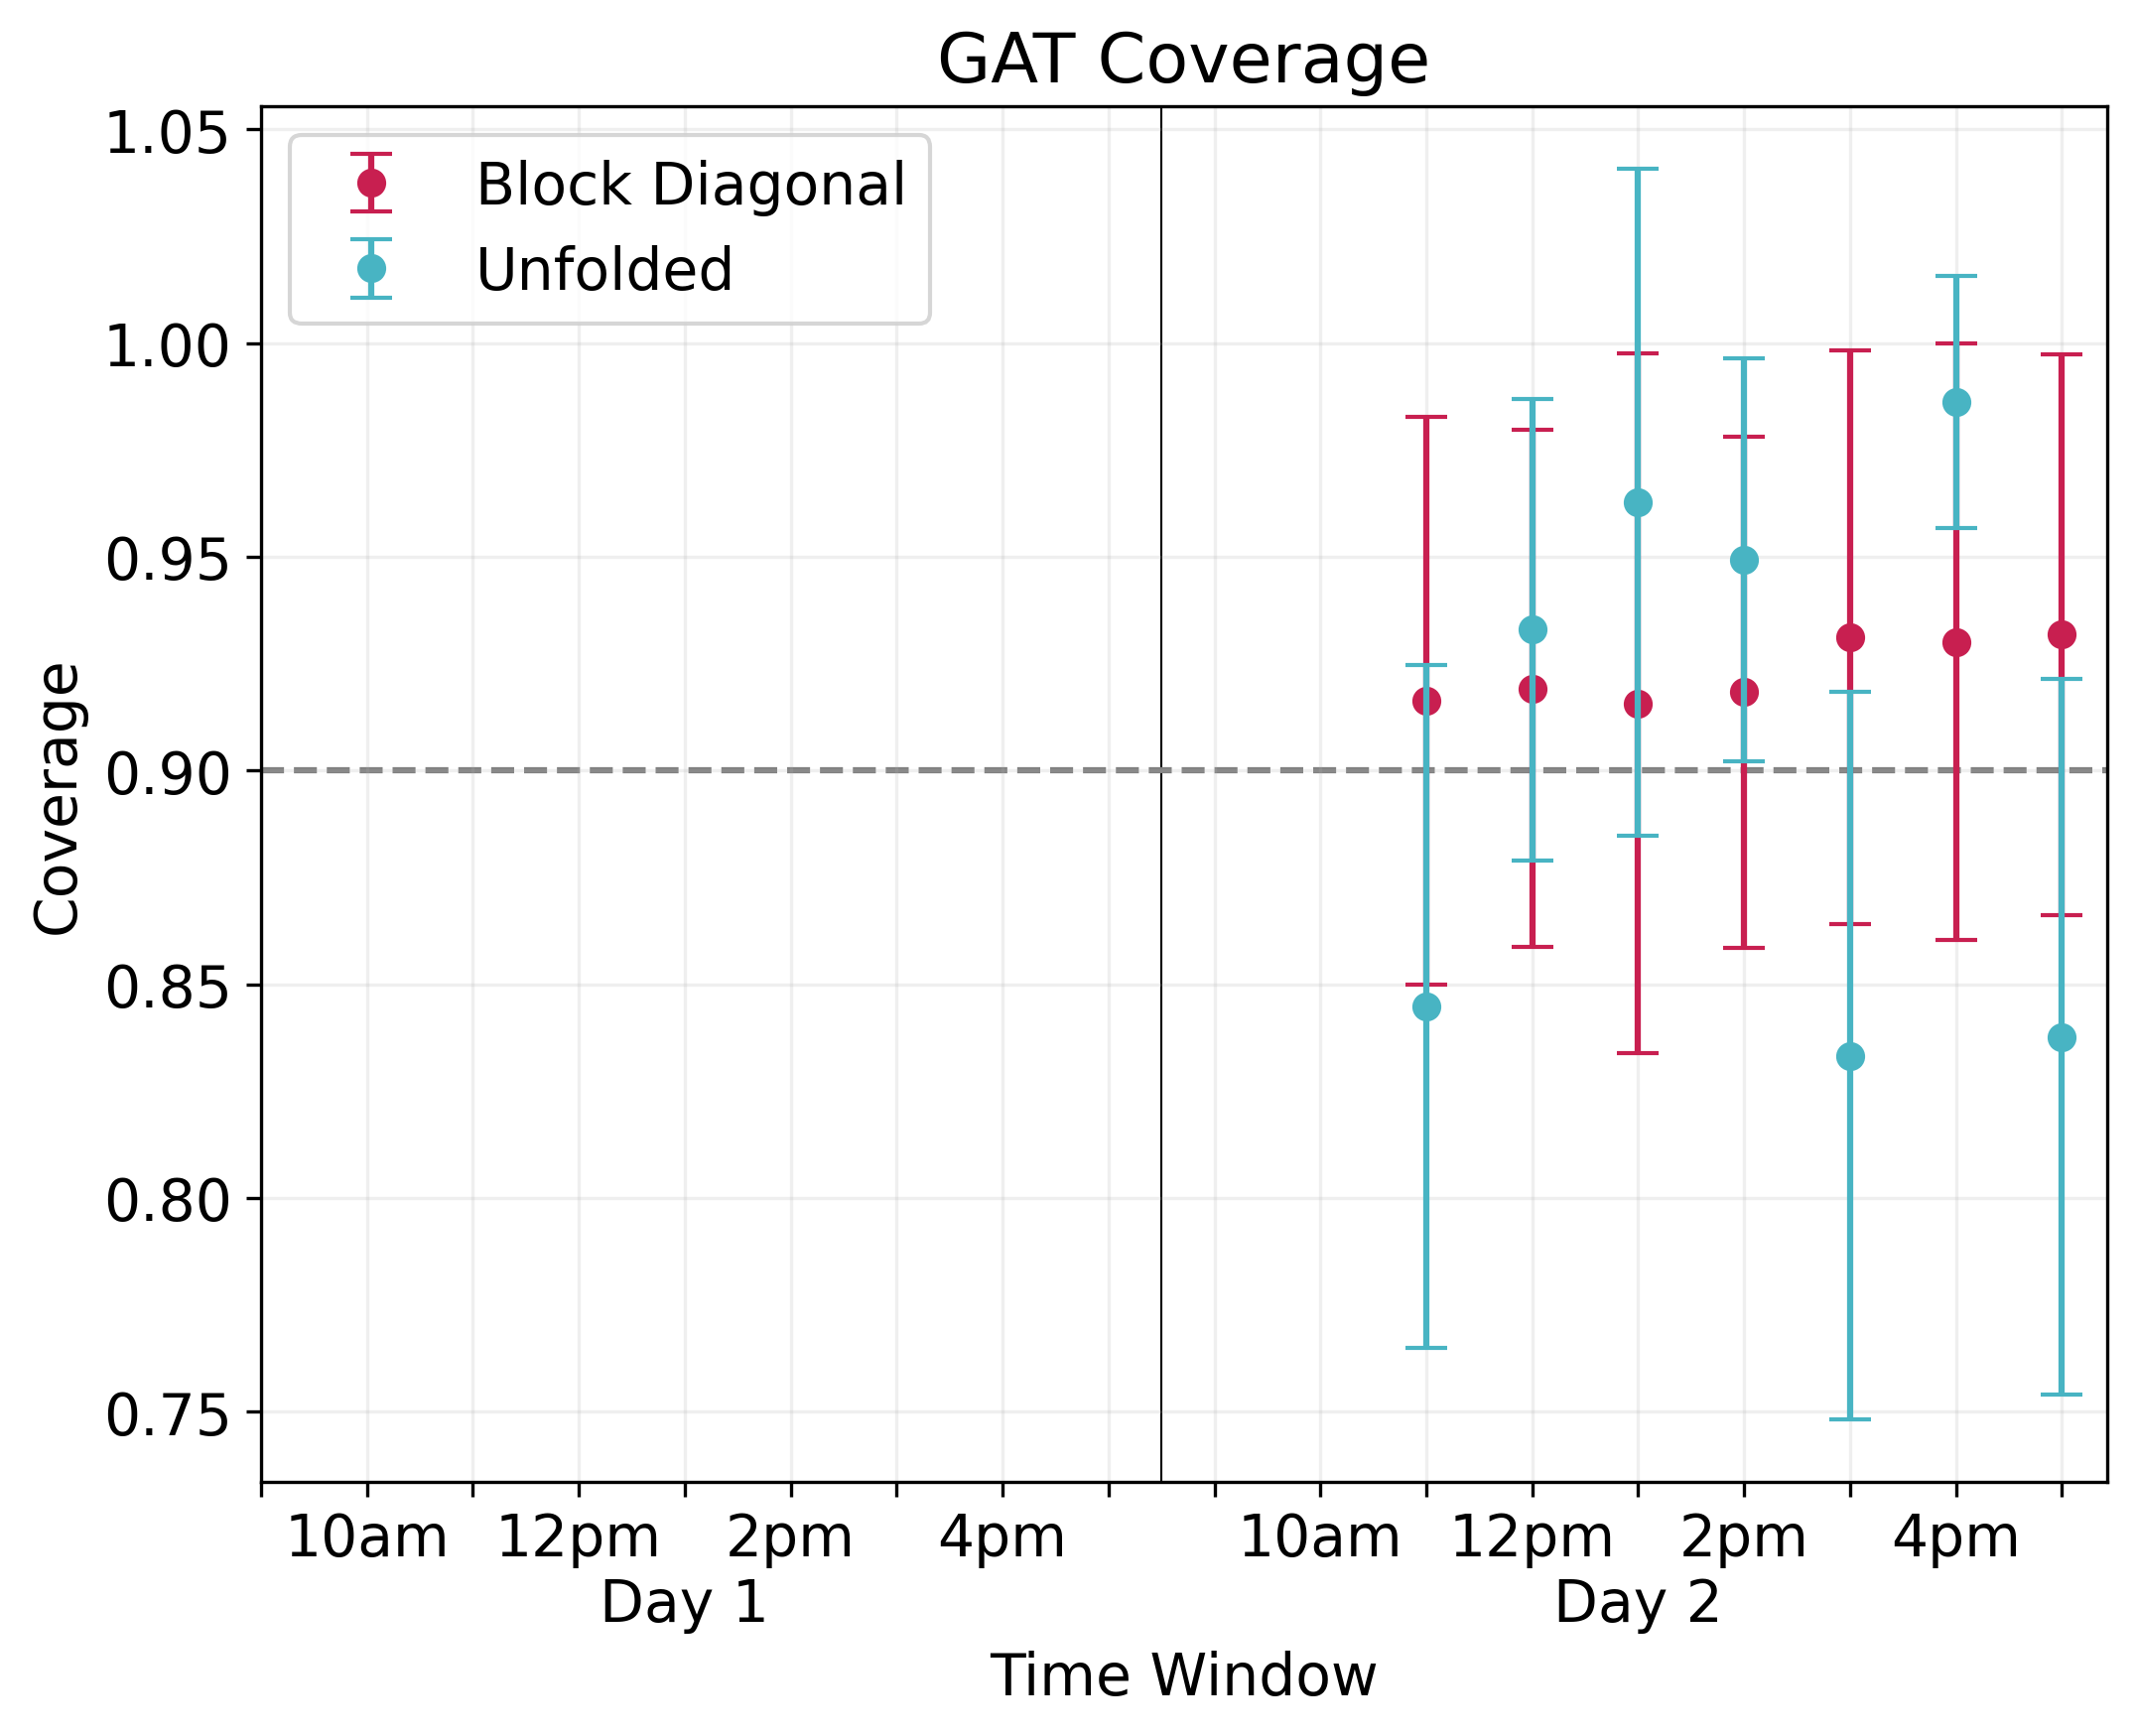

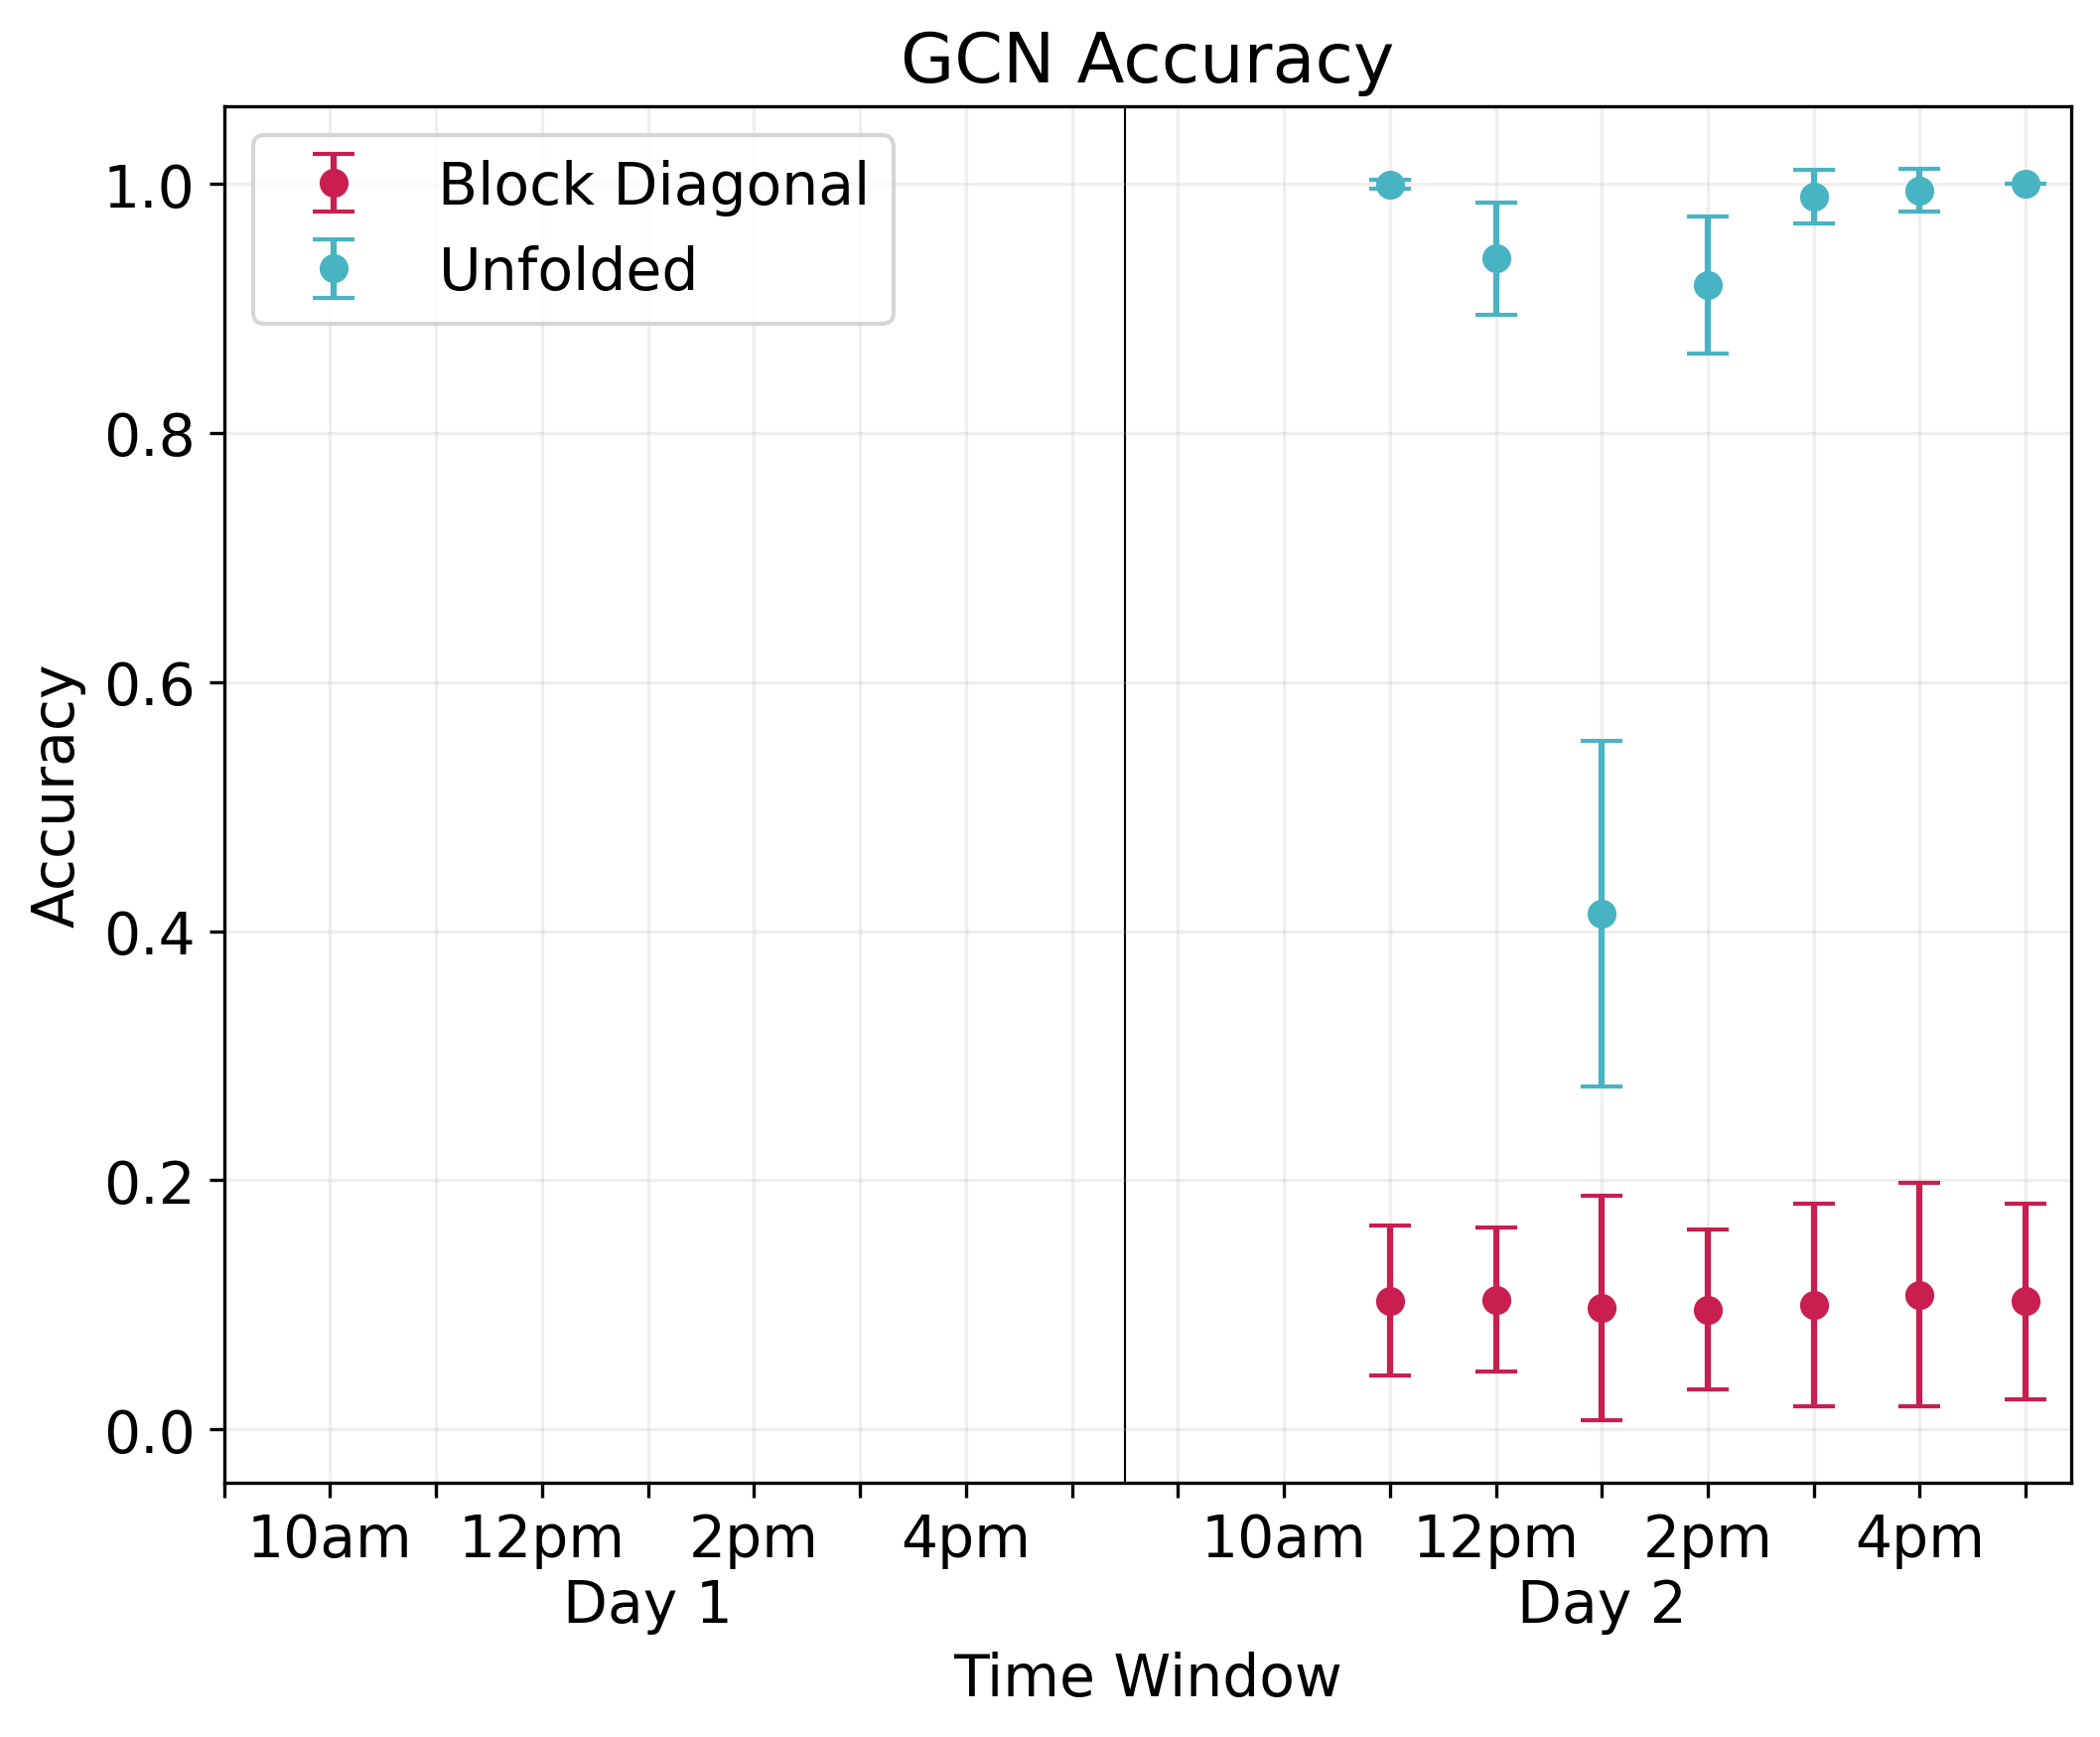

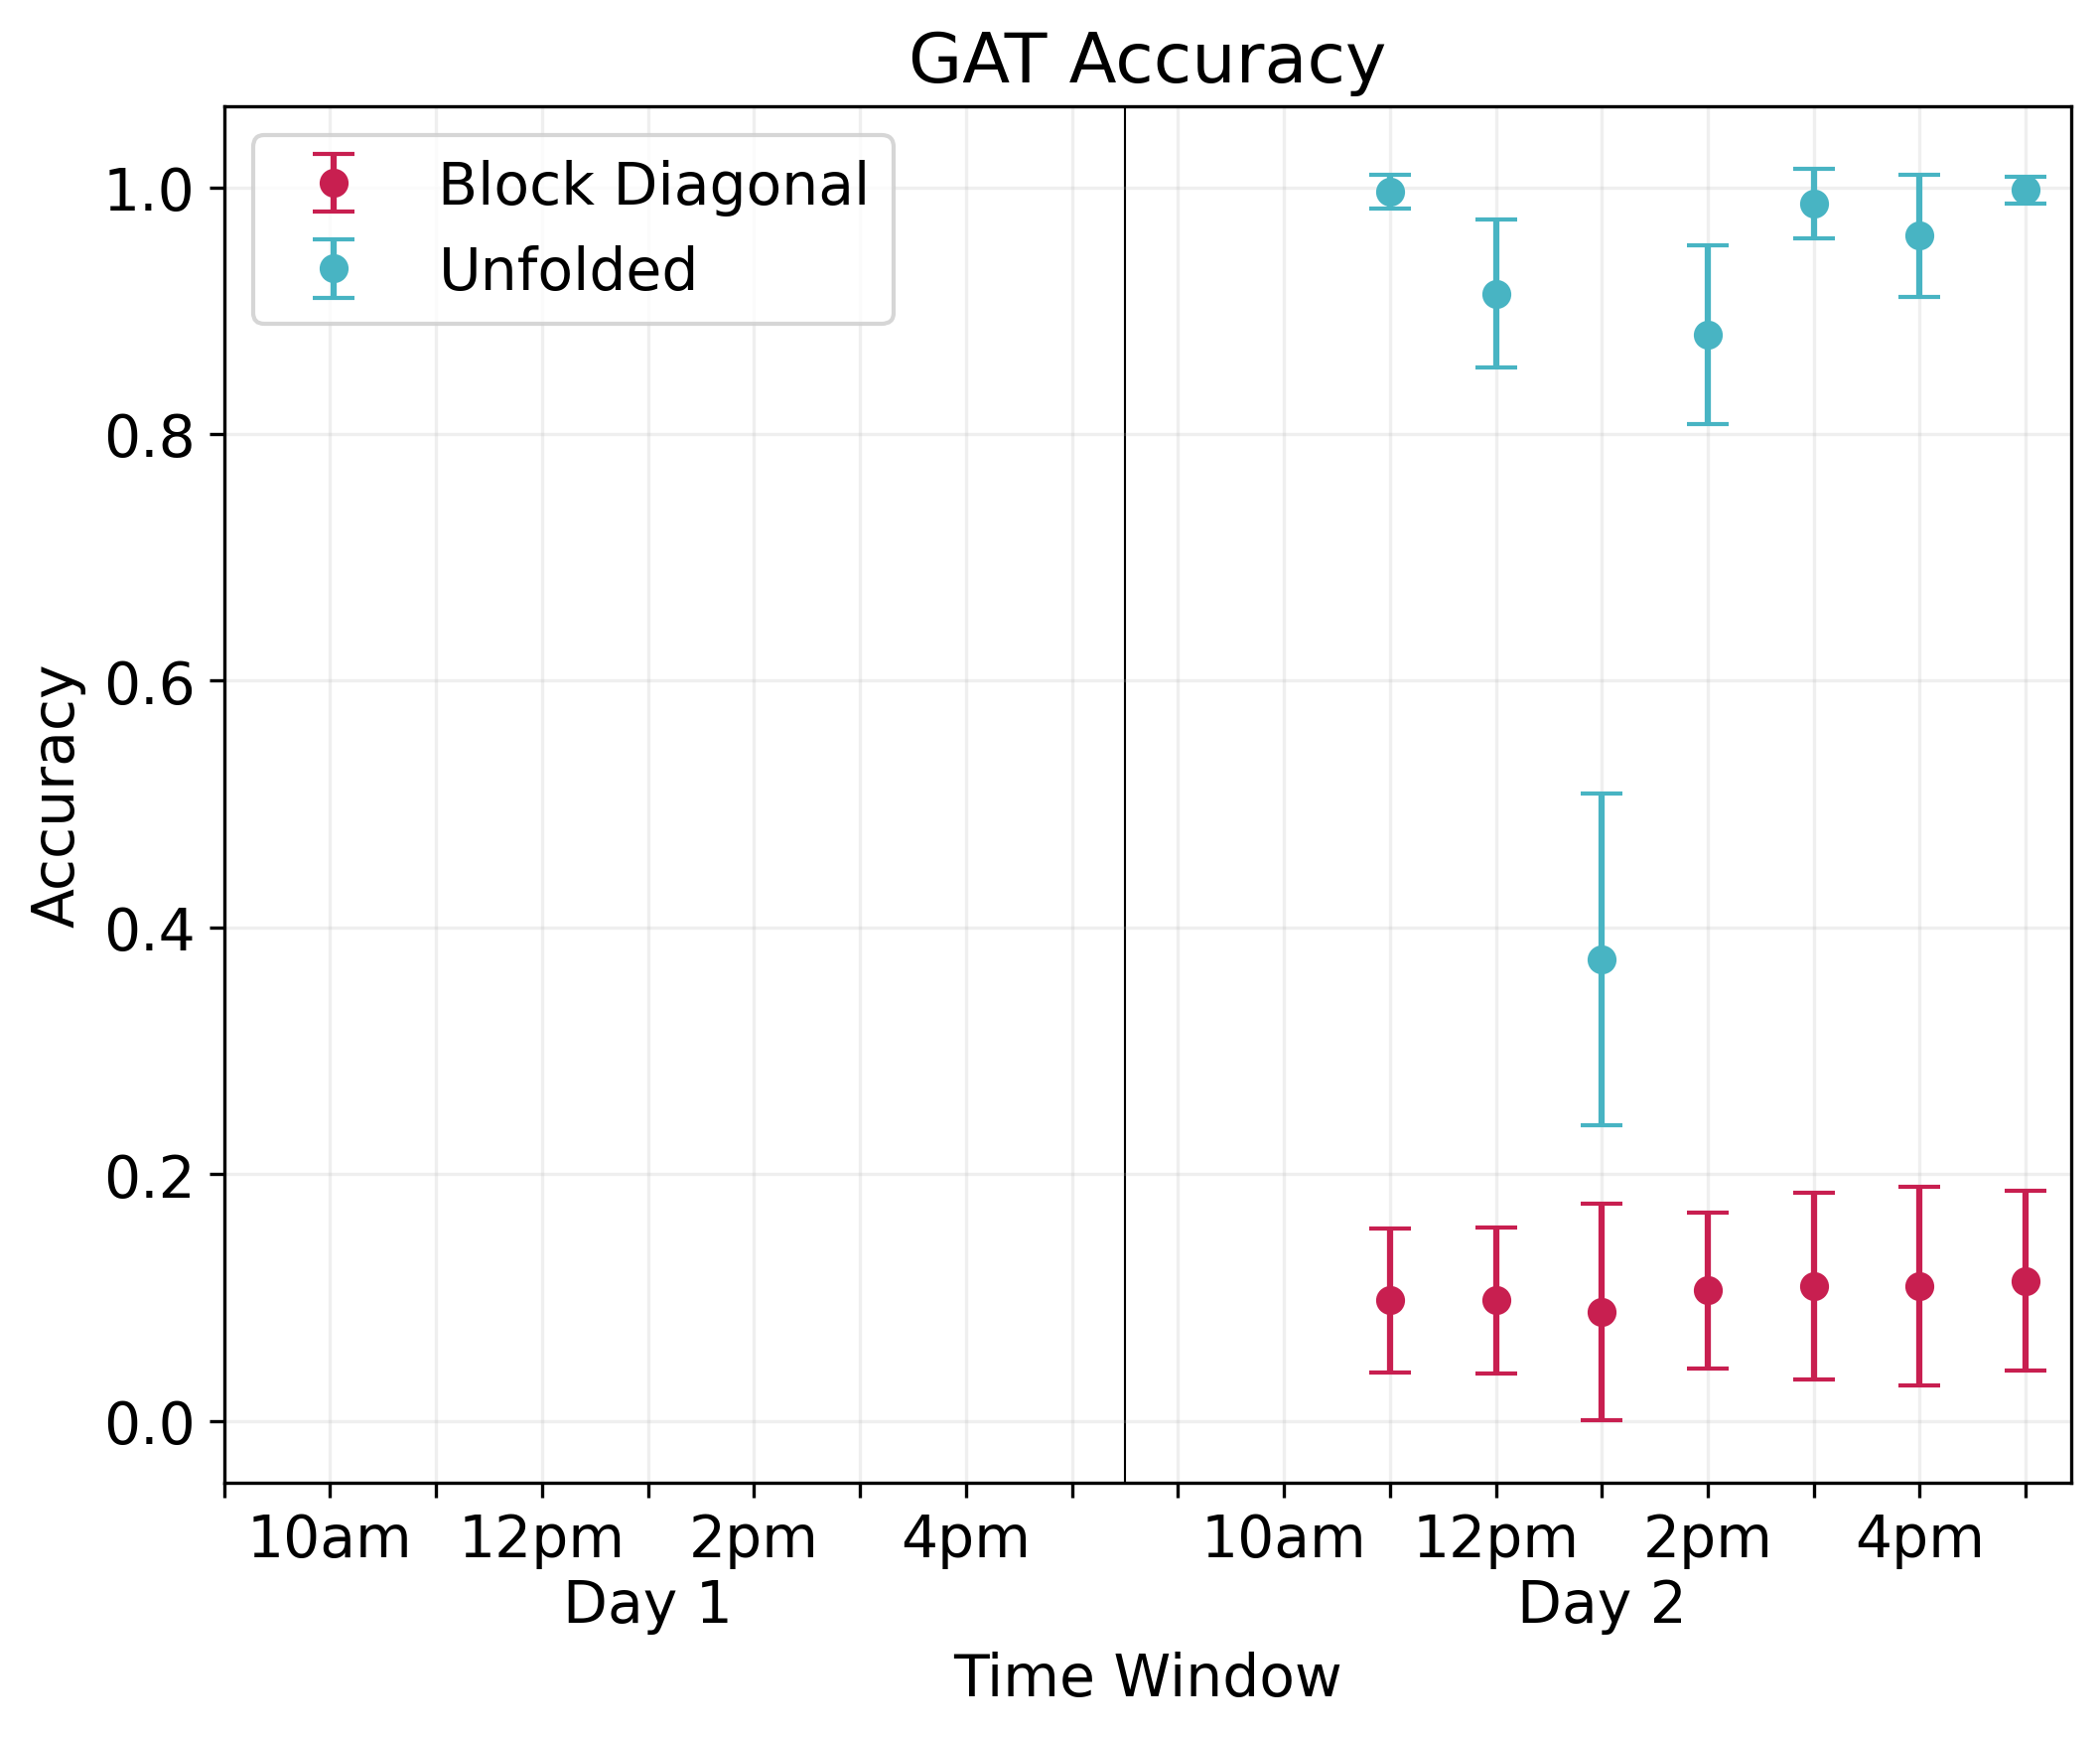

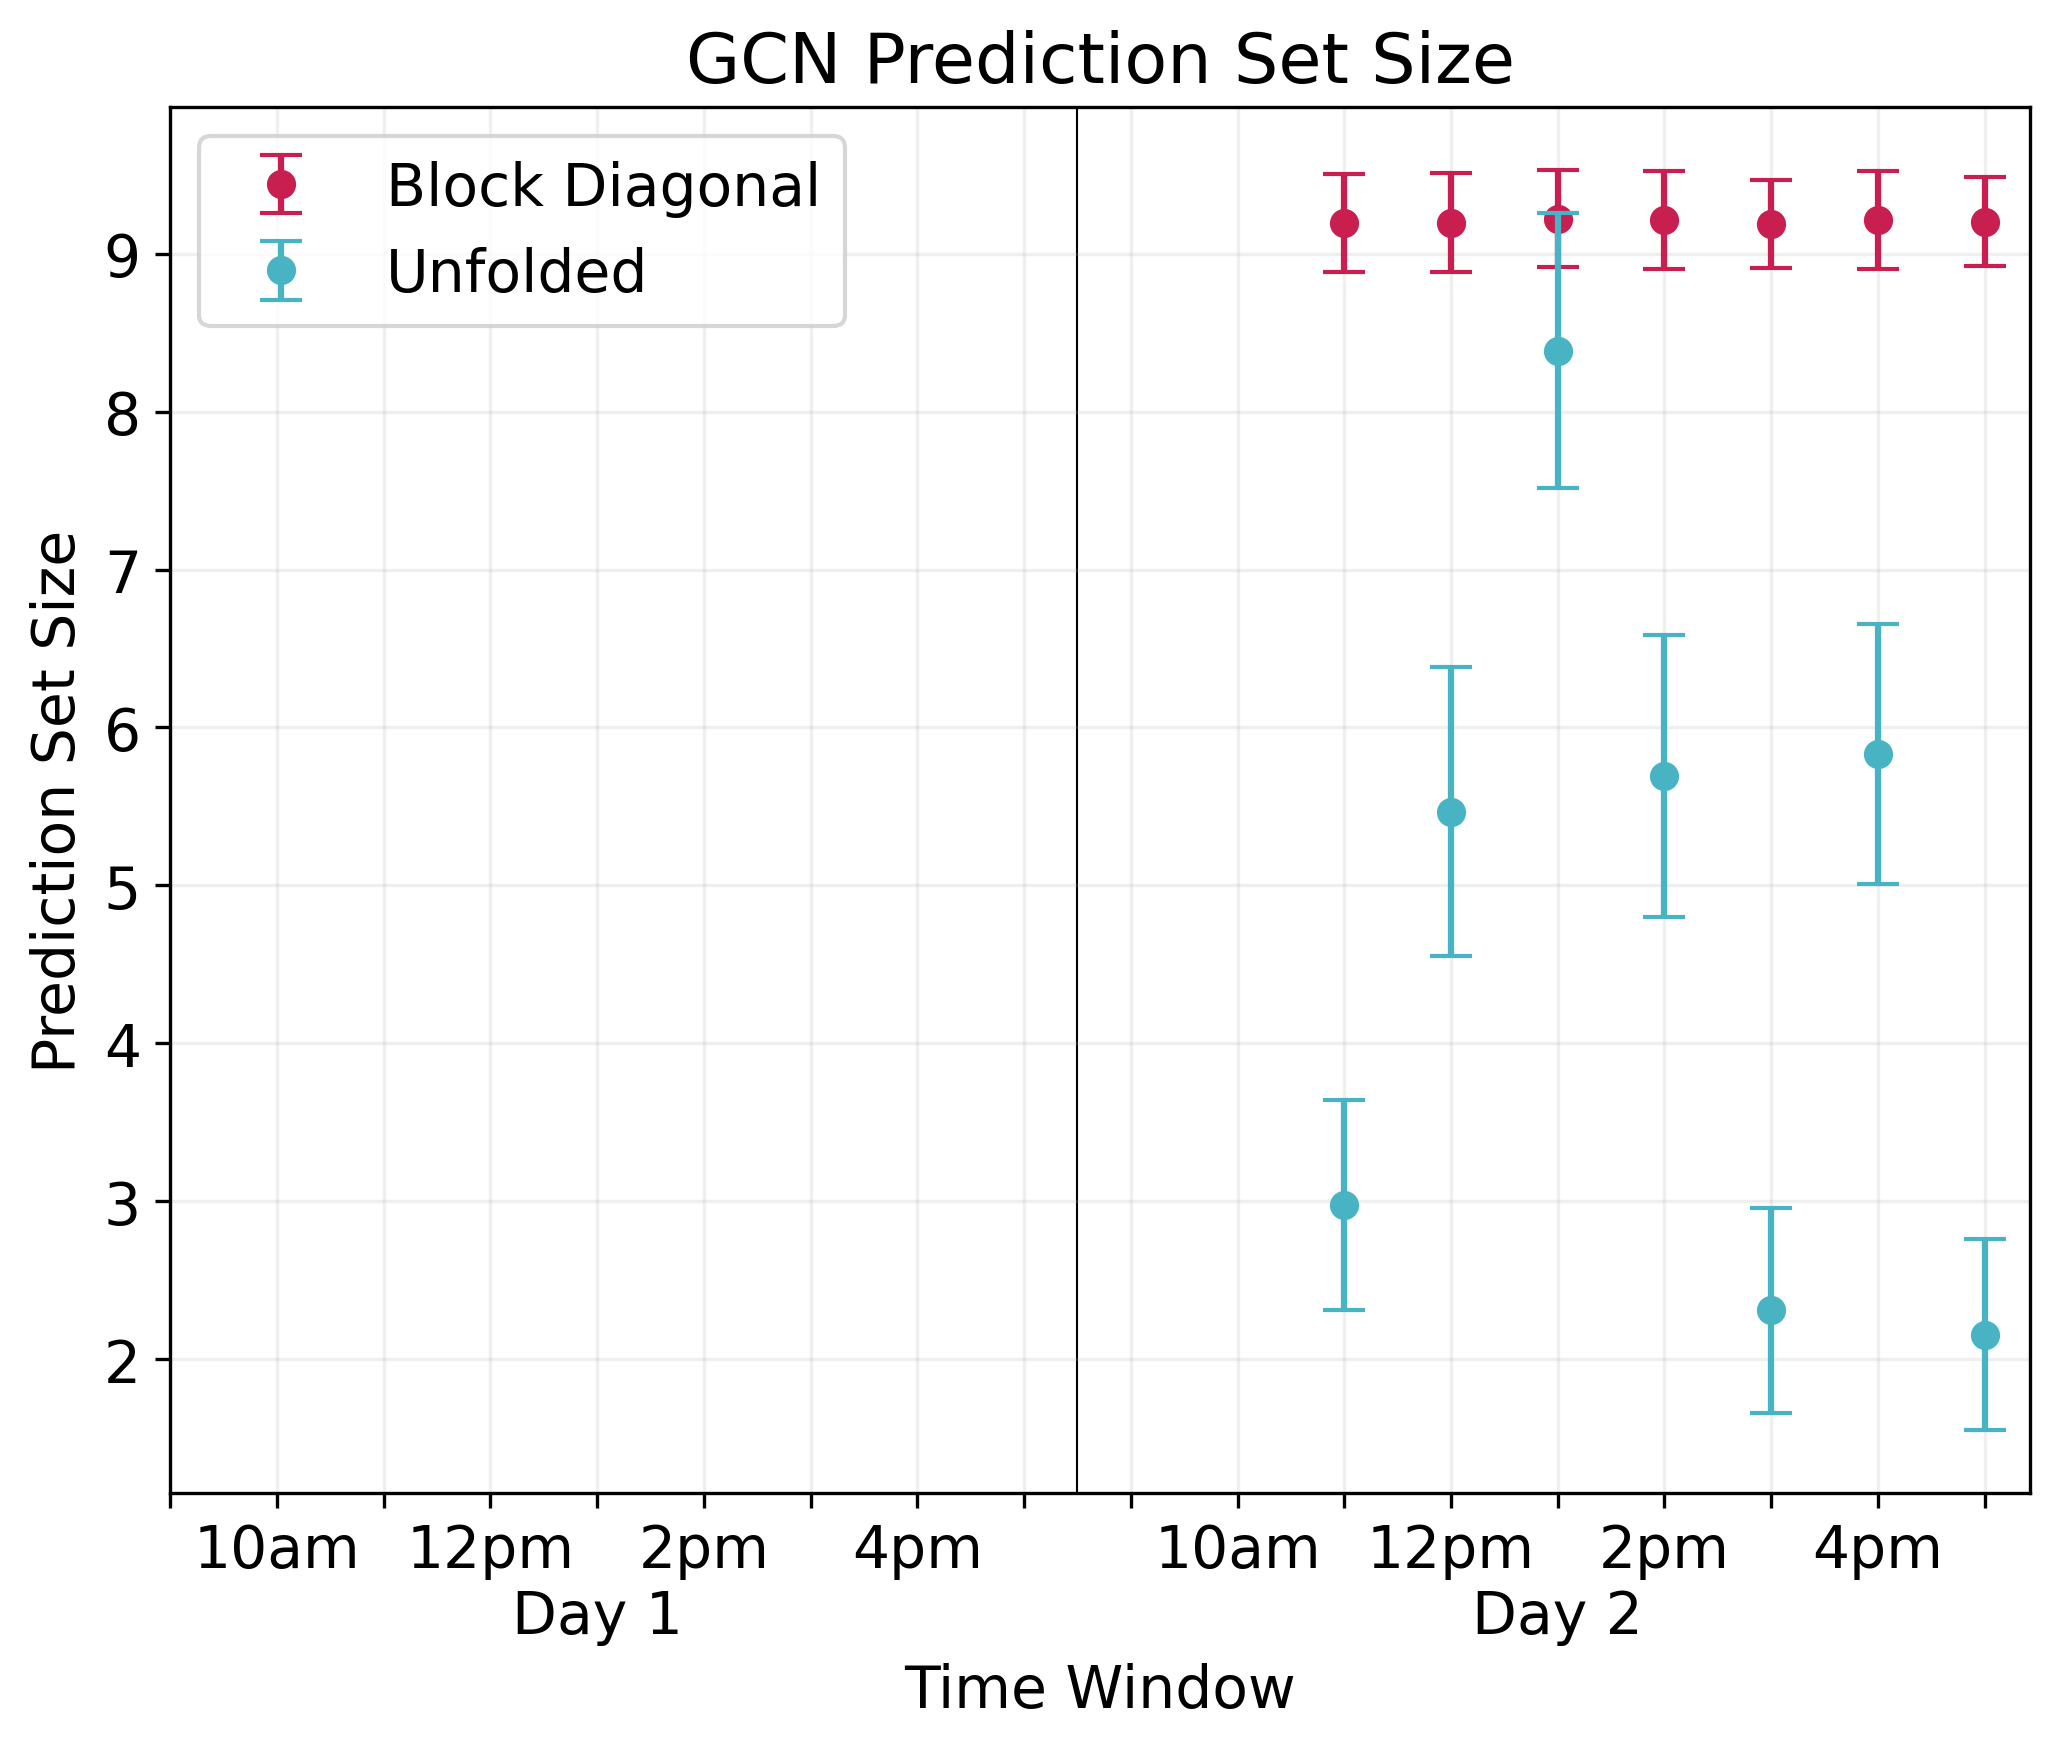

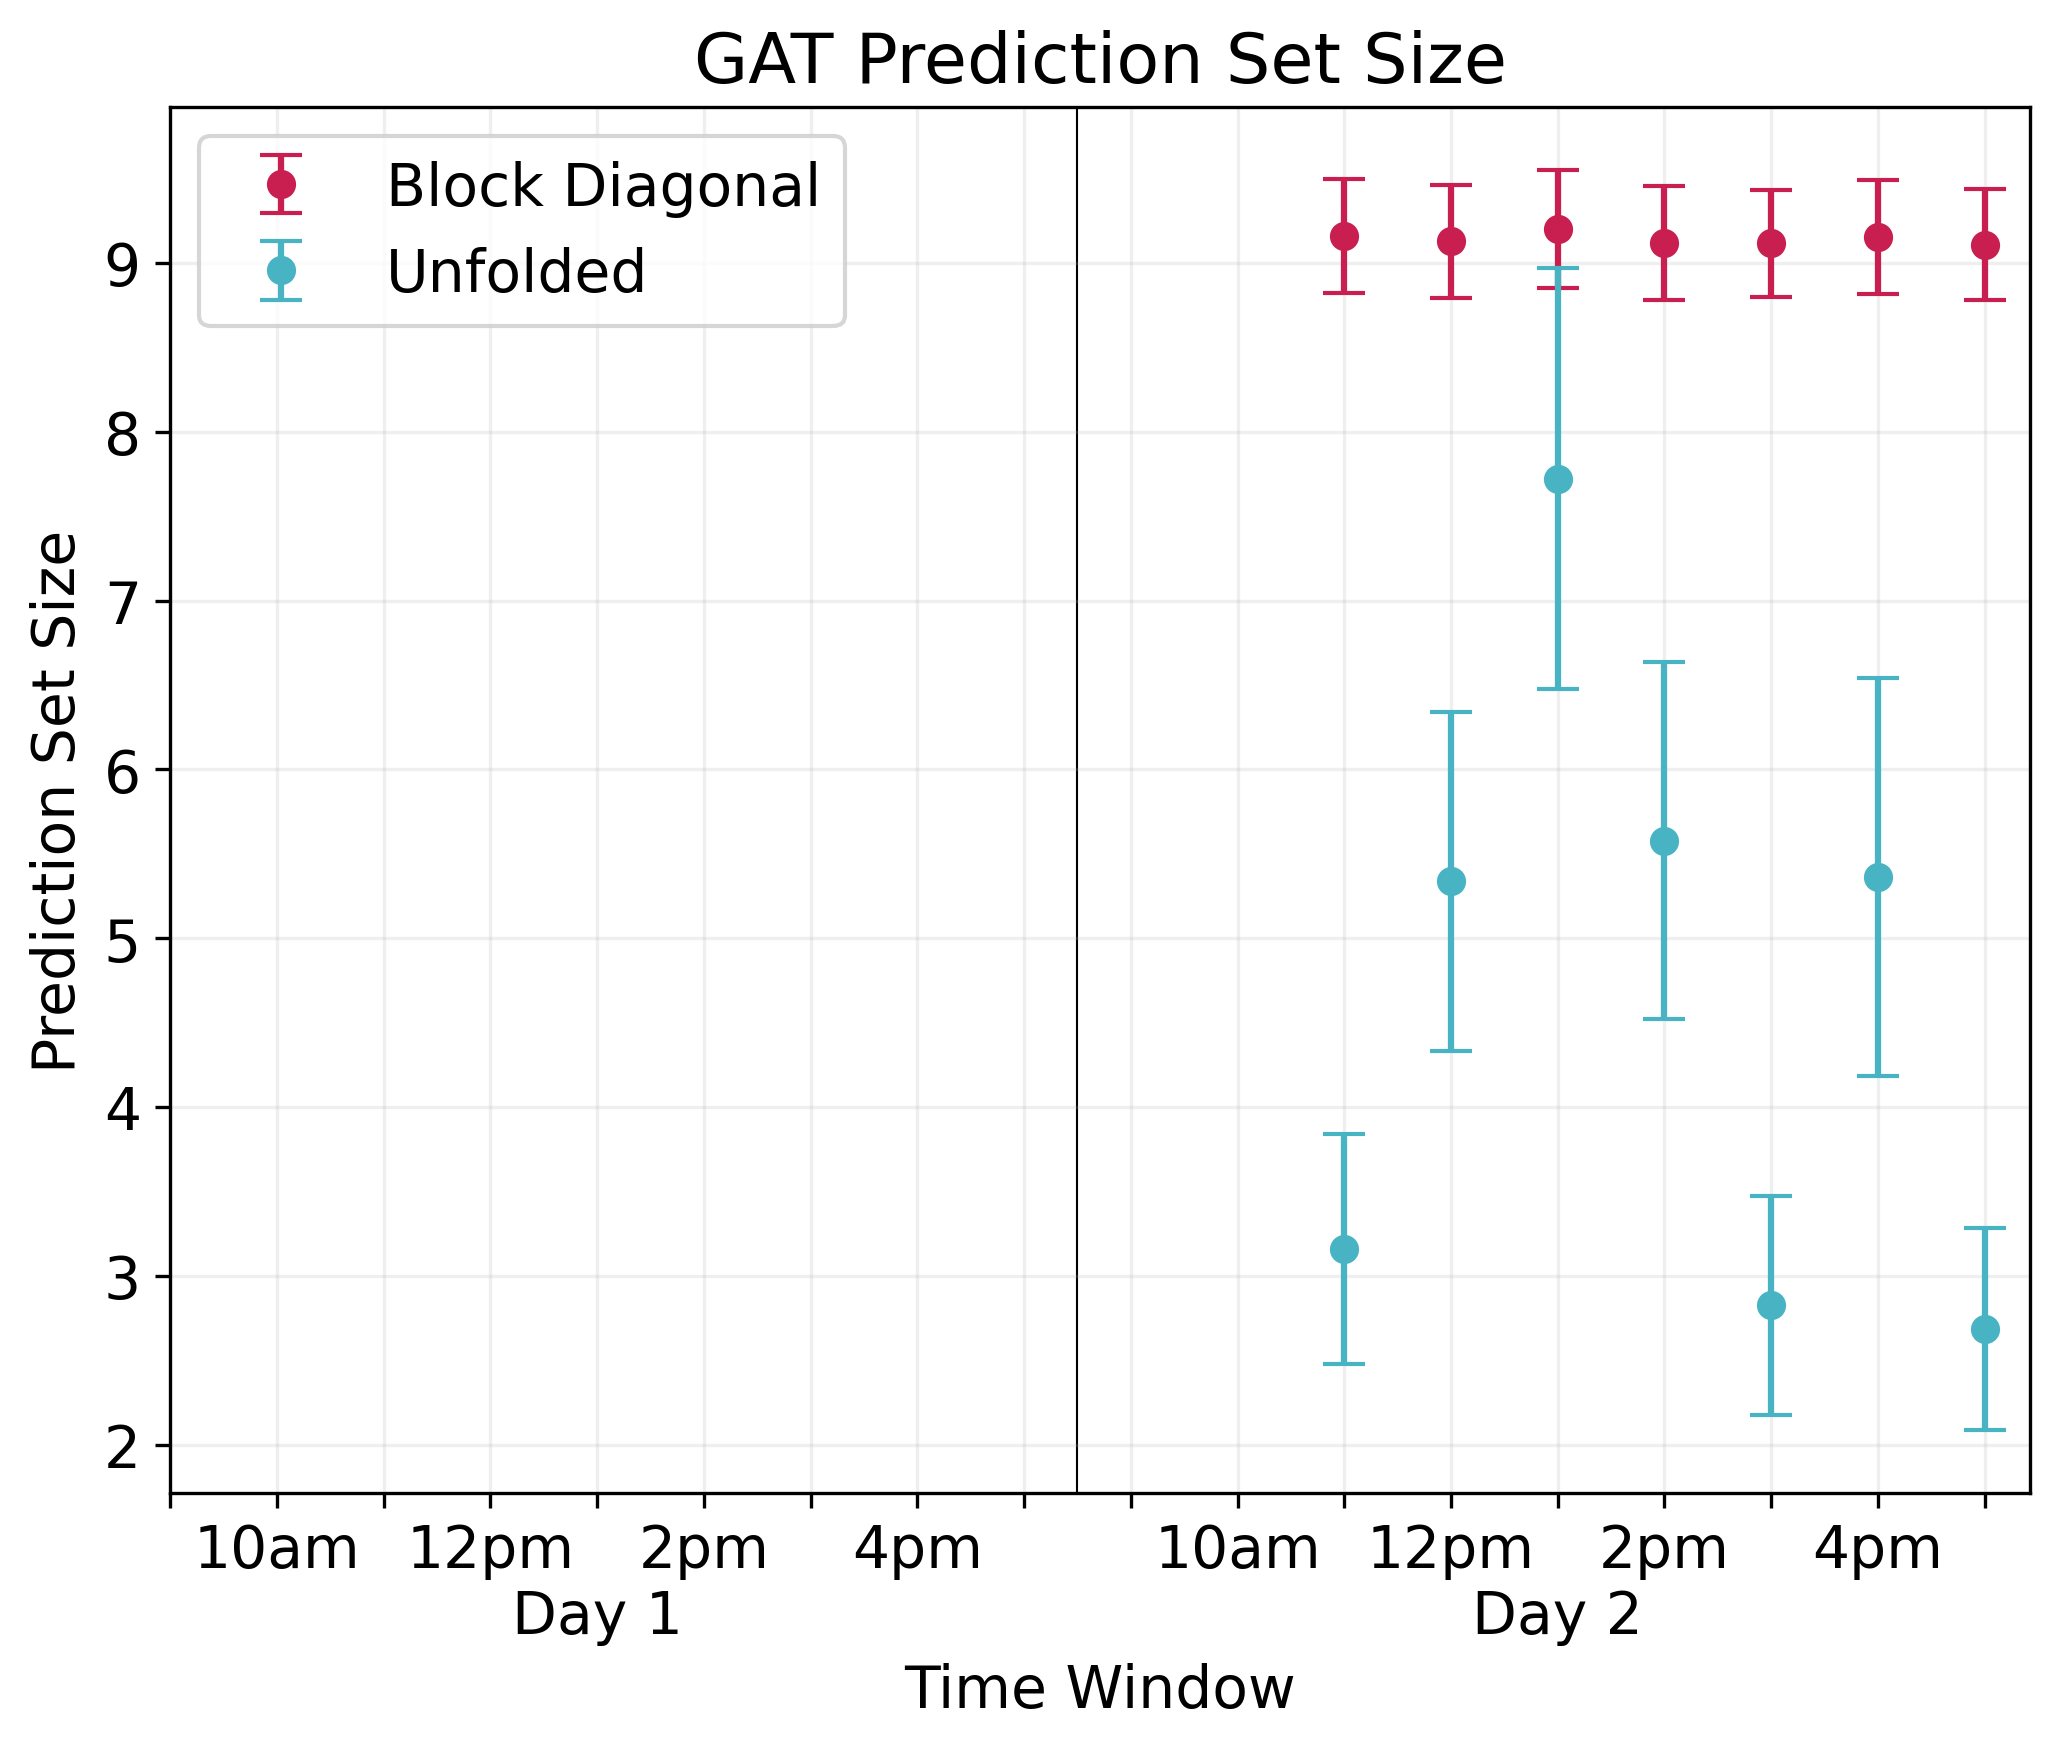

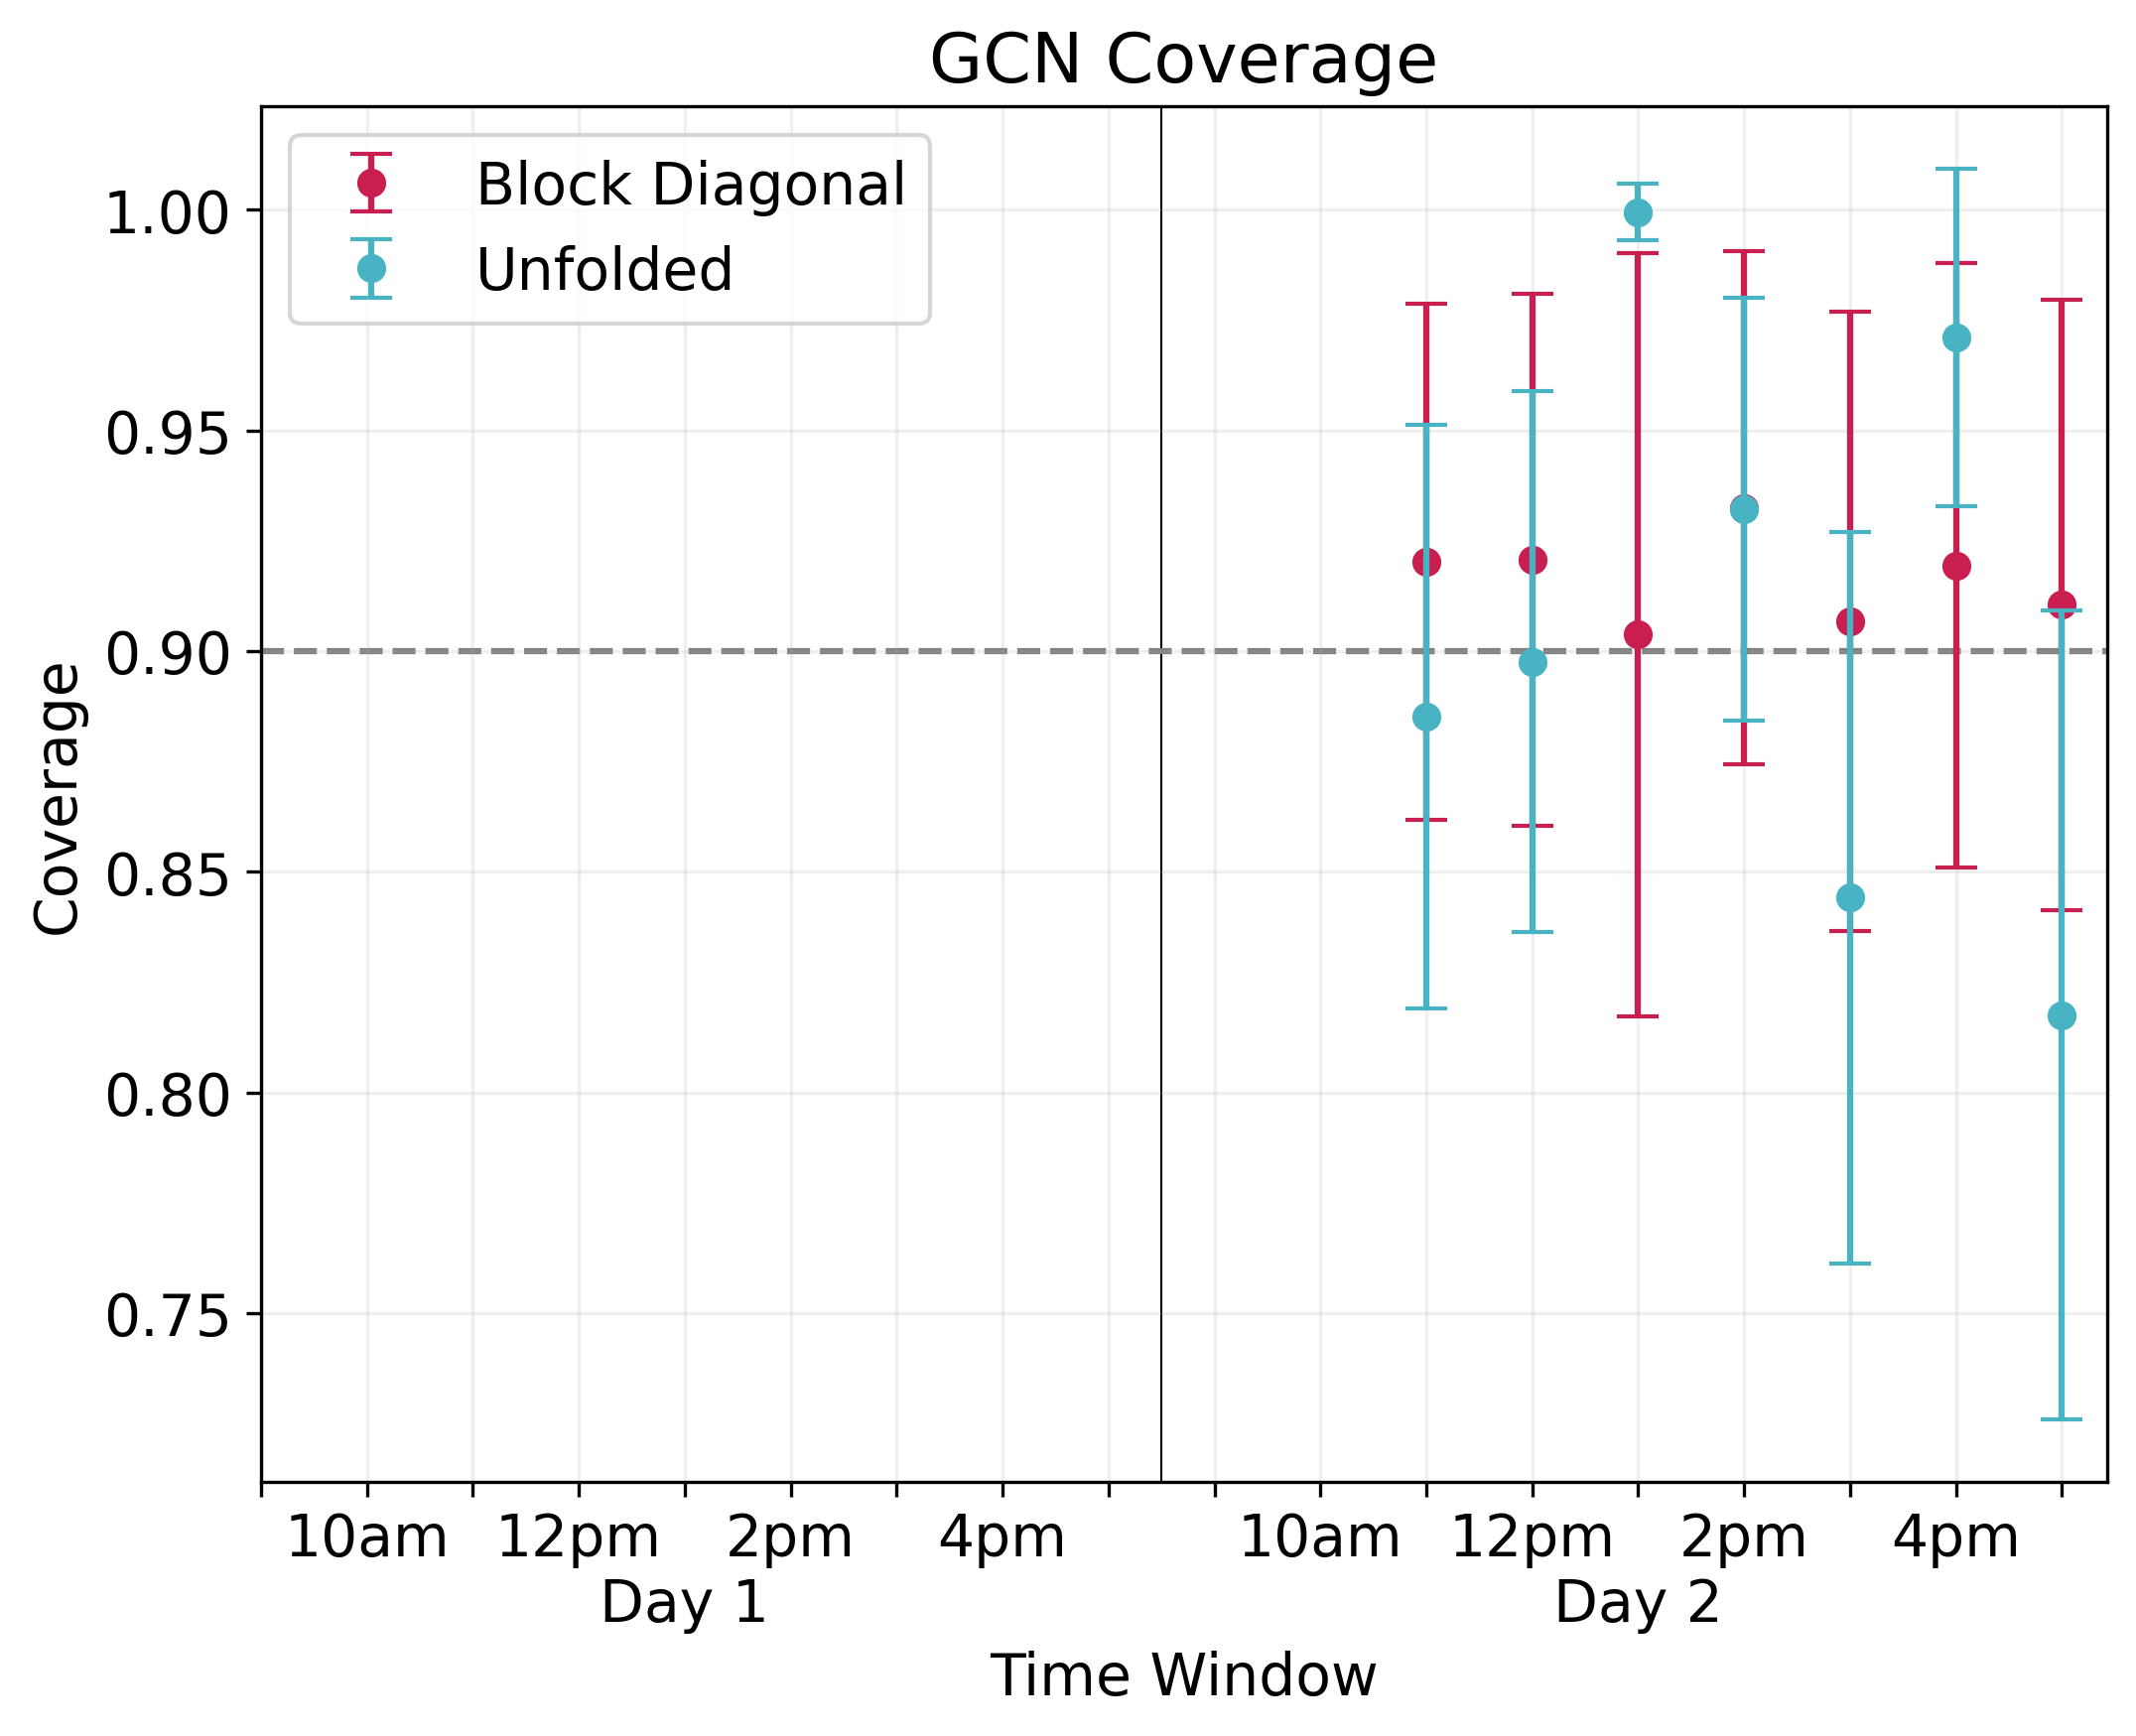

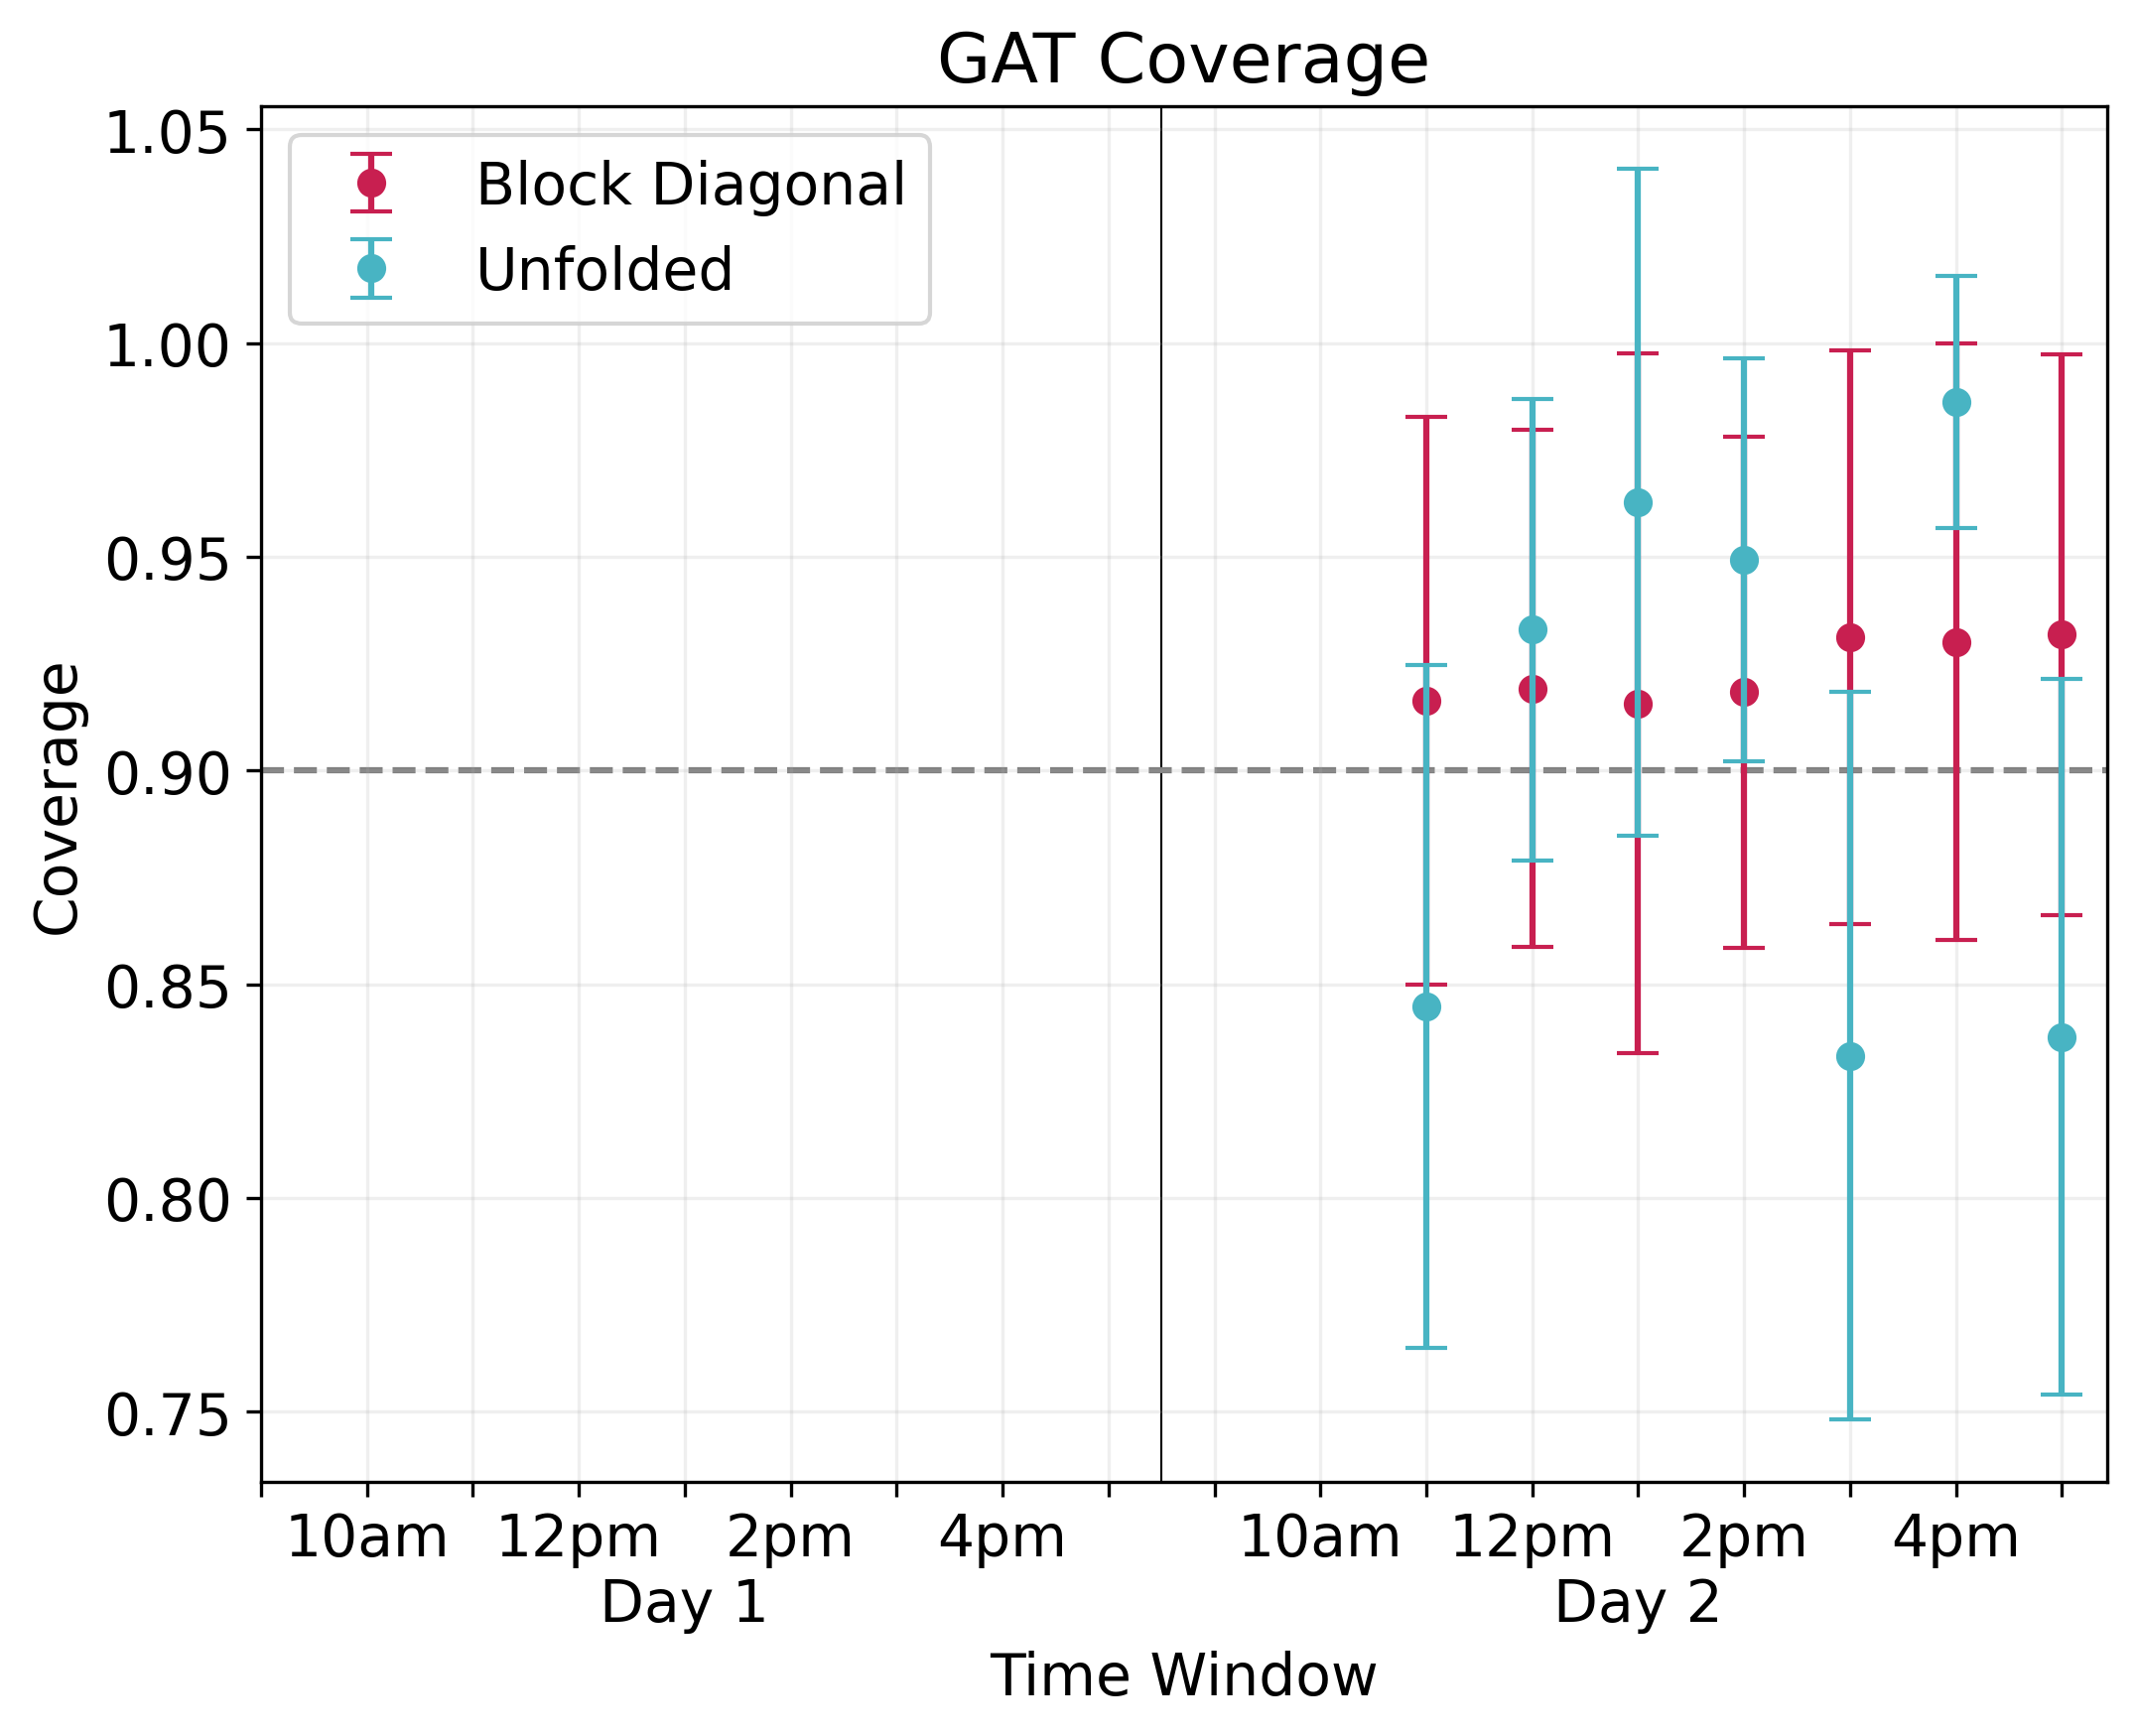

In [14]:

plt.rcParams.update({'font.size': 14})
colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]
for (GNN_model, regime, output) in product(GNN_models, regimes, outputs):
    if output == 'Accuracy':
        output_str = 'Accuracy'
    if output == 'Avg Size':
        output_str = 'Prediction Set Size'
    if output == 'Coverage':
        output_str = 'Coverage'

    for GNN_model in GNN_models:
        fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)
    
        T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

        output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
        output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

        ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1)
        
        if output == 'Coverage':
            ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
        
        ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                    label='Block Diagonal', zorder=2, c=colours[0])
    
        output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
        output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

        ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                    label='Unfolded', zorder=3, c=colours[1])
    
        ax.grid(alpha=0.2)
    
        ax.legend()
        
        ax.set_xticks(range(T))
        ax.set_xticklabels(xlabels)
        
        ax.set_title(GNN_model + ' ' + output_str)
        ax.set_xlabel('Time Window')
        ax.set_ylabel(output_str)
        
        # if save_figs:
        fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                    bbox_inches='tight');

In [ ]:
output_file_prefix ='annotated_figures/School_' 

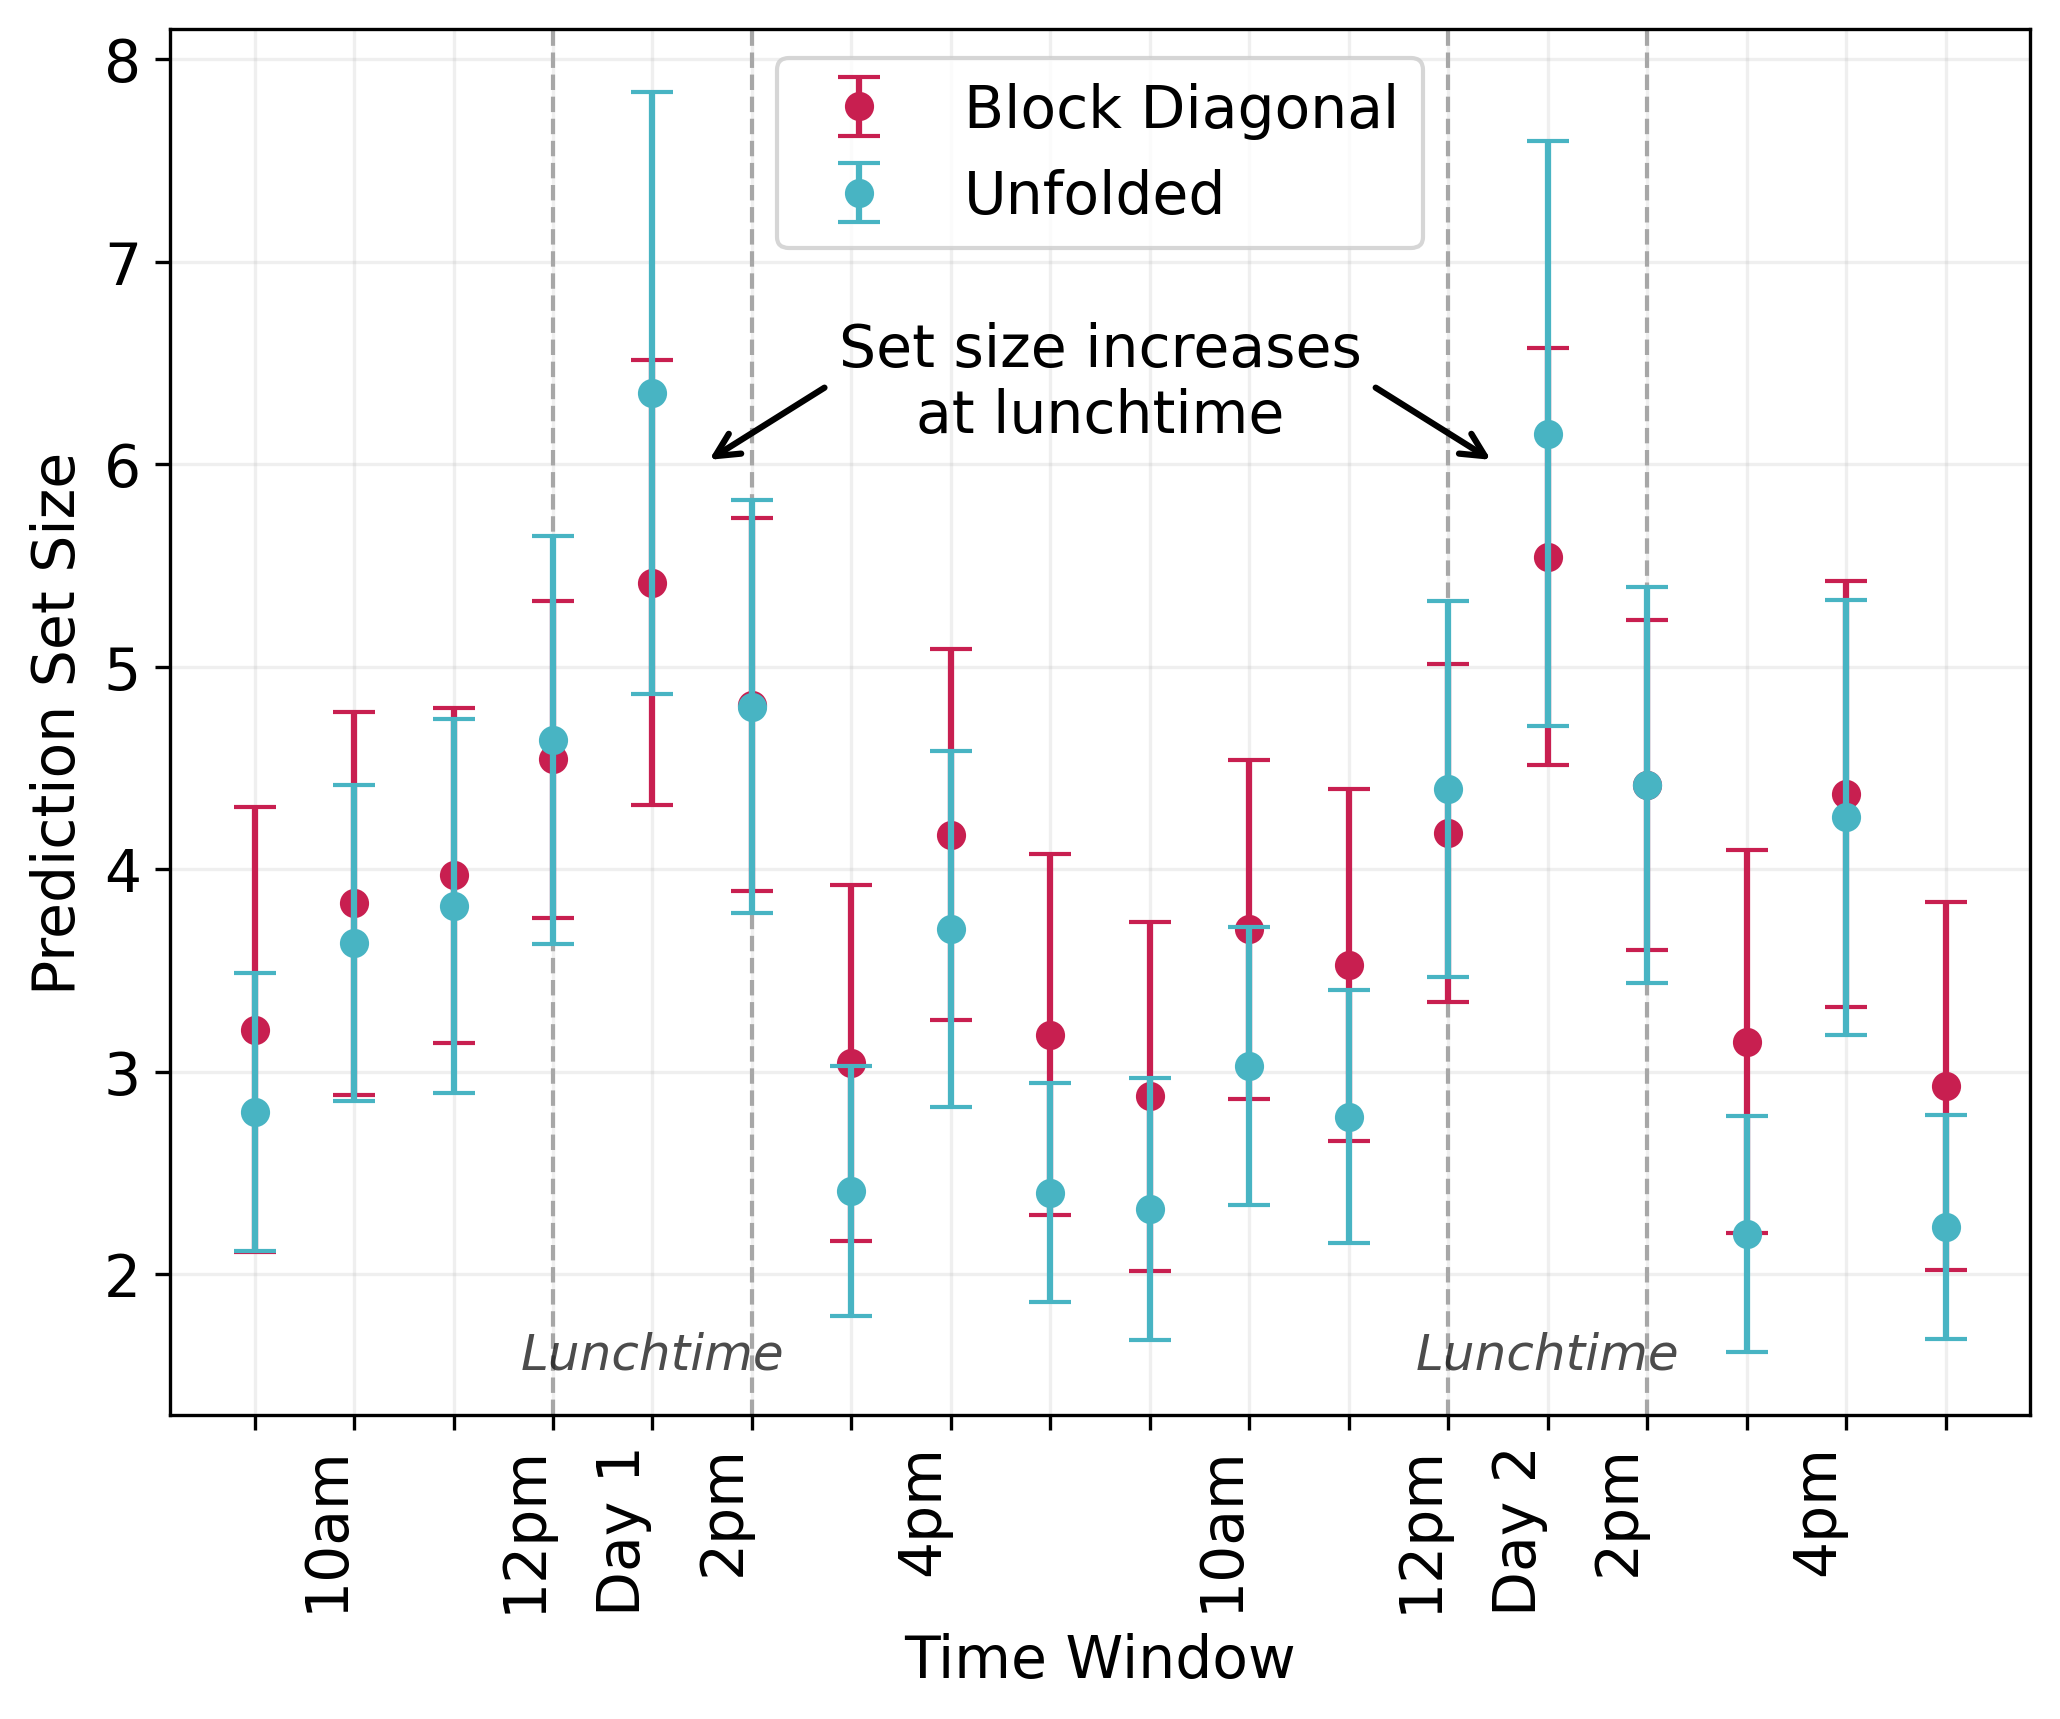

In [ ]:
output = "Avg Size"
output_str = "Prediction Set Size"
regime = "Trans"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    ax.text(4, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    # ax.text(2, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(4, 0.32), xytext=(2, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    # ax.text(15, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(13, 0.32), xytext=(15, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(8.5, 6.4, 'Set size increases\nat lunchtime', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(4.5, 6), xytext=(5.8, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    ax.annotate('', xy=(12.5, 6), xytext=(11.2, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

## Specific plots

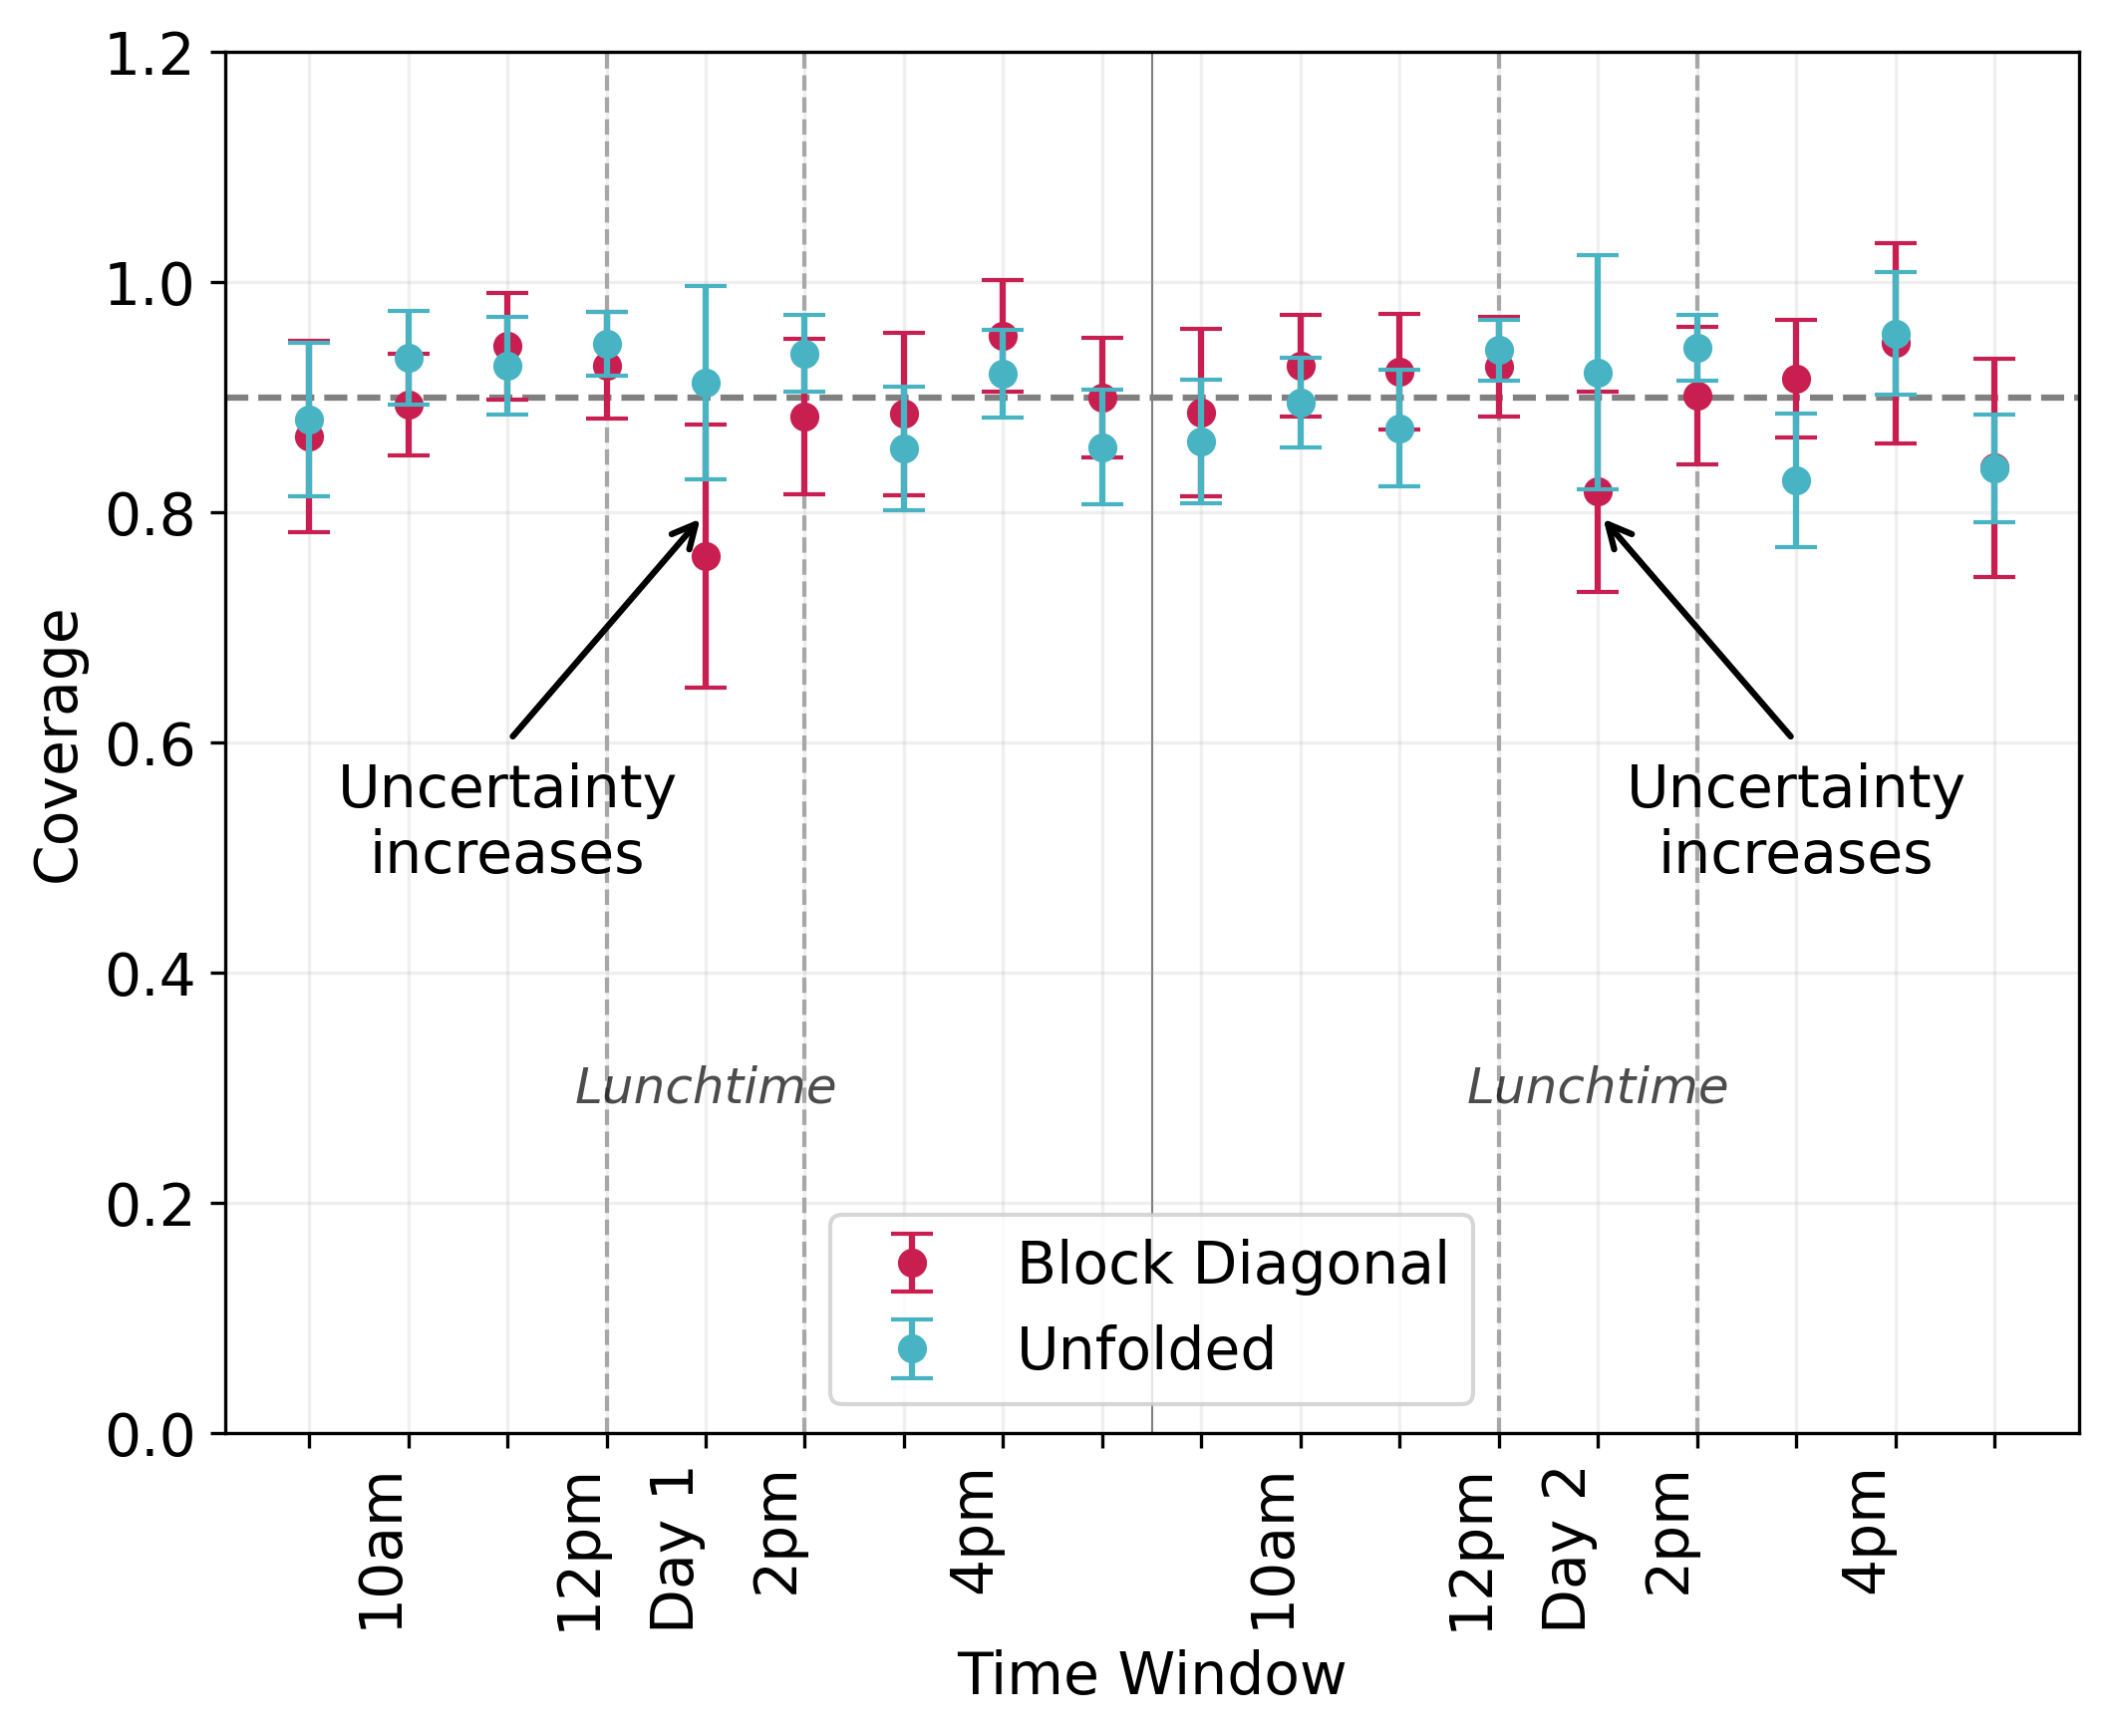

In [ ]:
output = "Coverage"
output_str = "Coverage"
regime = "Trans"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    ax.text(4, 0.3, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 0.3, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    ax.text(2, 0.53, 'Uncertainty\nincreases', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(4, 0.8), xytext=(2, 0.6), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(15, 0.53, 'Uncertainty\nincreases', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(13, 0.8), xytext=(15, 0.6), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))



    # Crop the figures to be from y=0 to y=1
    ax.set_ylim(0, 1.2)


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

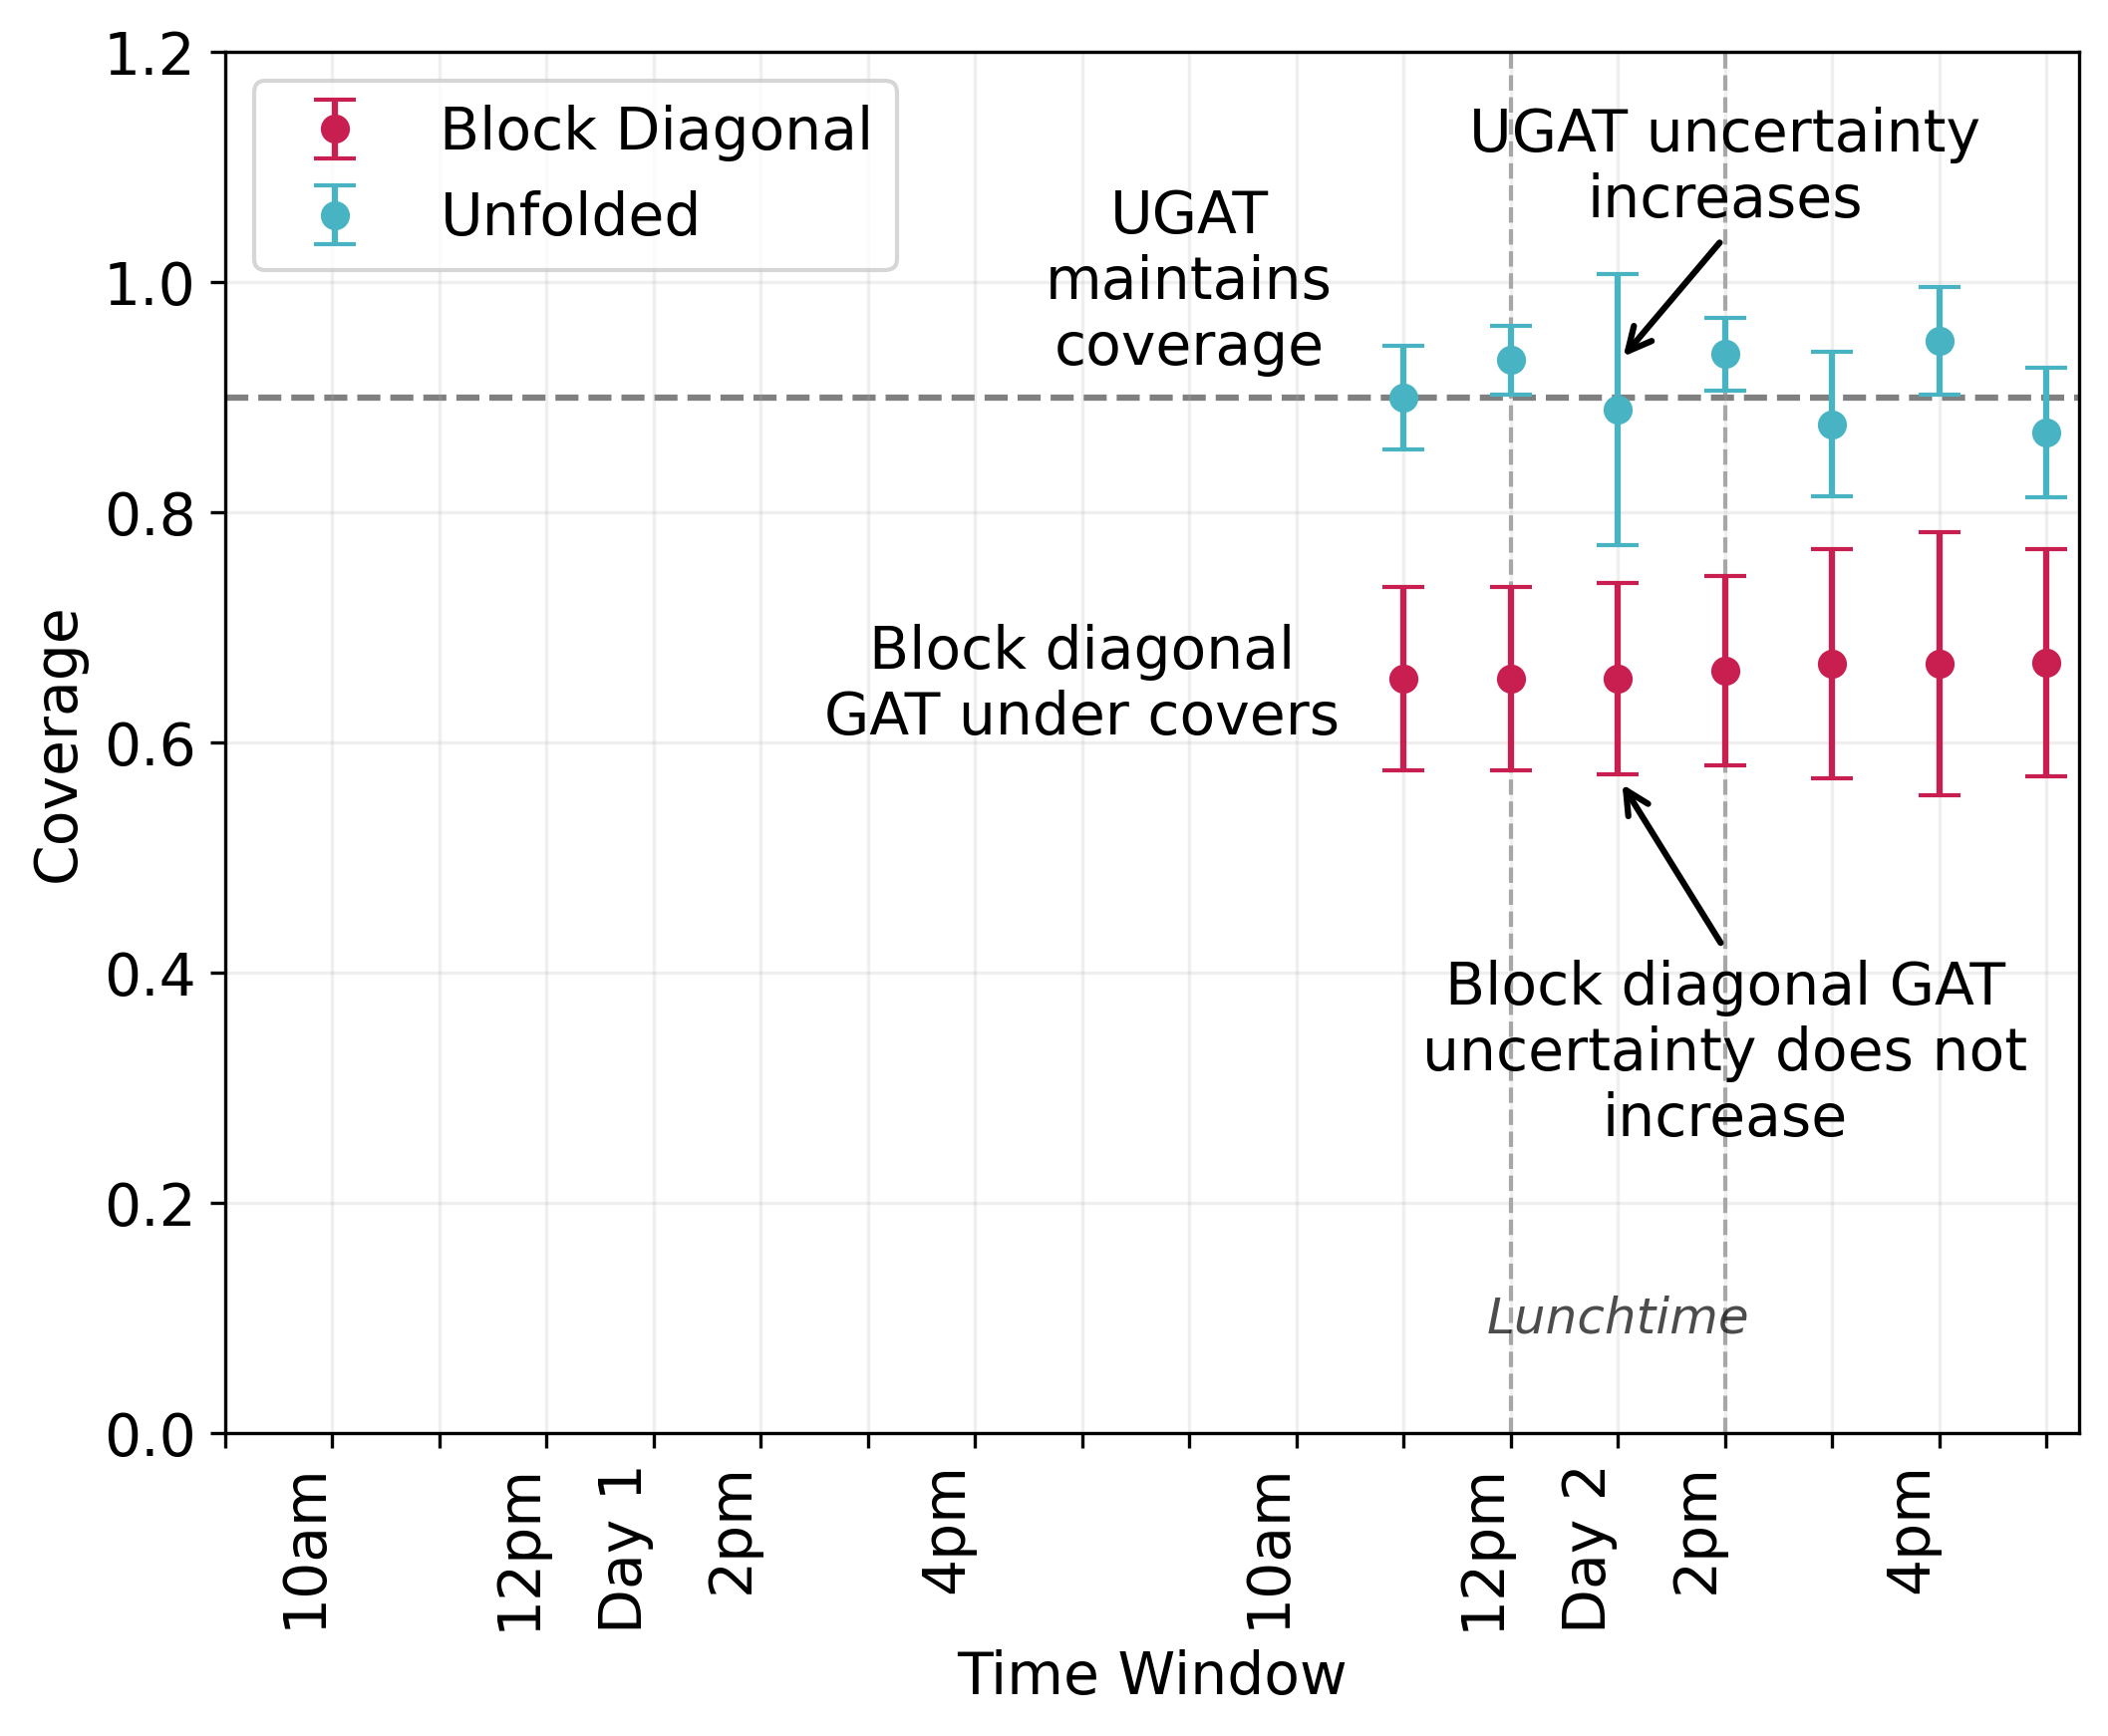

In [ ]:
output = "Coverage"
output_str = "Coverage"
regime = "Semi-Ind"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    # ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1)
    # ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    # ax.text(4, 0.3, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.5, fontsize=10, fontstyle='italic')
    ax.text(13, 0.1, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    # ax.text(2, 0.53, 'Uncertainty\nincreases', fontsize=12, ha='center', va='center')
    # ax.annotate('', xy=(4, 0.8), xytext=(2, 0.6), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(14, 1.1, 'UGAT uncertainty\nincreases', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(13, 0.93), xytext=(14, 1.04), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(9, 1, 'UGAT\nmaintains\ncoverage', fontsize=14, ha='center', va='center')

    ax.text(14, 0.33, 'Block diagonal GAT\nuncertainty does not\nincrease', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(13, 0.57), xytext=(14, 0.42), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(8, 0.65, 'Block diagonal\nGAT under covers', fontsize=14, ha='center', va='center')


    # Crop the figures to be from y=0 to y=1
    ax.set_ylim(0, 1.2)


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

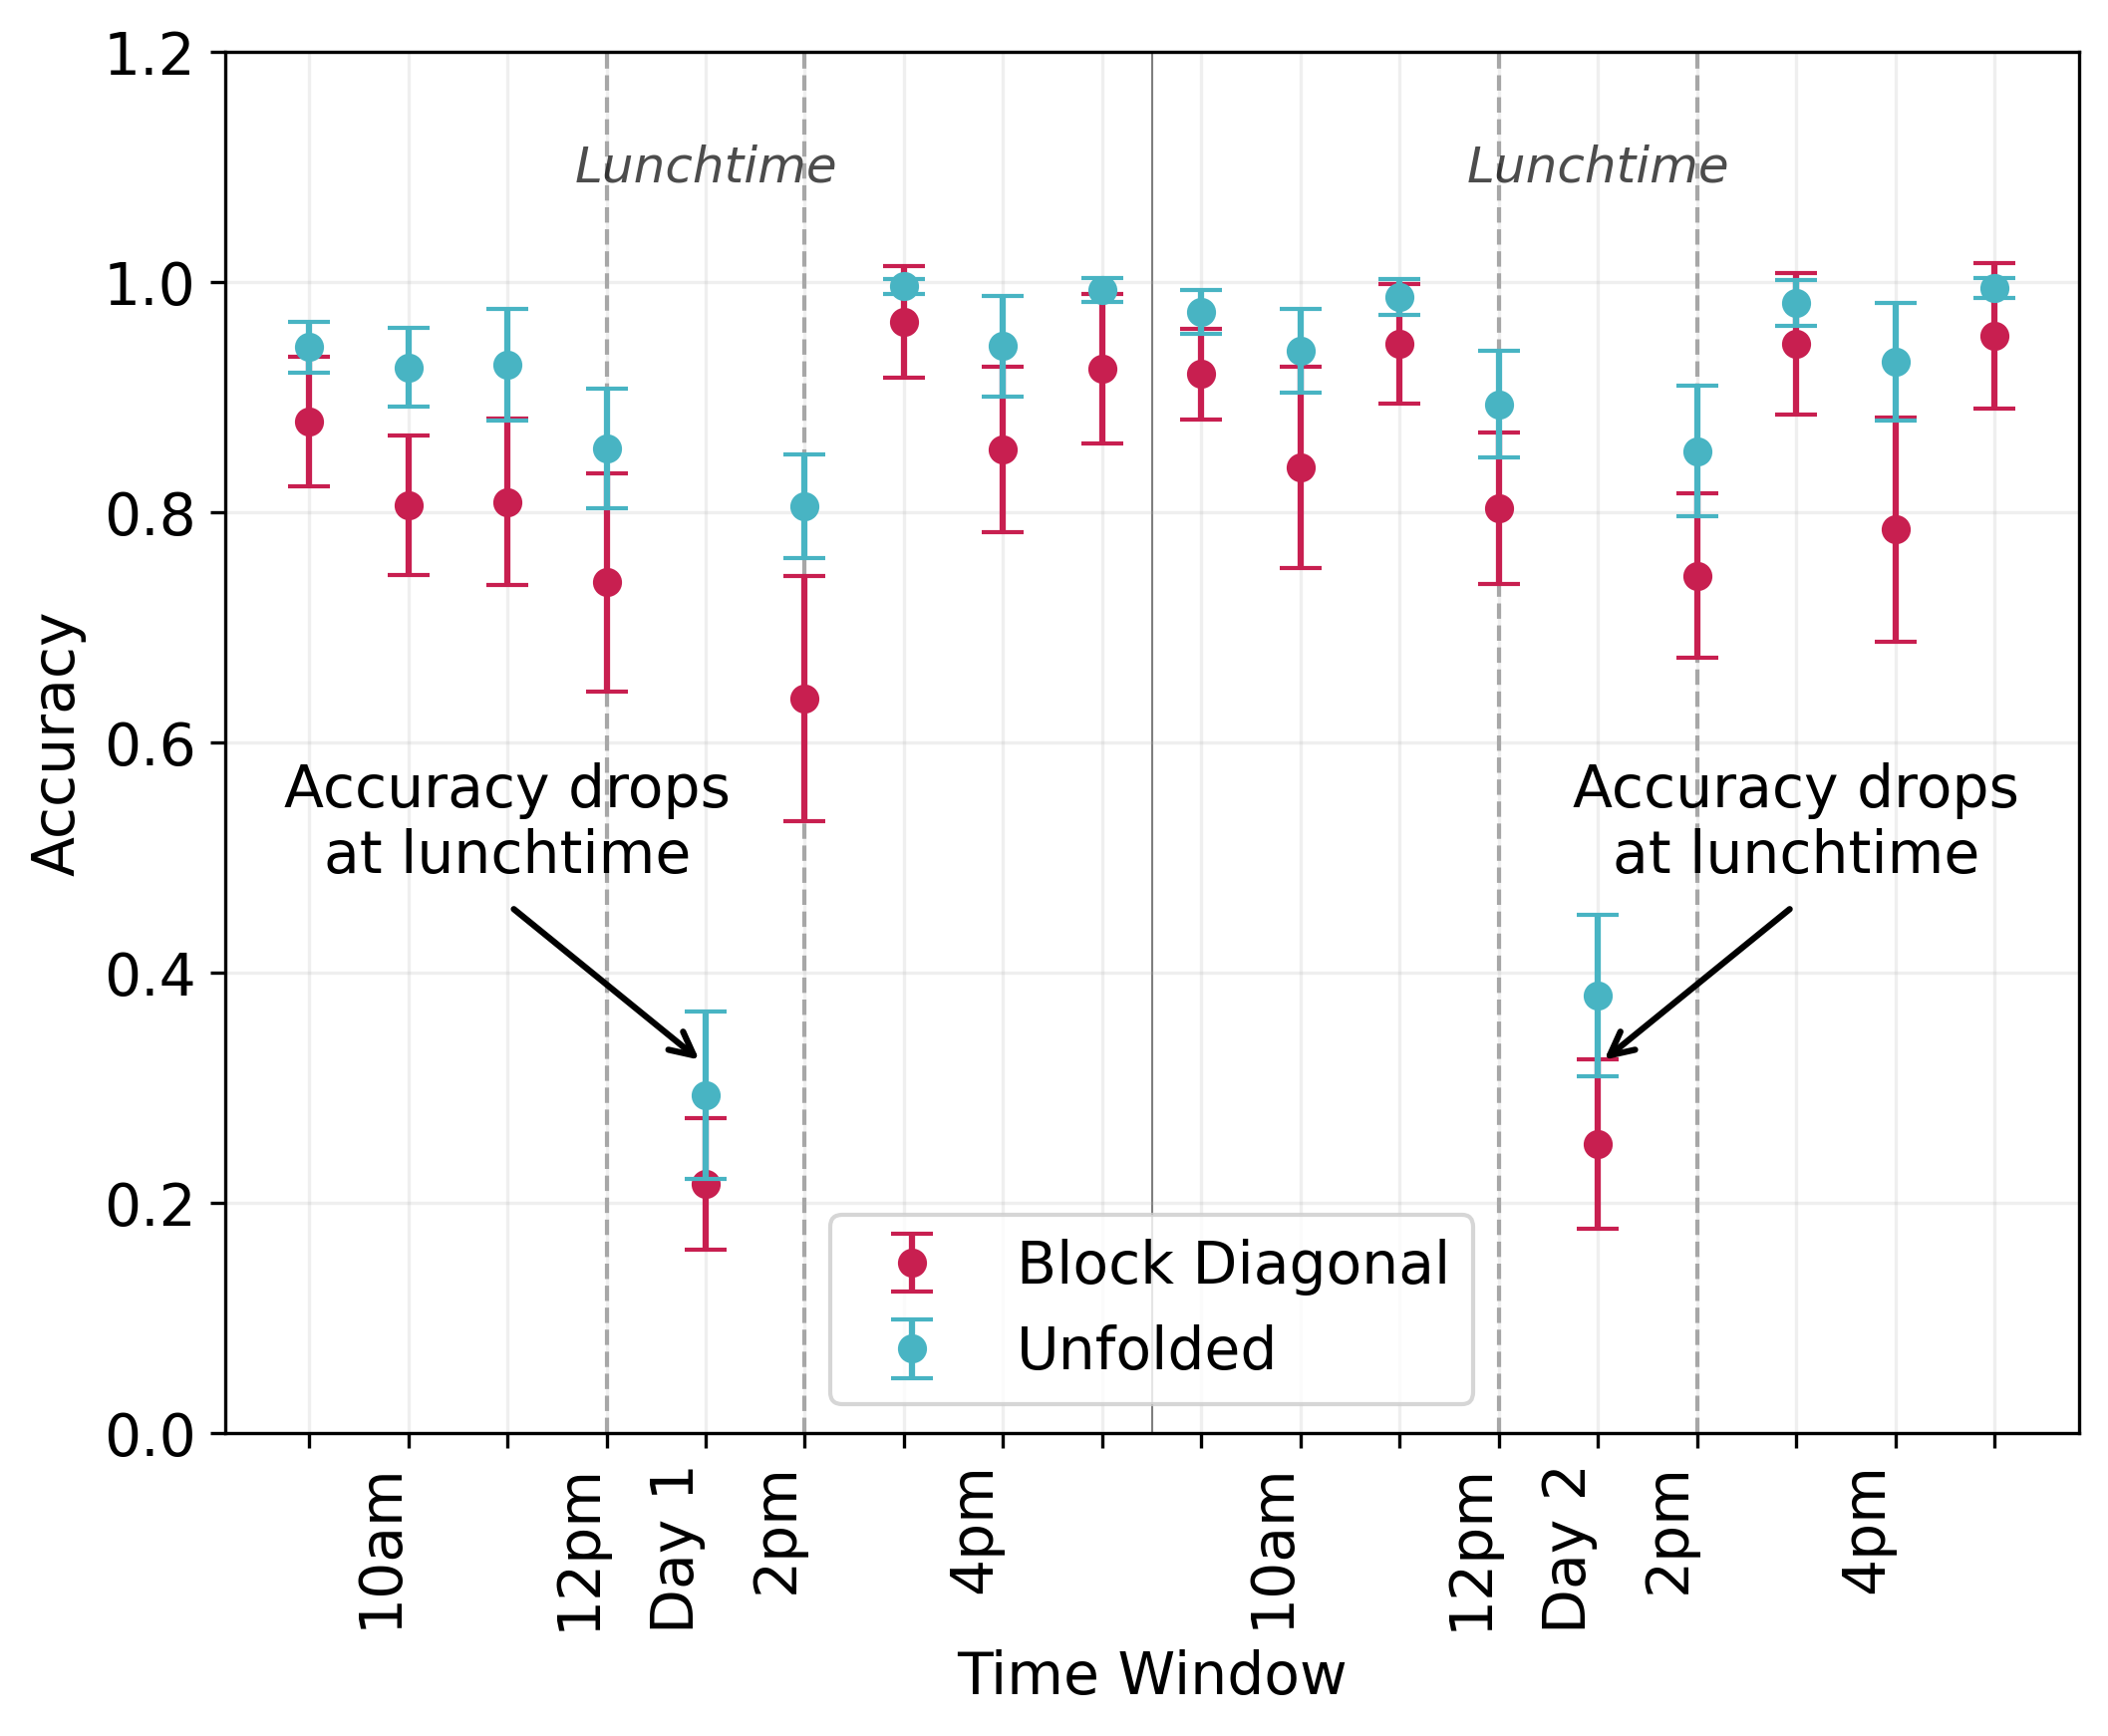

In [ ]:
output = "Accuracy"
output_str = "Accuracy"
regime = "Trans"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    ax.text(4, 1.1, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 1.1, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    ax.text(2, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(4, 0.32), xytext=(2, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(15, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(13, 0.32), xytext=(15, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))



    # Crop the figures to be from y=0 to y=1
    ax.set_ylim(0, 1.2)


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

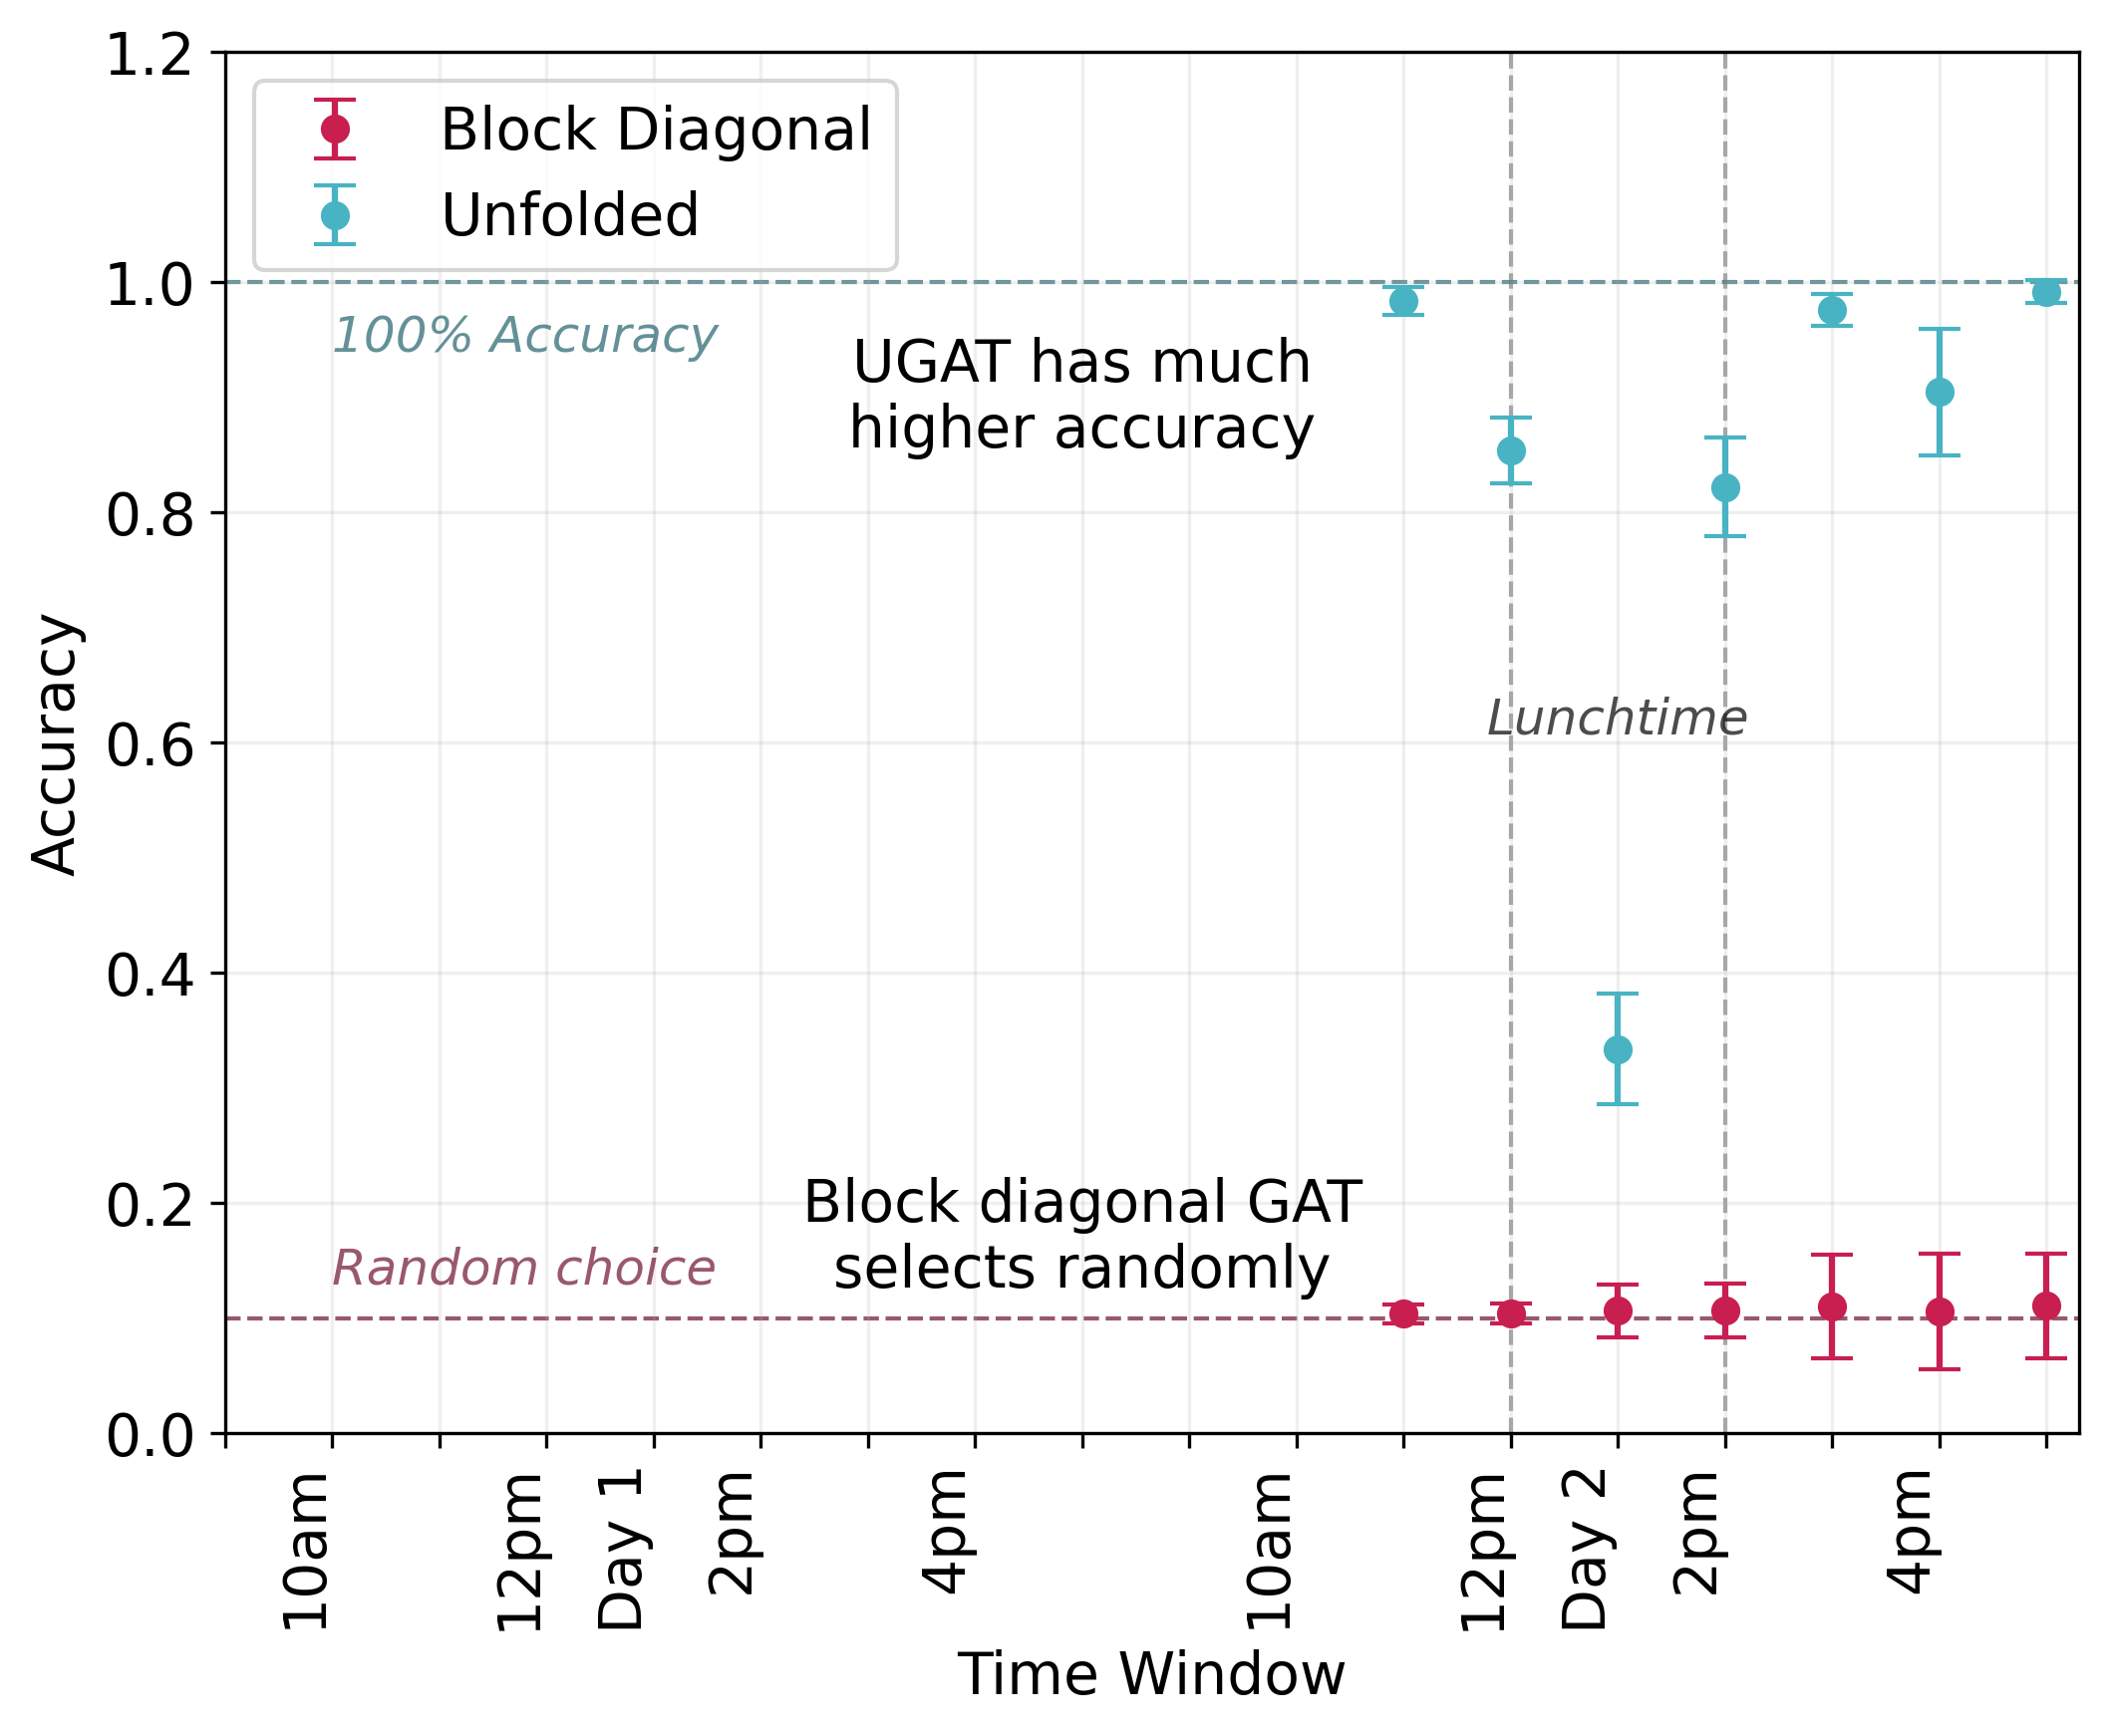

In [ ]:
output = "Accuracy"
output_str = "Accuracy"
regime = "Semi-Ind"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    # ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1)
    # ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    ax.text(13, 0.62, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')

    ax.text(1, 0.94, '100% Accuracy', alpha=0.7, fontsize=12, fontstyle='italic', c='#23636C')
    ax.axhline(1, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7, c='#23636C')

    ax.text(8, 0.9, 'UGAT has much\nhigher accuracy', fontsize=14, ha='center', va='center')

    ax.text(1, 0.13, 'Random choice', alpha=0.7, fontsize=12, fontstyle='italic', c='#6E112C')
    ax.axhline(0.1, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7, c='#6E112C')


    ax.text(8, 0.17, 'Block diagonal GAT\nselects randomly', fontsize=14, ha='center', va='center')


    # Crop the figures to be from y=0 to y=1
    ax.set_ylim(0, 1.2)


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

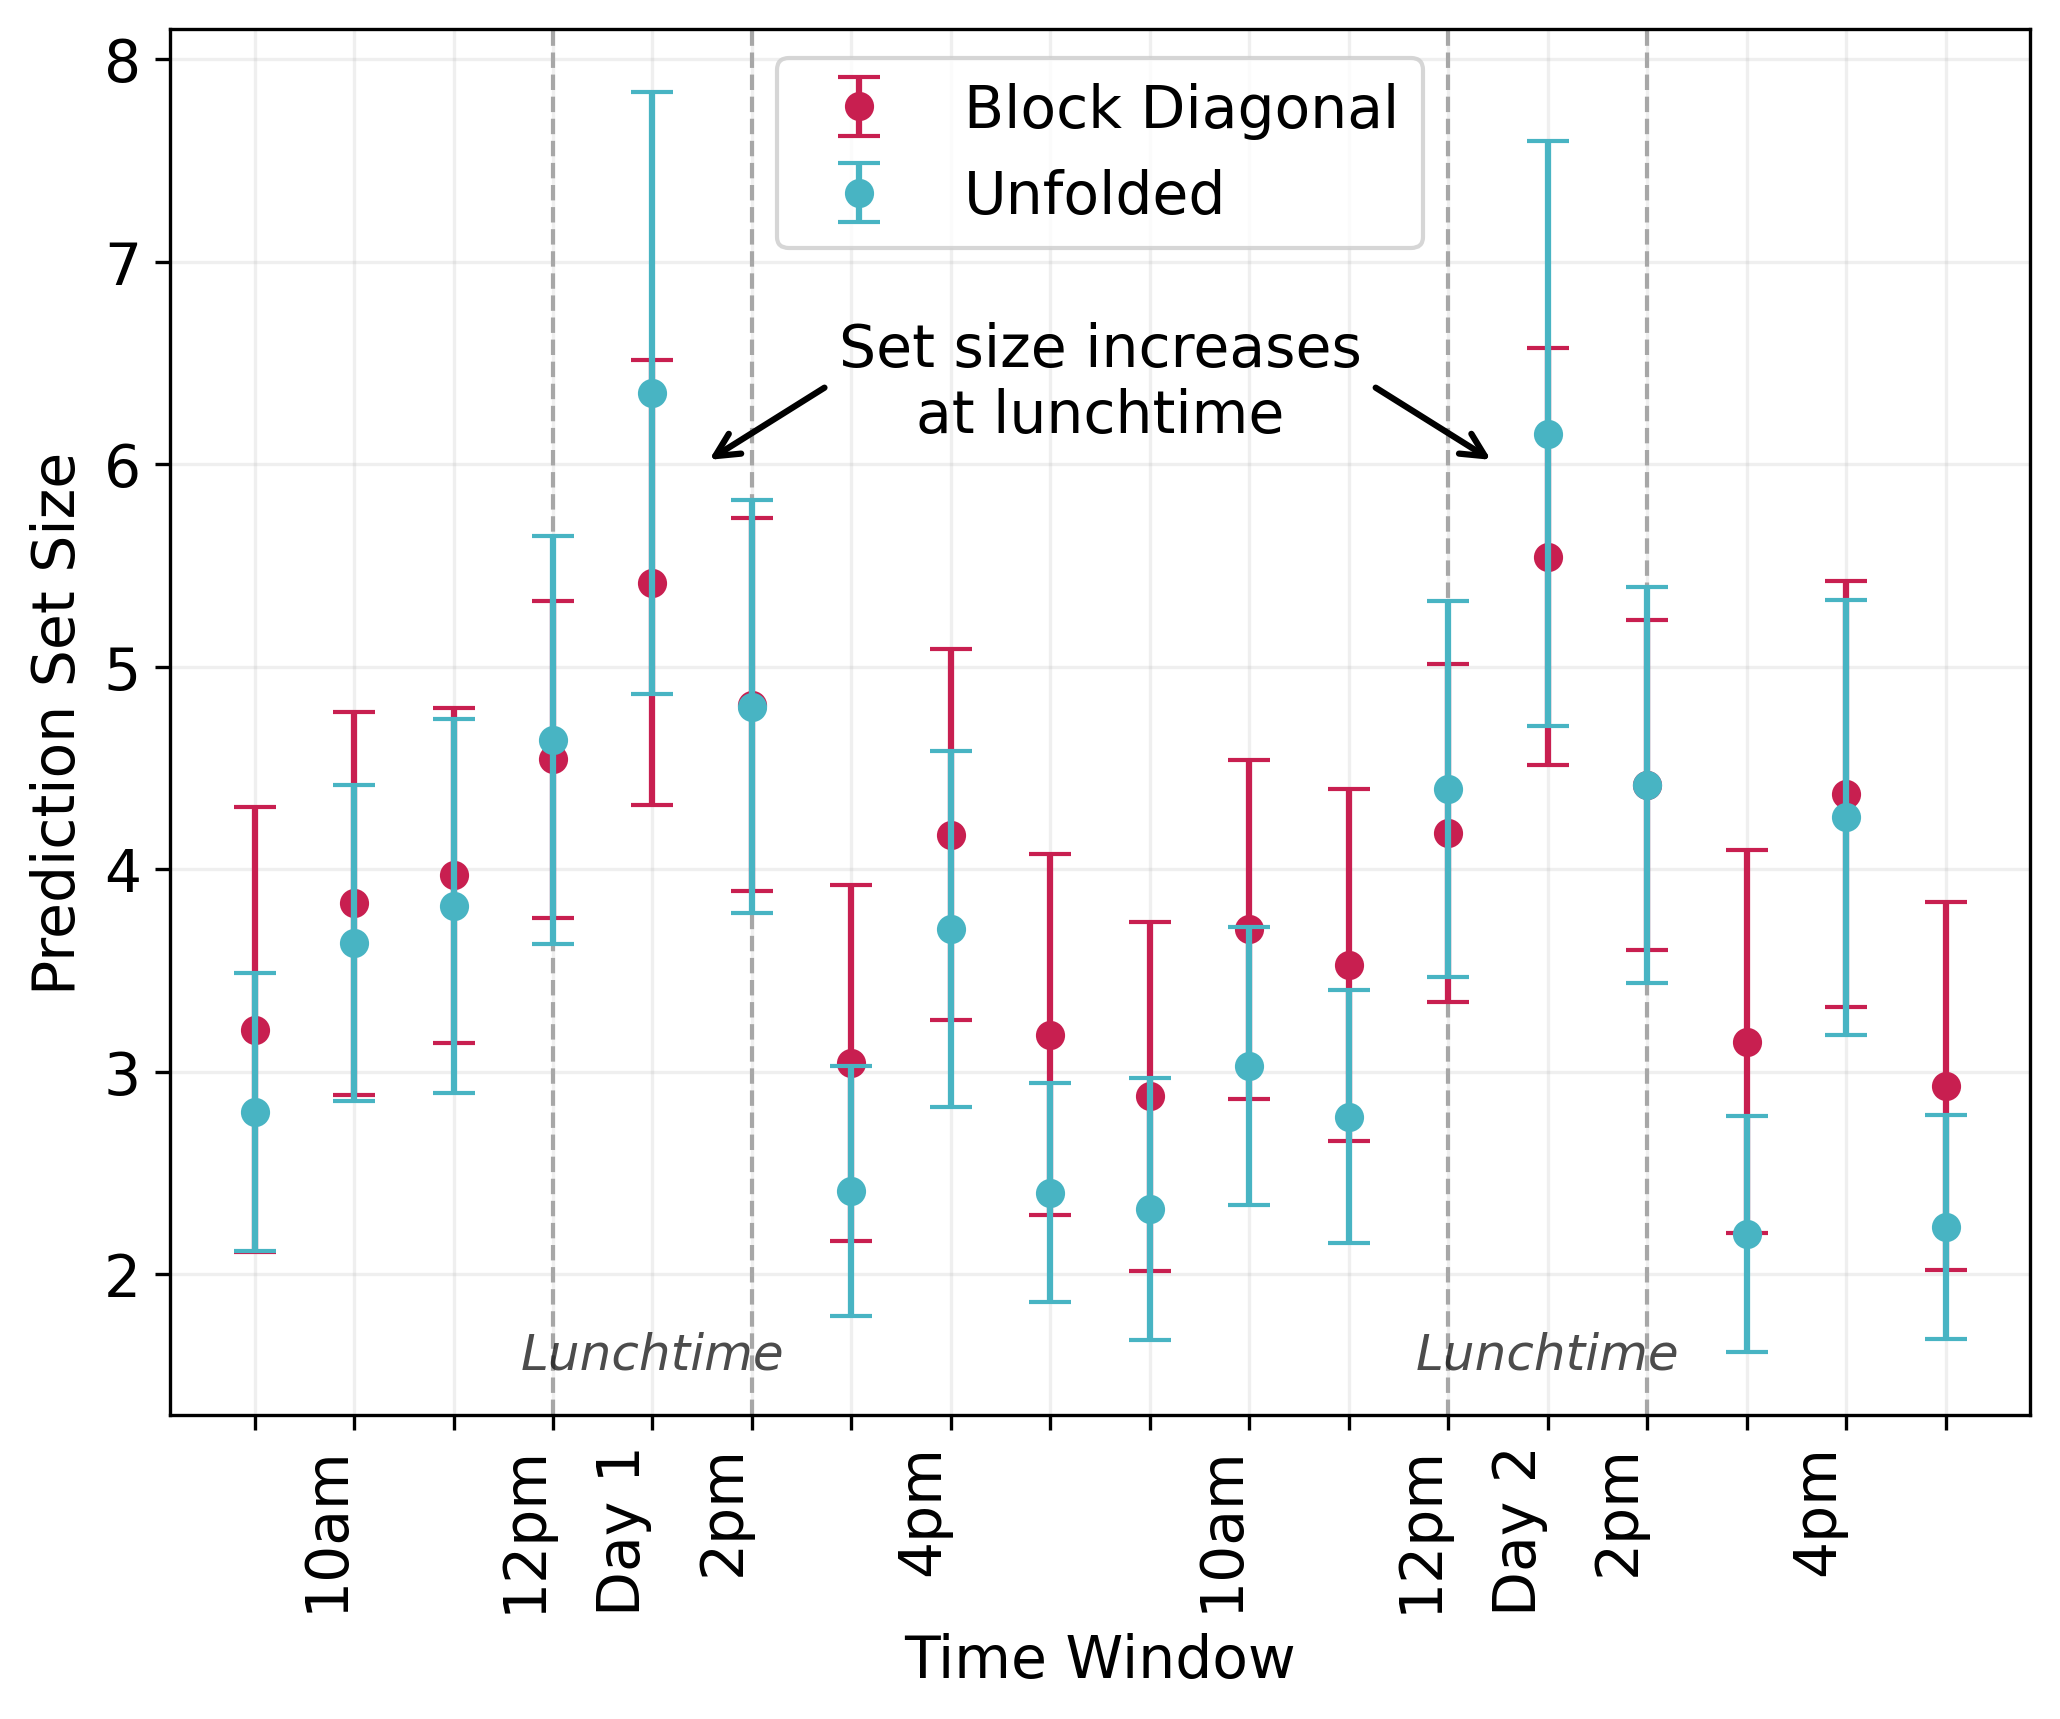

In [ ]:
output = "Avg Size"
output_str = "Prediction Set Size"
regime = "Trans"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    ax.text(4, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    # ax.text(2, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(4, 0.32), xytext=(2, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    # ax.text(15, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(13, 0.32), xytext=(15, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(8.5, 6.4, 'Set size increases\nat lunchtime', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(4.5, 6), xytext=(5.8, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    ax.annotate('', xy=(12.5, 6), xytext=(11.2, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

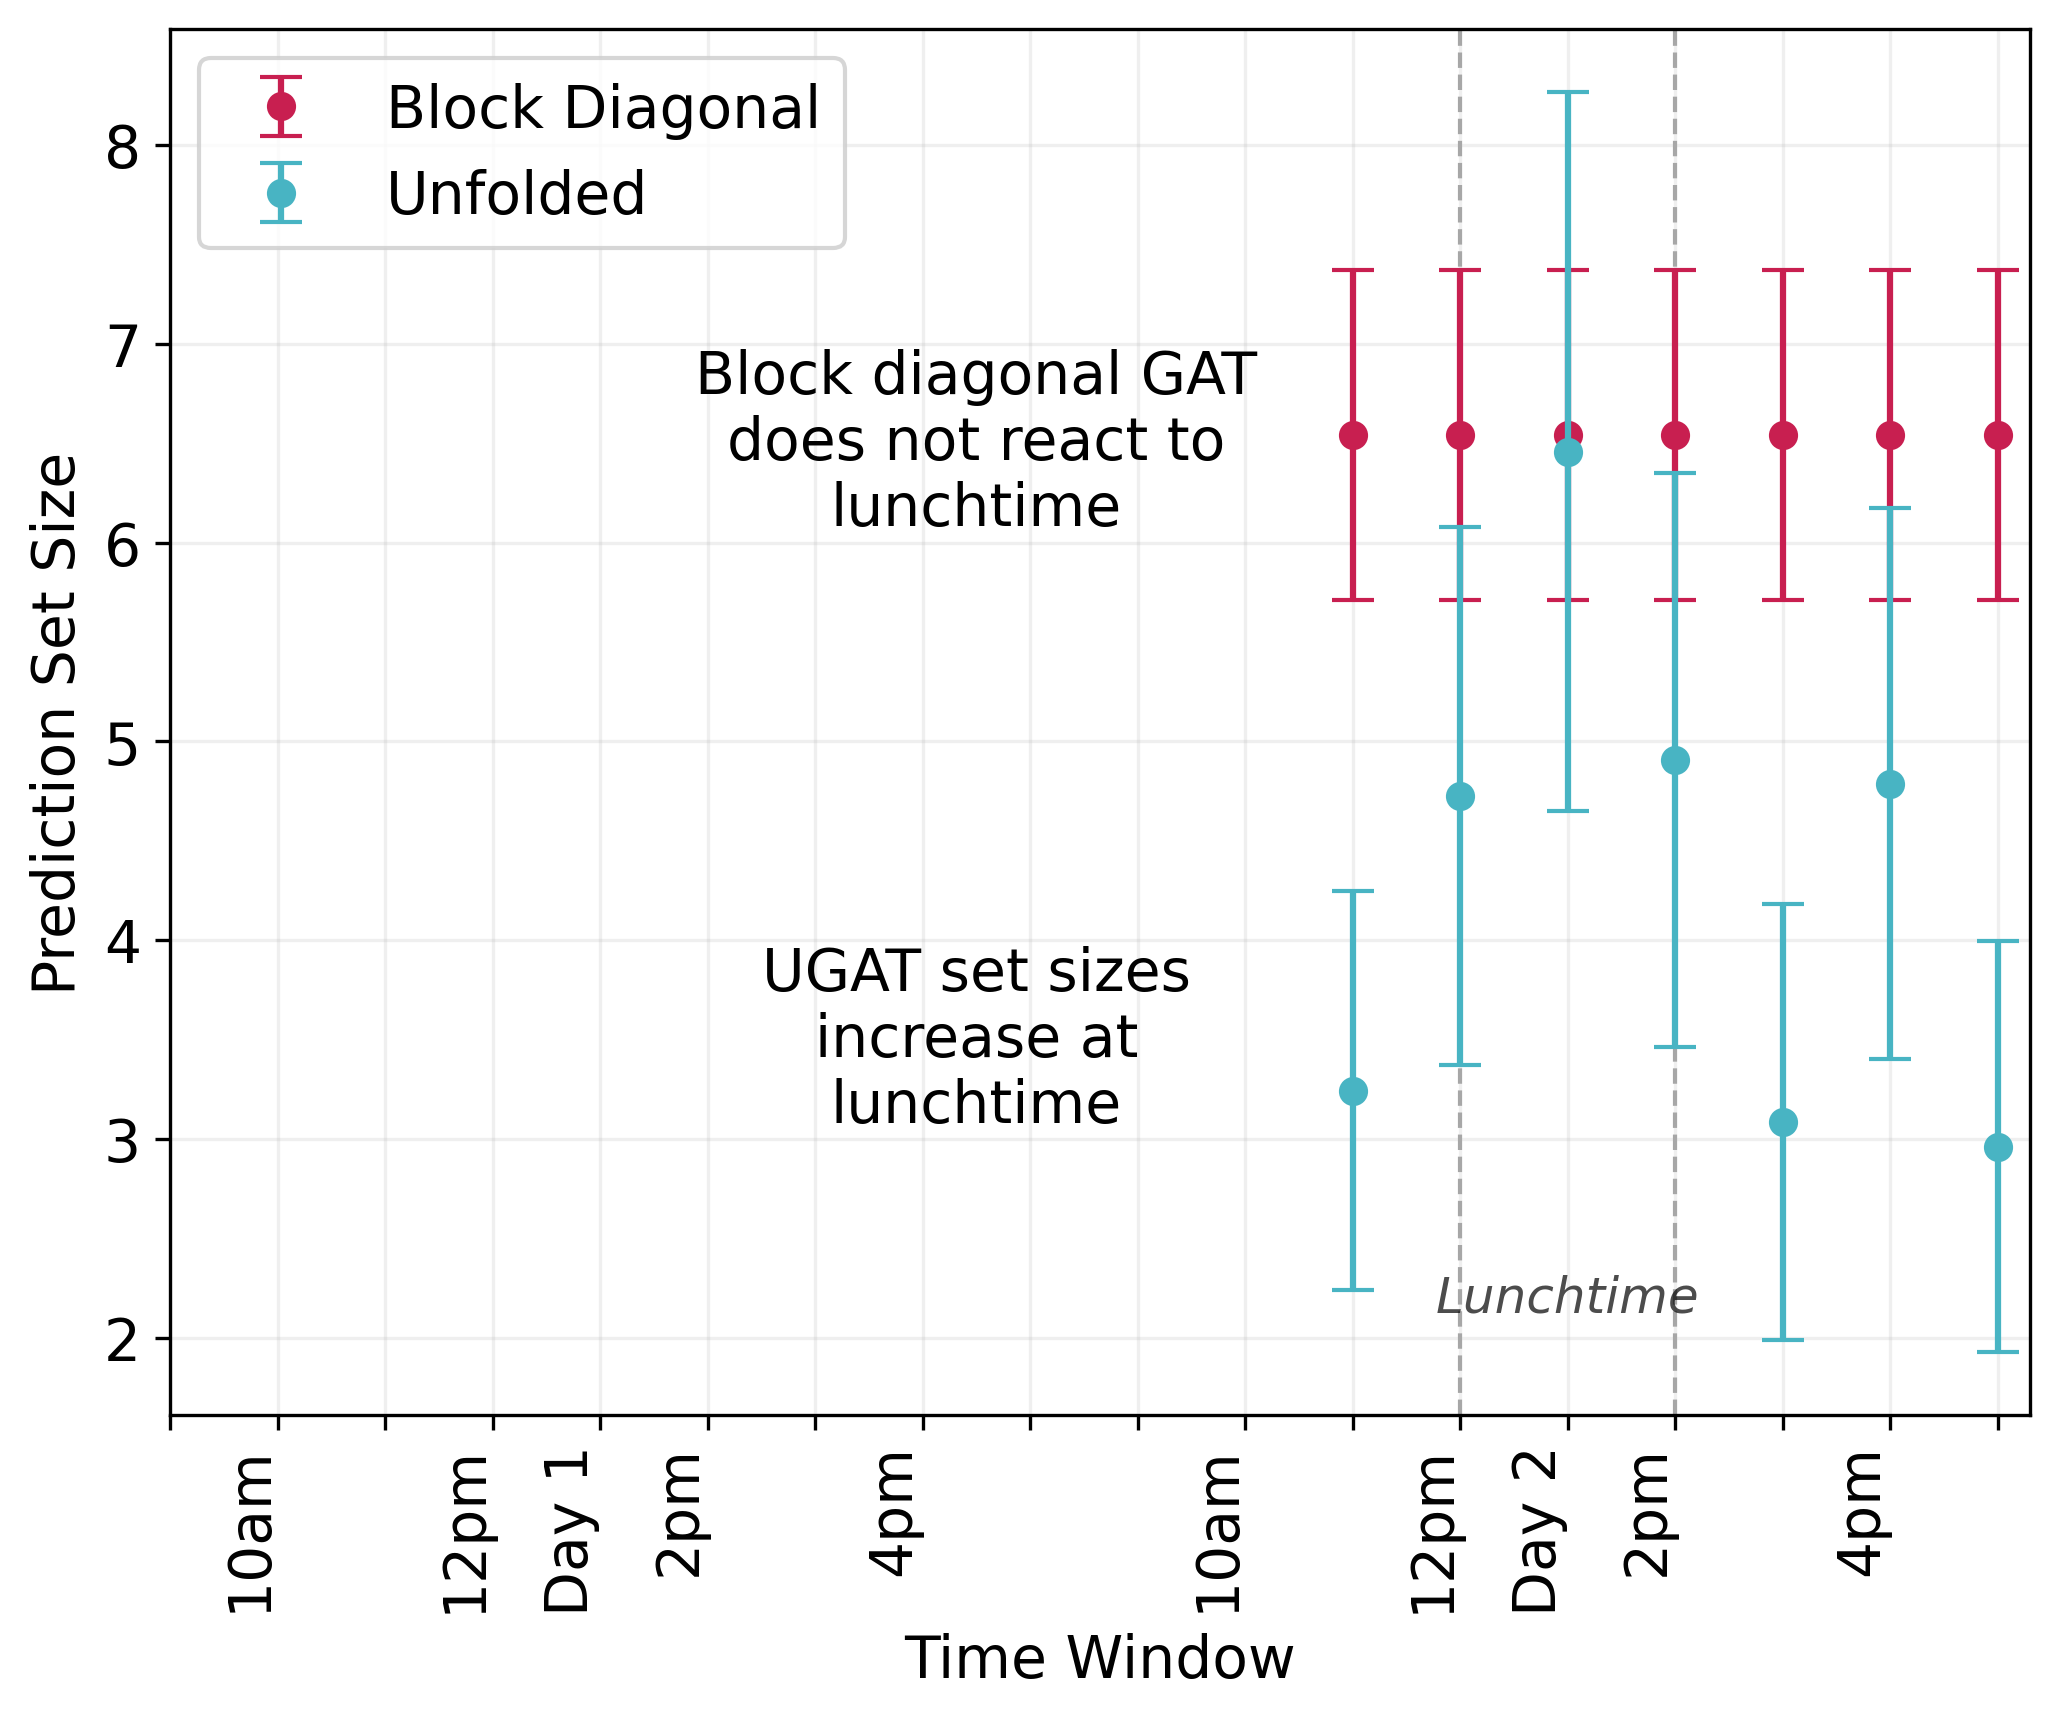

In [ ]:
output = "Avg Size"
output_str = "Prediction Set Size"
regime = "Semi-Ind"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    # ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    # ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    # ax.text(4, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 2.2, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    # ax.text(2, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(4, 0.32), xytext=(2, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    # ax.text(15, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(13, 0.32), xytext=(15, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(7.5, 3.5, 'UGAT set sizes\nincrease at\nlunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(4.5, 6), xytext=(5.8, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    # ax.annotate('', xy=(12.5, 6), xytext=(11.2, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(7.5, 6.5, 'Block diagonal GAT\ndoes not react to\nlunchtime', fontsize=14, ha='center', va='center')

    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');